## Telecom Churn Case Study

### Problem Statement 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

The predictive model that you’re going to build will serve two purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Step 1: Reading and Understanding the Data

##### A. Importing Csv File

In [3]:
telecom = pd.read_csv('telecom_churn_data.csv')

##### B.Inspecting the Dataframe

In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [6]:
telecom.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6     ...      \
99994            8/31/2014            9/30/2014   18.471     ...       
99995            8/31/2014            9/30/2014  112.201     ...       
99996            8/31/2014            9/30/2014  229.187     ...       
99997            8/31/2014            9/30/2014  322.991     ...       
99998            8/31/2014            9/30/2014  687.065     ...       

       sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  \
99994            0        NaN        NaN        NaN        NaN  3199   
99995            0        NaN        NaN        NaN        NaN  2052   
99996            0        1.0        NaN        NaN        NaN   185   
99997            0        1.0        1.0        1.0        1.0   478   
99998            0        1.0        NaN        NaN        NaN   751   

       aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
99994        0.00        0.00        0.00         0.0  
99995        0.00        0.00        0.00         0.0  
99996        0.00        0.00        0.00         0.0  
99997     1445.74     1151.03     1173.18         0.0  
99998        0.00        0.00        0.00         0.0  

[5 rows x 226 columns]

In [7]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6      ...        sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000      ...       99999.000000  25153.000000  25571.000000   
mean     132.395875      ...           0.084581      0.914404      0.908764   
std      297.207406      ...           0.650457      0.279772      0.287950   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%        7.380000      ...           0.000000      1.000000      1.000000   
50%       34.310000      ...           0.000000      1.000000      1.000000   
75%      118.740000      ...           0.000000      1.000000      1.000000   
max     7376.710000      ...          49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [8]:
telecom.shape

(99999, 226)

## Step 2: Data Cleaning

##### A. Inspect  columns with recharge values and impute the values accordingly

In [9]:
#Get all columns having recharge values in telecom datset 
recharge_amnt_columns =  telecom.columns[telecom.columns.str.contains('total_rech_amt|max_rech_amt|av_rech_amt|total_rech_data|max_rech_data|av_rech_data')]
recharge_amnt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [10]:
#Let us inspect the recharge values
telecom[recharge_amnt_columns].describe(include='all')

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean         327.514615        322.962970        324.157122        303.345673   
std          398.019701        408.114237        416.540455        404.588583   
min            0.000000          0.000000          0.000000          0.000000   
25%          109.000000        100.000000         90.000000         52.000000   
50%          230.000000        220.000000        225.000000        200.000000   
75%          437.500000        428.000000        434.500000        415.000000   
max        35190.000000      40335.000000      45320.000000      37235.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
count    99999.000000    99999.000000    99999.000000    99999.000000   
mean       104.637486      104.752398      107.728207      101.943889   
std        120.614894      124.523970      126.902505      125.375109   
min          0.000000        0.000000        0.000000        0.000000   
25%         30.000000       30.000000       30.000000       28.000000   
50%        110.000000      110.000000       98.000000       61.000000   
75%        120.000000      128.000000      144.000000      144.000000   
max       4010.000000     4010.000000     4449.000000     3399.000000   

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000        25.000000        25.000000        25.000000   
50%             2.000000       145.000000       145.000000       145.000000   
75%             3.000000       177.000000       177.000000       179.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

In [11]:
#As it is observed that the minimum values of recharge related columns has NAN values  it is safe to assume that the 
#customer did not recharge and we can impute the zero for all nan values

# Let's impute missing values with 0
telecom[recharge_amnt_columns] = telecom[recharge_amnt_columns].apply(lambda x: x.fillna(0))

##### B. Inspect categorical columns and impute the values accordingly

In [12]:
#Get all categorical columns in telecom datset
categorical_columns =  telecom.columns[telecom.columns.str.contains('fb_user|night_pck_user')]
categorical_columns

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [13]:
#Let us replace us the NAN values in categorical values as -1 as it has numbers so this will be an another category
telecom[categorical_columns] = telecom[categorical_columns].apply(lambda x: x.fillna(-1))

##### C. Inspect Date columns

In [14]:
#Get all date columns in telecom datset
date_cols = list(filter(lambda x: str(x).find('date') > -1, list(telecom.columns)))
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [15]:
#Drop columns having date in telecom dataset
telecom = telecom.drop(columns=date_cols)

##### D. Removing the duplicate values

In [16]:
telecom = telecom.drop_duplicates(keep='first')

##### E. Removing columns having unique values

In [17]:
telecom = telecom.drop(columns='mobile_number',axis=1)

##### F. Check Column wise Missing values

In [18]:
#Checking the percentage of null columns 
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False).head(20)

count_rech_2g_6     74.85
arpu_3g_6           74.85
arpu_2g_6           74.85
count_rech_3g_6     74.85
arpu_2g_7           74.43
count_rech_3g_7     74.43
arpu_3g_7           74.43
count_rech_2g_7     74.43
count_rech_3g_9     74.08
arpu_3g_9           74.08
arpu_2g_9           74.08
count_rech_2g_9     74.08
count_rech_3g_8     73.66
count_rech_2g_8     73.66
arpu_3g_8           73.66
arpu_2g_8           73.66
loc_ic_t2t_mou_9     7.75
loc_og_mou_9         7.75
std_og_t2m_mou_9     7.75
spl_og_mou_9         7.75
dtype: float64

As we can see that the NA percentage is more as for analysis any column with more than 30% NA values are not required.

__Removing the columns where NA values are more than 30%__

#As we can see more than 30% null values in columns has no use so retaining the columns which has less than 30% null values i.e using the 
#dropna function with thresh value of 0.7 i.e 70% is retaining the non NA values. 

In [19]:
#Dropping the above list of columns
telecom=telecom.dropna(thresh=0.7*len(telecom), axis=1)

In [20]:
#Checking the percentage of null columns after dropping columns
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False).head(20)

std_ic_t2m_mou_9    7.75
offnet_mou_9        7.75
loc_og_t2m_mou_9    7.75
ic_others_9         7.75
spl_ic_mou_9        7.75
loc_og_t2f_mou_9    7.75
loc_og_t2t_mou_9    7.75
std_og_mou_9        7.75
isd_og_mou_9        7.75
std_ic_mou_9        7.75
roam_og_mou_9       7.75
std_og_t2t_mou_9    7.75
std_ic_t2o_mou_9    7.75
roam_ic_mou_9       7.75
std_ic_t2f_mou_9    7.75
std_og_t2c_mou_9    7.75
isd_ic_mou_9        7.75
std_og_t2f_mou_9    7.75
loc_og_mou_9        7.75
std_ic_t2t_mou_9    7.75
dtype: float64

##### G.  Check Row wise Missing value

In [21]:
#Checking the row wise null count
telecom.isnull().sum(axis=1).sort_values(ascending=False).head(20)

48740    119
36562    119
37108    119
37097    119
36927    119
36807    119
75849    119
75856    119
36592    119
75929    119
74980    119
36417    119
36350    119
76057    119
36123    119
35961    119
35907    119
76277    119
75738    119
37254    119
dtype: int64

Eventhough row wise we have good amount of null values but we will not delete as we might lose some important data related to the customer churning out.

In [22]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False).head(20)

std_ic_t2m_mou_9    7.75
offnet_mou_9        7.75
loc_og_t2m_mou_9    7.75
ic_others_9         7.75
spl_ic_mou_9        7.75
loc_og_t2f_mou_9    7.75
loc_og_t2t_mou_9    7.75
std_og_mou_9        7.75
isd_og_mou_9        7.75
std_ic_mou_9        7.75
roam_og_mou_9       7.75
std_og_t2t_mou_9    7.75
std_ic_t2o_mou_9    7.75
roam_ic_mou_9       7.75
std_ic_t2f_mou_9    7.75
std_og_t2c_mou_9    7.75
isd_ic_mou_9        7.75
std_og_t2f_mou_9    7.75
loc_og_mou_9        7.75
std_ic_t2t_mou_9    7.75
dtype: float64

As we have good number of columns which has null values more than 7% and lessa than 10% as dropping them we might loose the important information. 
Let us use the IterativeImputer from sklearn to impute the null values in these columns

##### H.  Imputing Missing Values

In [23]:
telecom.fillna(telecom.mean(), inplace=True)

##### I.  Outlier Treatment

In [24]:
def outlier_treatment(array, val=3):
    mean = array.mean()
    sd = array.std()
    high =  mean + val*sd
    low = mean - val*sd
    array[array<low] = low
    array[array>high] = high
    return array

In [25]:
#Categorical Columns 
all_except_num_cols =  list(telecom[categorical_columns])  + list(telecom[recharge_amnt_columns])
all_except_num_cols
#Numerical columns 
numerical_cols = [column for column in telecom.columns if column not in all_except_num_cols ]
numerical_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou

In [26]:
telecom[numerical_cols] = telecom[numerical_cols].apply(outlier_treatment, axis=0)

C:\Personel\Python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Personel\Python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Personel\Python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Personel\Python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


C:\Personel\Python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Personel\Python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Personel\Python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Personel\Python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

##### J Check the multicolinearity

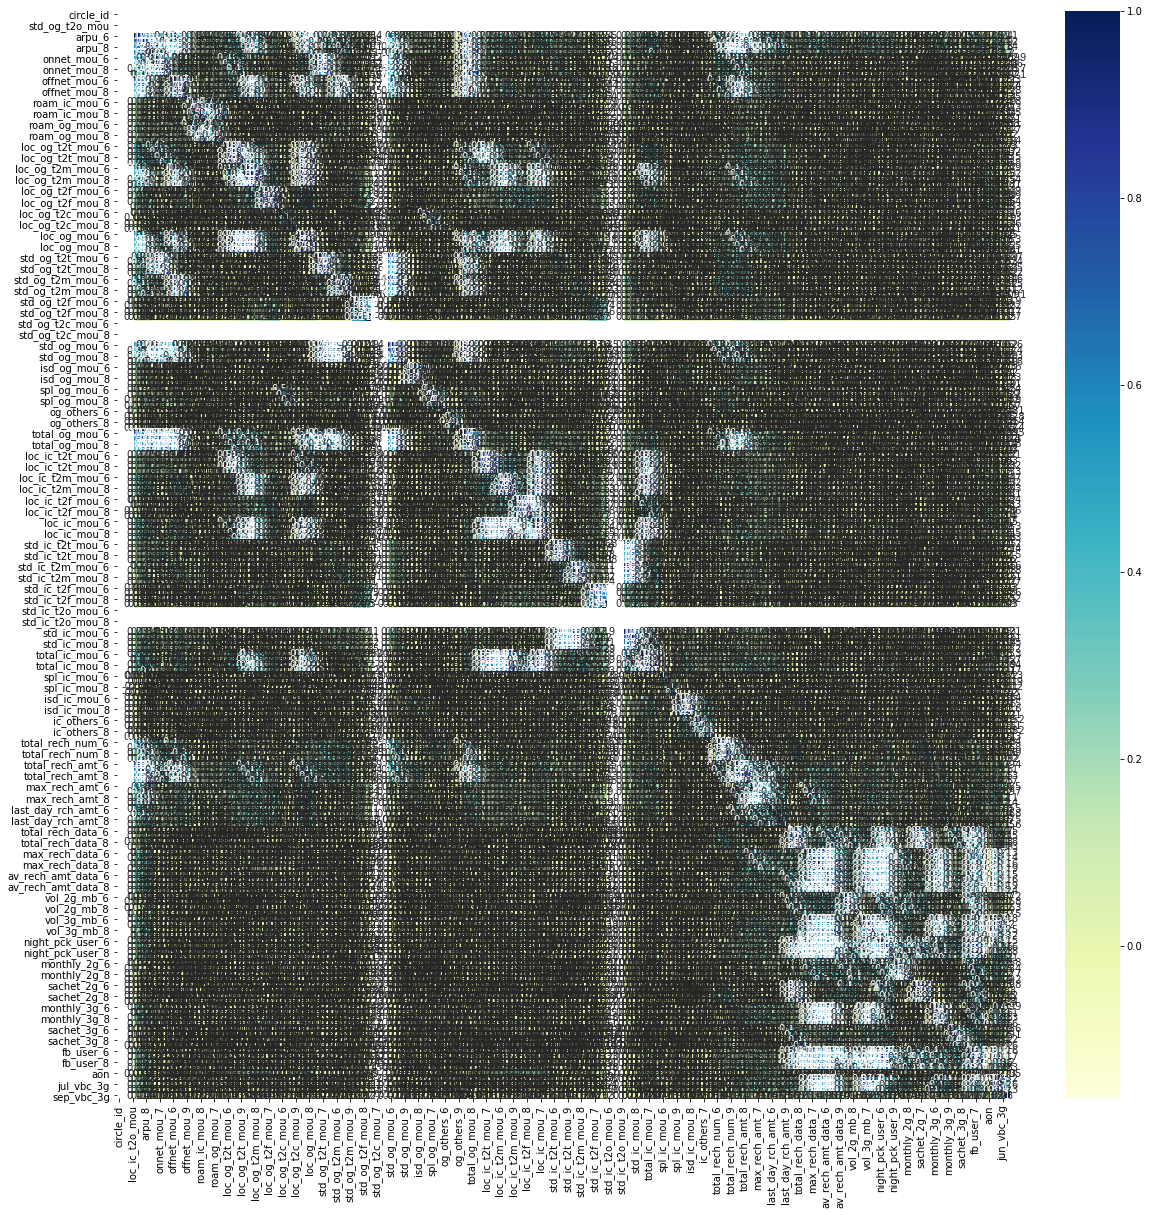

In [27]:
plt.figure(figsize=(20, 20))
sns.heatmap(telecom._get_numeric_data().corr(), cmap="YlGnBu", annot=True)

##### K  Check Number of null values of completion of Data Cleaning

In [28]:
#After Completion of Data Cleaning lets Check number of null values rowwise/columnwise
print('Shape of Telecom Dataset after Data Cleaning :- ',telecom.shape)
print(round(100*(telecom.isnull().sum(axis=0)/len(telecom.index)), 2).sort_values(ascending=False).head(20))
print(round(100*(telecom.isnull().sum(axis=1)/len(telecom.index)), 2).sort_values(ascending=False).head(20))

Shape of Telecom Dataset after Data Cleaning :-  (99999, 197)
sep_vbc_3g          0.0
og_others_6         0.0
spl_og_mou_8        0.0
spl_og_mou_7        0.0
spl_og_mou_6        0.0
isd_og_mou_9        0.0
isd_og_mou_8        0.0
isd_og_mou_7        0.0
isd_og_mou_6        0.0
std_og_mou_9        0.0
std_og_mou_8        0.0
std_og_mou_7        0.0
std_og_mou_6        0.0
std_og_t2c_mou_9    0.0
std_og_t2c_mou_8    0.0
std_og_t2c_mou_7    0.0
std_og_t2c_mou_6    0.0
std_og_t2f_mou_9    0.0
std_og_t2f_mou_8    0.0
std_og_t2f_mou_7    0.0
dtype: float64
99998    0.0
33348    0.0
33326    0.0
33327    0.0
33328    0.0
33329    0.0
33330    0.0
33331    0.0
33332    0.0
33333    0.0
33334    0.0
33335    0.0
33336    0.0
33337    0.0
33338    0.0
33339    0.0
33340    0.0
33341    0.0
33342    0.0
33343    0.0
dtype: float64


## Step 3:- Data Preparation

##### A. Derive new features
Let us create the derived varibles which will be helpul for the analysis

#From the list of recharge related columns let's describe some of the columns of that are required for analysis.

- total_rech_amt_* : Total Call recharge amount in a month
- total_rech_data_* : Number of recharges Data in a month
- av_rech_amt_data_* : Average Data recharge amount in a month

We can derive couple of columns in the following way and drop the columns used for calculation

`total_rech_amt_call_n_data_6 = total_rech_amt_6 + (total_rech_data_6 * av_rech_amt_data_6)`

`total_rech_amt_call_n_data_7 = total_rech_amt_7 + (total_rech_data_7 * av_rech_amt_data_7)`

`total_rech_amt_call_n_data_8 = total_rech_amt_8 + (total_rech_data_8 * av_rech_amt_data_8)`

`total_rech_amt_call_n_data_9 = total_rech_amt_9 + (total_rech_data_9 * av_rech_amt_data_9)`

In [29]:
months = [6, 7, 8, 9]

for month in months:
    telecom['total_rech_amt_call_n_data_' + str(month)] = telecom['total_rech_amt_' + str(month)] + \
        (telecom['total_rech_data_' + str(month)] * telecom['av_rech_amt_data_' + str(month)])
    
    telecom = telecom.drop(columns=['total_rech_amt_'  + str(month),
                                        'total_rech_data_'  + str(month), 'av_rech_amt_data_'  + str(month)])

##### B. Filter high-value customers

For finding the high value customers, we need to know the average recharge amount done by the customers in the months 6 and 7

In [30]:
telecom['avg_rech_amt_6_n_7'] = (telecom.total_rech_amt_call_n_data_6 + telecom.total_rech_amt_call_n_data_7)/2
telecom.avg_rech_amt_6_n_7.head()

0    559.0
1    306.0
2    241.5
3    270.0
4    301.0
Name: avg_rech_amt_6_n_7, dtype: float64

Let's say the 70th percentile of the average recharge amount done by the customer in months 6 and 7 as X

In [31]:
avgVal = telecom.avg_rech_amt_6_n_7.quantile(0.70)
avgVal

478.0

Let's filter the customer and retain only those whose average recharge amount is more than 70th percentile

In [32]:
telecom = telecom[telecom.avg_rech_amt_6_n_7 >= avgVal]
telecom.shape

(30001, 190)

Let's add the following four columns and tag the customer as churn if the value of the column is zero

We see the incoming, outing and 2g and 3g used for this

`total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9`

In [33]:
telecom['nine_mon_usage_9'] = telecom.total_ic_mou_9 + telecom.total_og_mou_9 + telecom.vol_2g_mb_9 + telecom.vol_3g_mb_9

In [34]:
telecom['churn'] = telecom['nine_mon_usage_9'].apply(lambda x:  0 if x > 0 else 1)

In [35]:
print(telecom.churn.value_counts()*100/telecom.shape[0])

0    91.863605
1     8.136395
Name: churn, dtype: float64


As we can see that the 8% of customers are getting churn out

In [36]:
#Defining  frequency counts
def add_count(ax):
    for p in ax.patches:        
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

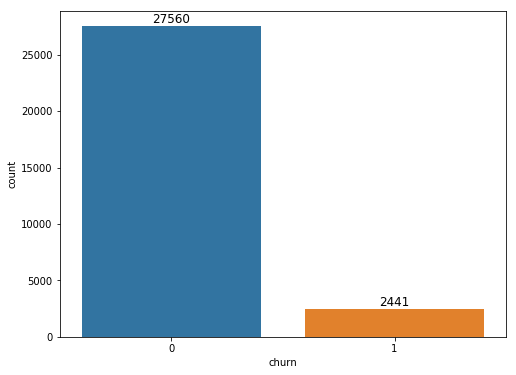

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(telecom.churn)
add_count(plt.gca())

There are 2441 customers churing out.

##### C. Tag churners and remove attributes of the churn phase

In [38]:
#Removing all the attributes related to churn of 9 month
churn_columns = list(filter(lambda x: x.endswith('_9'), list(telecom.columns)))
churn_columns

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'max_rech_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_rech_amt_call_n_data_9',
 'nine_mon_usage_9']

In [39]:
telecom = telecom.drop(columns=churn_columns)
telecom.shape

(30001, 146)

##### D.Create Derived Variables

Let us create the derived variables which will be helpful for the analysis

From the Data dictionary below variables will be helpful in predeciting the churn of customer.

- ARPU Average revenue per user

- ONNET   	All kind of calls within the same operator network

- OFFNET    All kind of calls outside the operator T network

- MOU - Minutes of usage - voice calls

- IC	Incoming calls

- OG	Outgoing calls

We need to see if it action phase - which means that the customer churning out has high probability
Let us consider the difference of 8th month to 6 and 7th month



In [40]:
#We need to see if it action phase - which means that the customer churning out has high probability
#Let us consider the difference of 8th month to 6 and 7th month

#Average Revenue per user
telecom['arpu_diff'] = telecom.arpu_8 - ((telecom.arpu_6 + telecom.arpu_7)/2)

#Onnet/Offnet
telecom['onnet_mou_diff'] = telecom.onnet_mou_8 - ((telecom.onnet_mou_6 + telecom.onnet_mou_7)/2)
telecom['offnet_mou_diff'] = telecom.offnet_mou_8 - ((telecom.offnet_mou_6 + telecom.offnet_mou_7)/2)
telecom['offnet_mou_diff'] = telecom.offnet_mou_8 - ((telecom.offnet_mou_6 + telecom.offnet_mou_7)/2)

#Outgoing call
telecom['roam_og_mou_diff'] = telecom.roam_og_mou_8 - ((telecom.roam_og_mou_6 + telecom.roam_og_mou_7)/2)
telecom['loc_og_mou_diff'] = telecom.loc_og_mou_8 - ((telecom.loc_og_mou_6 + telecom.loc_og_mou_7)/2)
telecom['std_og_mou_diff'] = telecom.std_og_mou_8 - ((telecom.std_og_mou_6 + telecom.std_og_mou_7)/2)
telecom['isd_og_mou_diff'] = telecom.isd_og_mou_8 - ((telecom.isd_og_mou_6 + telecom.isd_og_mou_7)/2)
telecom['spl_og_mou_diff'] = telecom.spl_og_mou_8 - ((telecom.spl_og_mou_6 + telecom.spl_og_mou_7)/2)
telecom['total_og_mou_diff'] = telecom.total_og_mou_8 - ((telecom.total_og_mou_6 + telecom.total_og_mou_7)/2)

#Incoming call
telecom['roam_ic_mou_diff'] = telecom.roam_ic_mou_8 - ((telecom.roam_ic_mou_6 + telecom.roam_ic_mou_7)/2)
telecom['loc_ic_mou_diff'] = telecom.loc_ic_mou_8 - ((telecom.loc_ic_mou_6 + telecom.loc_ic_mou_7)/2)
telecom['std_ic_mou_diff'] = telecom.std_ic_mou_8 - ((telecom.std_ic_mou_6 + telecom.std_ic_mou_7)/2)
telecom['isd_ic_mou_diff'] = telecom.isd_ic_mou_8 - ((telecom.isd_ic_mou_6 + telecom.isd_ic_mou_7)/2)
telecom['spl_ic_mou_diff'] = telecom.spl_ic_mou_8 - ((telecom.spl_ic_mou_6 + telecom.spl_ic_mou_7)/2)
telecom['total_ic_mou_diff'] = telecom.total_ic_mou_8 - ((telecom.total_ic_mou_6 + telecom.total_ic_mou_7)/2)

#Recharge Columns
telecom['total_rech_num_diff'] = telecom.total_rech_num_8 - ((telecom.total_rech_num_6 + telecom.total_rech_num_7)/2)
telecom['max_rech_amt_diff'] = telecom.max_rech_amt_8 - ((telecom.max_rech_amt_6 + telecom.max_rech_amt_7)/2)
telecom['max_rech_data_diff'] = telecom.max_rech_data_8 - ((telecom.max_rech_data_6 + telecom.max_rech_data_7)/2)

#Volume 2G/3G
telecom['vol_2g_mb_diff'] = telecom.vol_2g_mb_8 - ((telecom.vol_2g_mb_6 + telecom.vol_2g_mb_7)/2)
telecom['vol_3g_mb_diff'] = telecom.vol_3g_mb_8 - ((telecom.vol_3g_mb_6 + telecom.vol_3g_mb_7)/2)

In [41]:
telecom.arpu_diff.describe()

count    30001.000000
mean       -50.560949
std        258.797749
min      -1280.656095
25%       -170.885000
50%        -35.483000
75%         80.176000
max       1710.128078
Name: arpu_diff, dtype: float64

In [42]:
print('Shape of Telecom Dataset after Data Preapartion :- ',telecom.shape)

Shape of Telecom Dataset after Data Preapartion :-  (30001, 166)


## Step 4:- Visualizations

In [43]:
#Functions for the univariate analysis
def univariate_analysis(df, col,color):
    plt.figure(figsize=(20, 8))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=col, orient='v',color=color).set(title='Box Plot')
    
    plt.subplot(1, 2, 2)
    sns.distplot(df[col],color=color).set(title='Dist Plot')

In [44]:
# Define Fn for Boxplot for bivariate analysis
def get_boxPlot(df,param):
    not_churned_df=df[df.churn == 0]
    churned_df=df[df.churn  == 1]
    
    plt.figure(figsize=(20, 10)) 
    plt.subplot(1,2,1)
    sns.boxplot(y=not_churned_df[param])
    plt.title(param +' distribution for Not Churned ',fontsize=12)
    
    plt.subplot(1,2,2)
    sns.boxplot(y=churned_df[param])
    plt.title(param +' distribution for Churned ',fontsize=12)
    plt.show()

In [45]:
# Define Fn for bivariate analysis
def bivariate_analysis(col1, col2):
    plt.figure(figsize=(20, 10)) 
    sns.boxplot(col1, col2)

In [46]:
nums = telecom._get_numeric_data()
nums.drop([ "circle_id"], axis=1, inplace=True)
nums.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'loc_ic_mou_diff', 'std_ic_mou_diff', 'isd_ic_mou_diff',
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'max_rech_amt_diff', 'max_rech_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=165)

In [47]:
nums=nums.dropna(axis=1)

##### A. Univariate Analysis 


For the continuous varaibles as we need to see the spread of data we will use box and 
Let the check the Dist plots and box plots for the derived variables

C:\Personel\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Personel\Python\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Personel\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Personel\Python\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and 

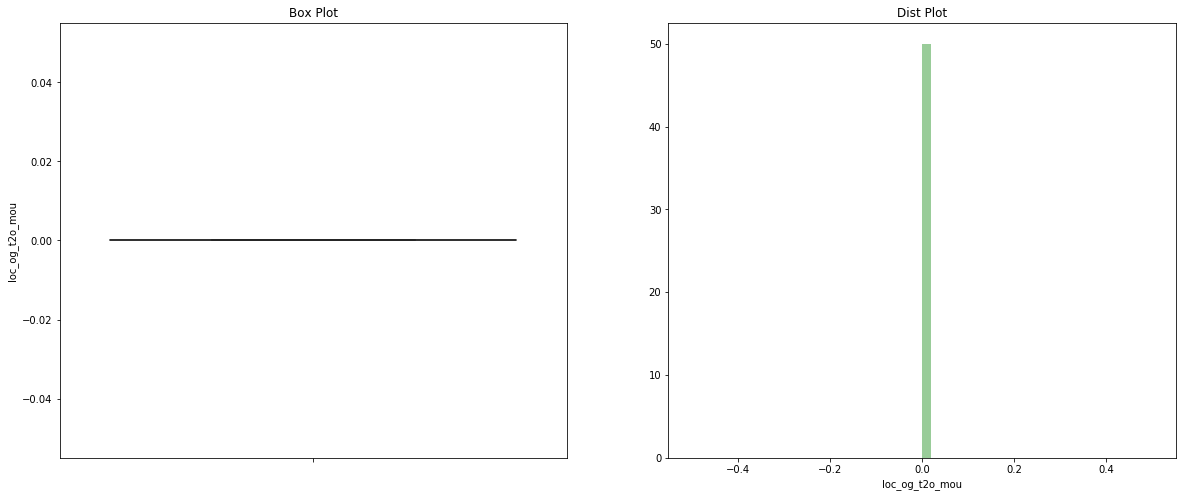

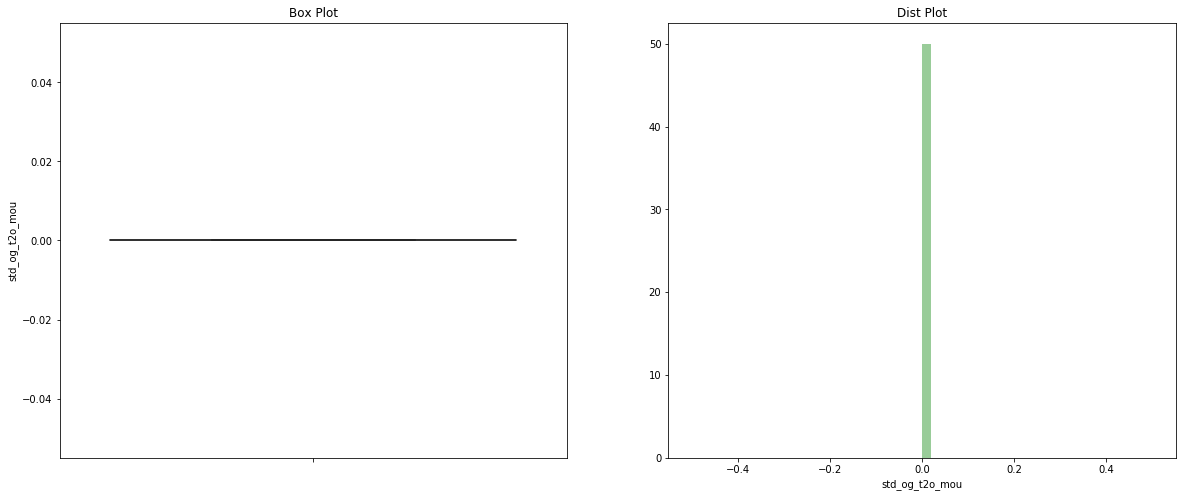

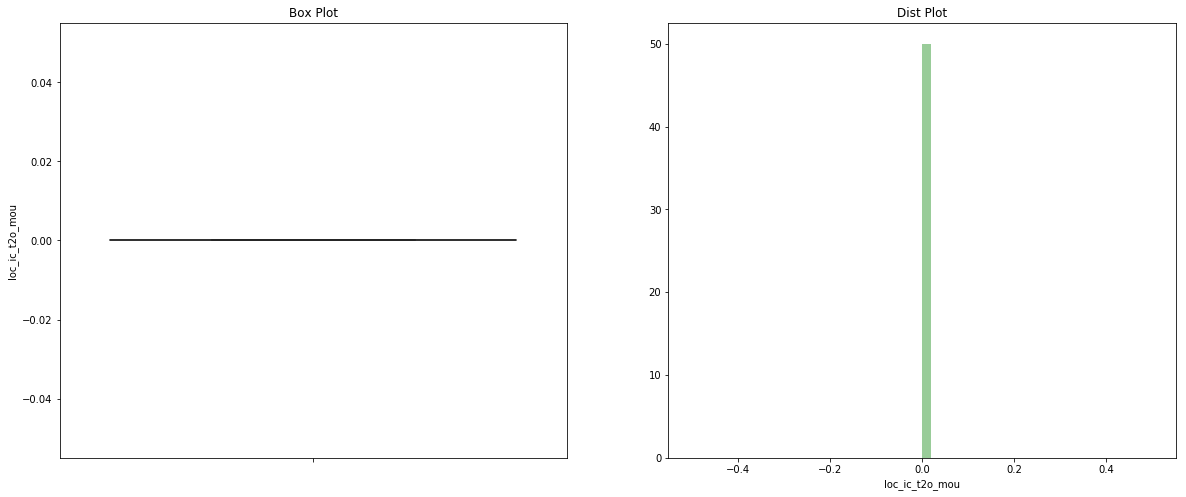

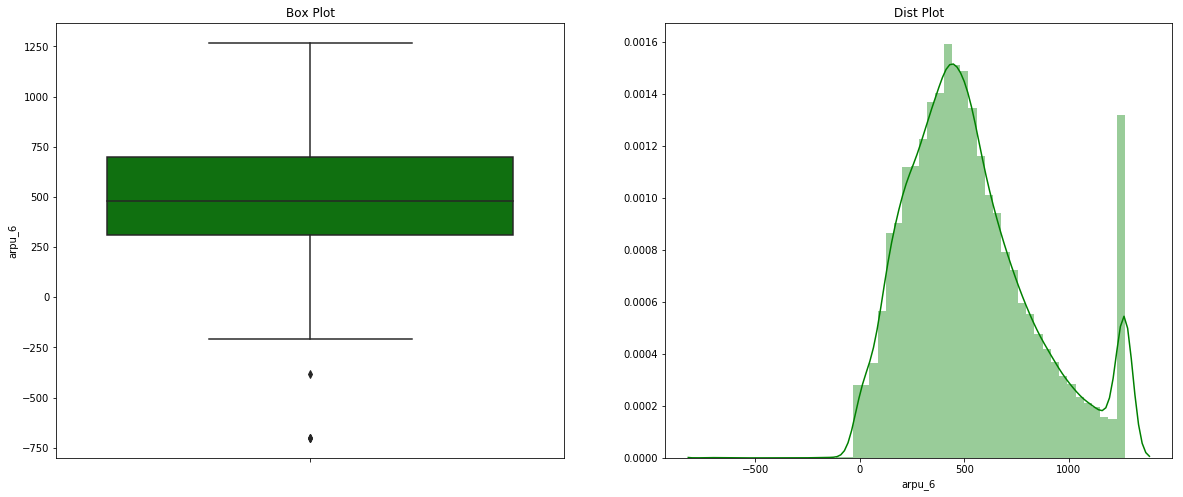

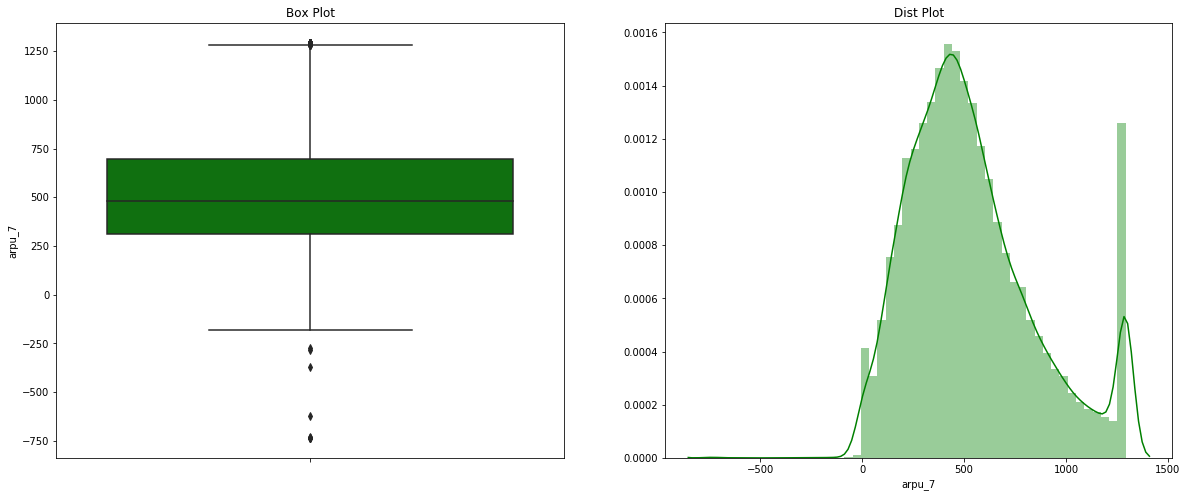

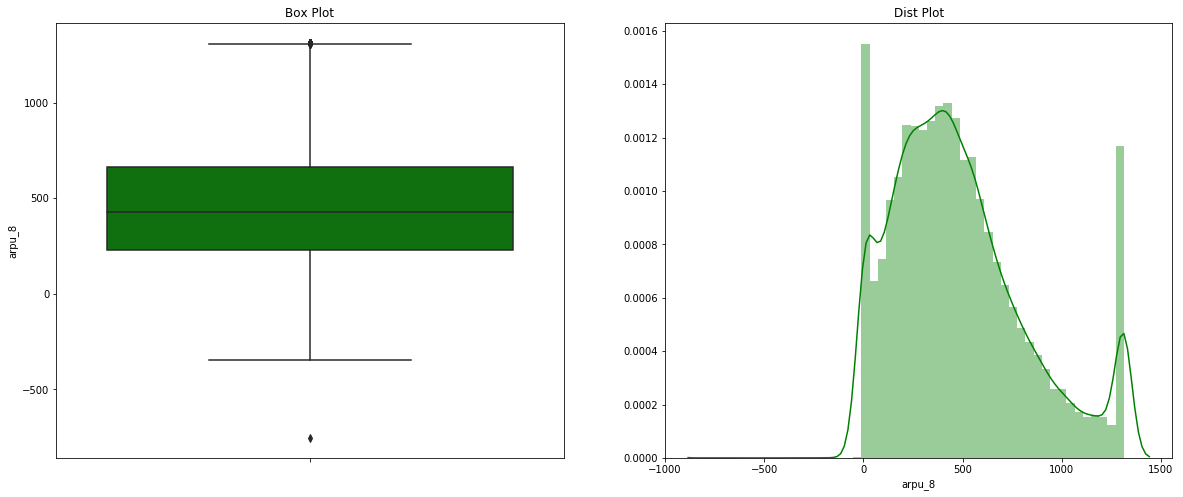

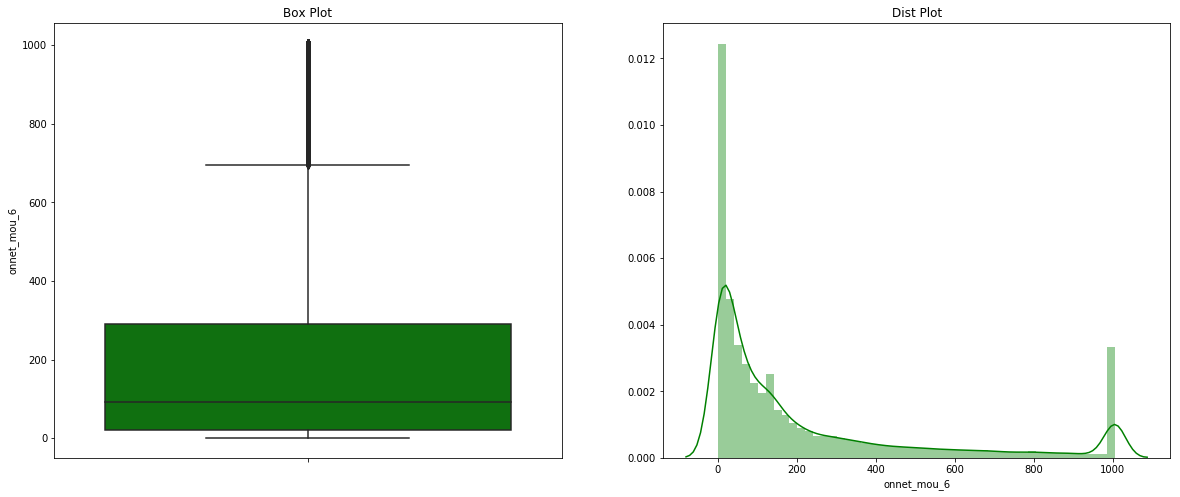

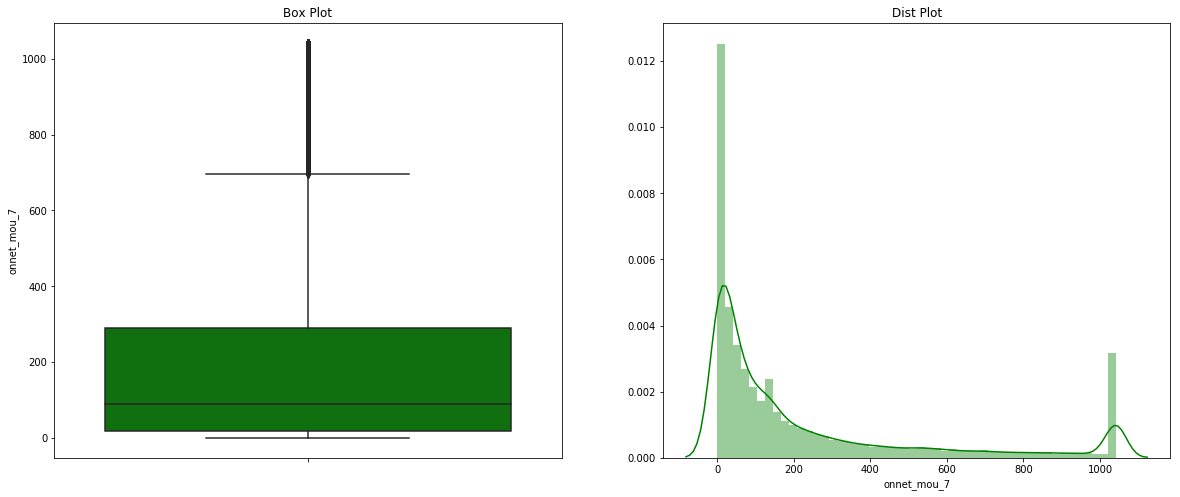

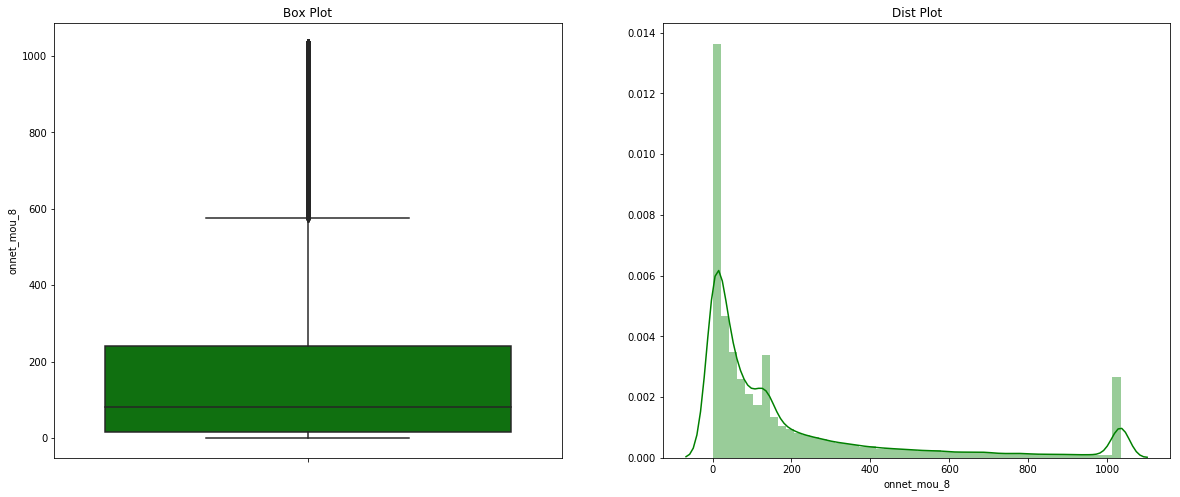

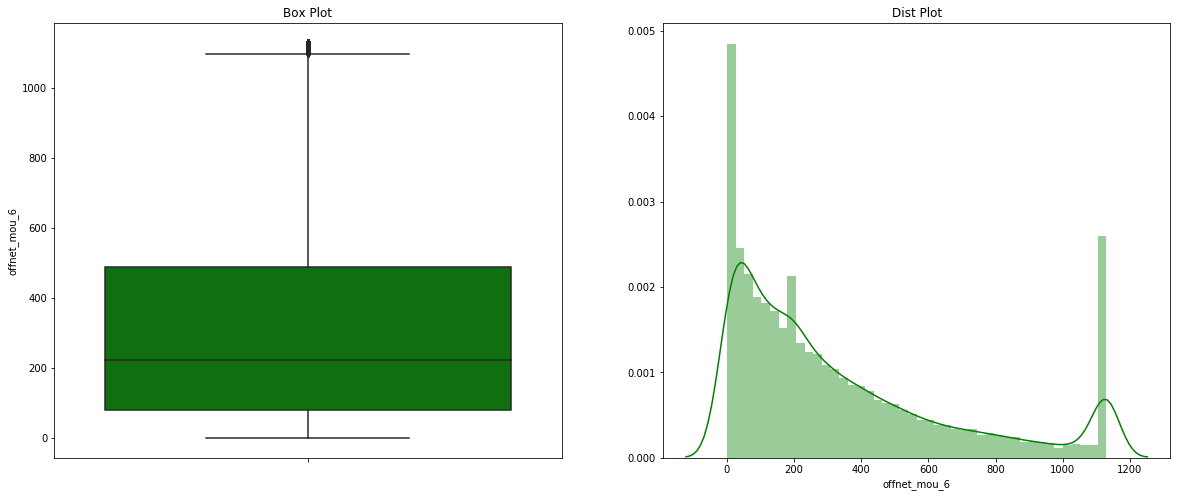

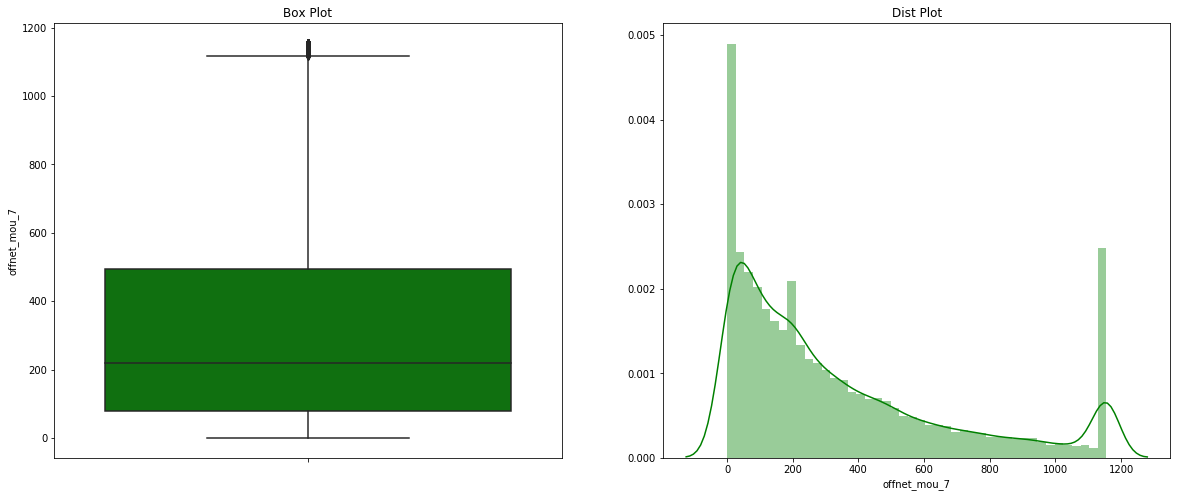

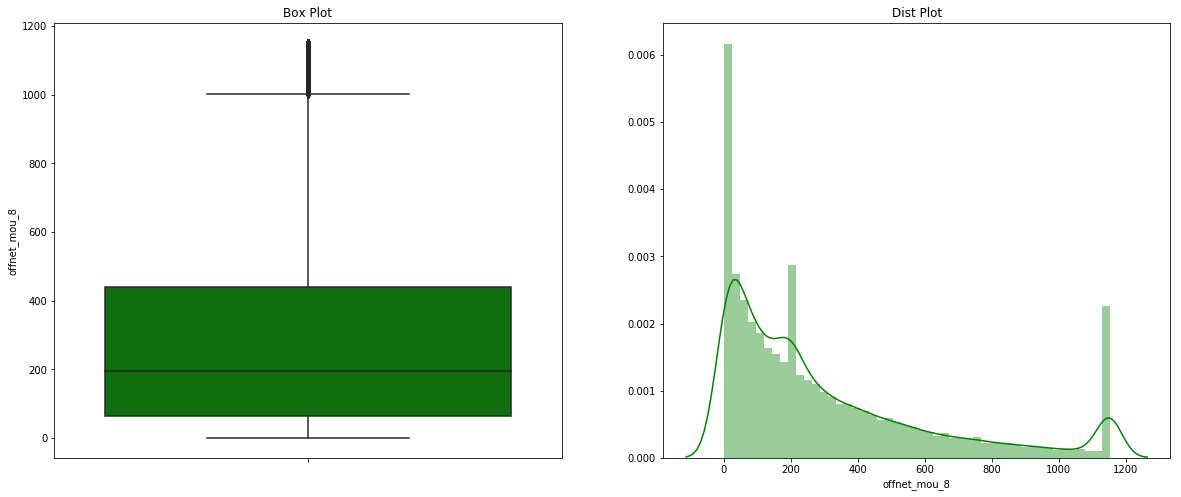

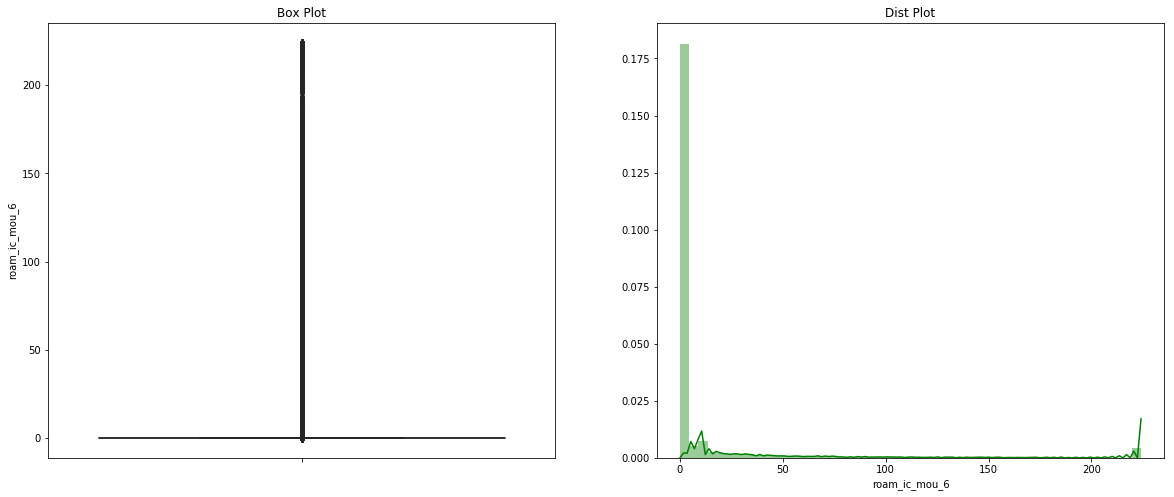

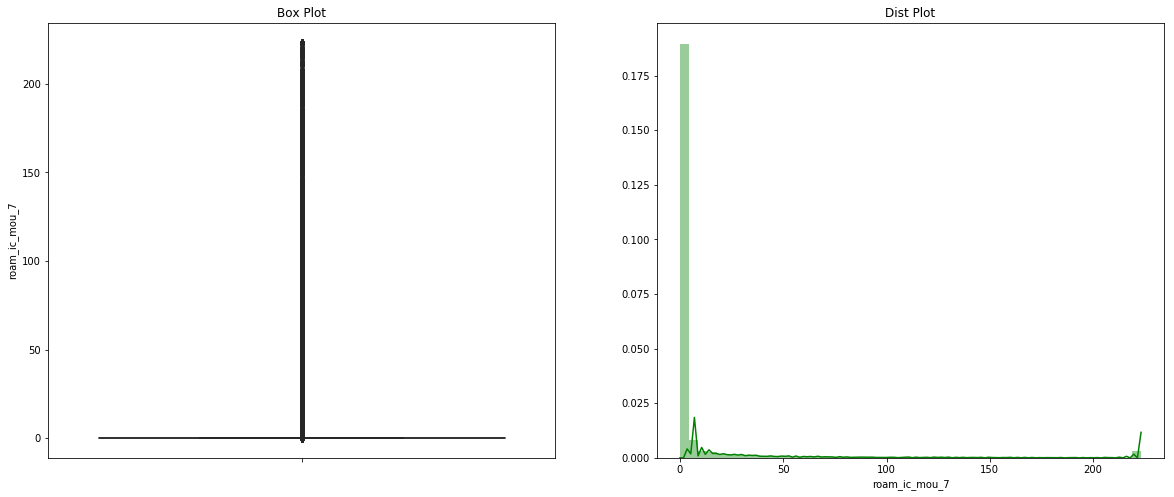

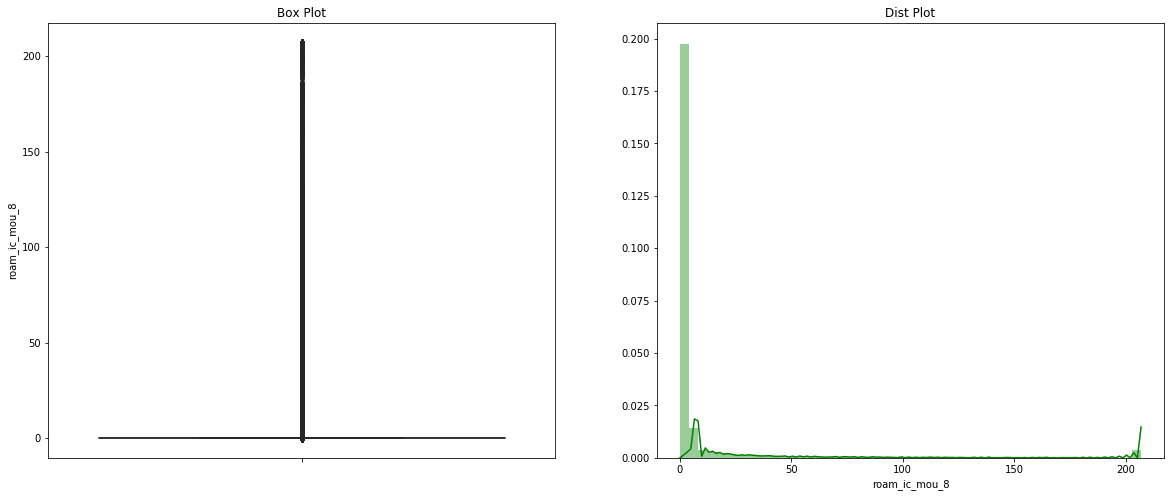

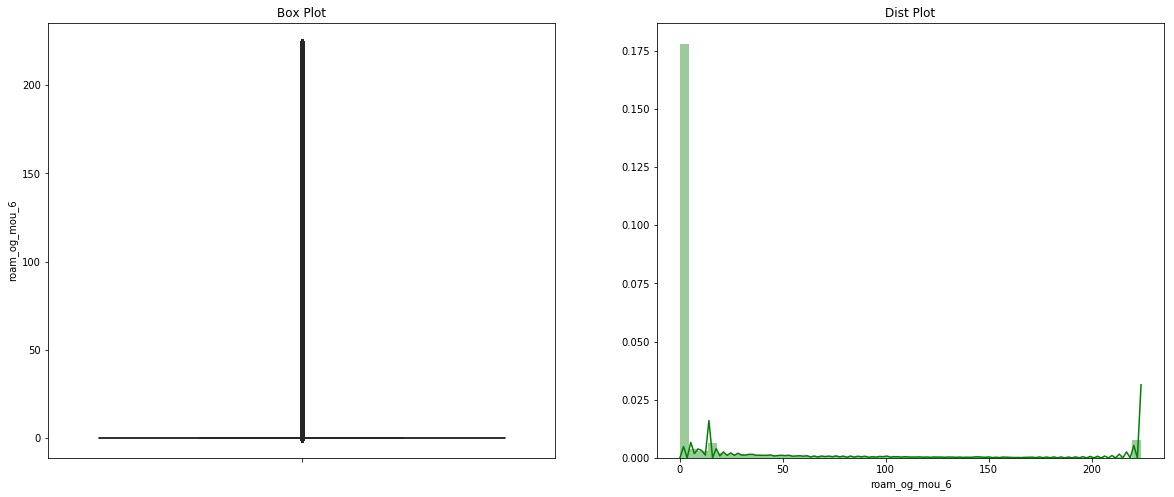

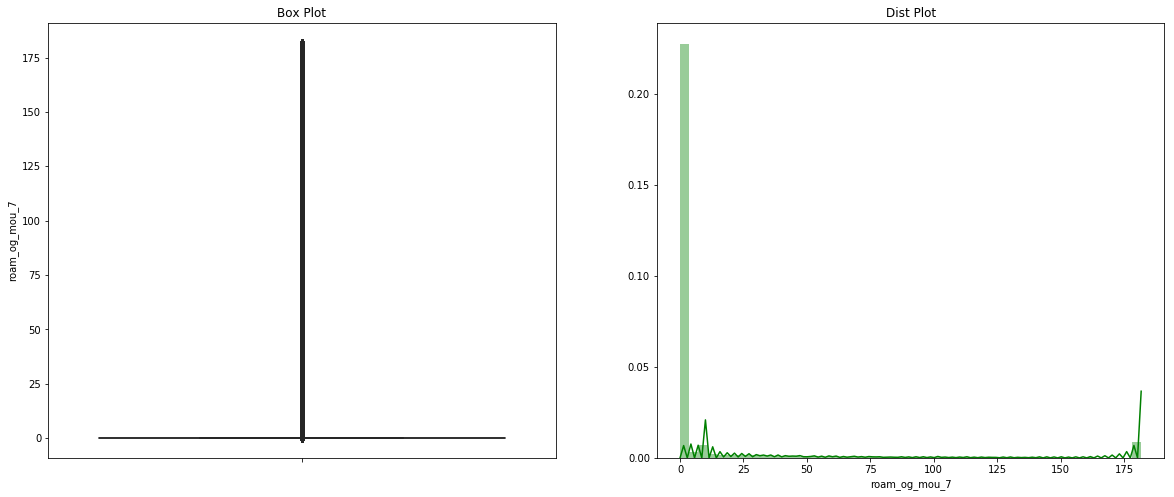

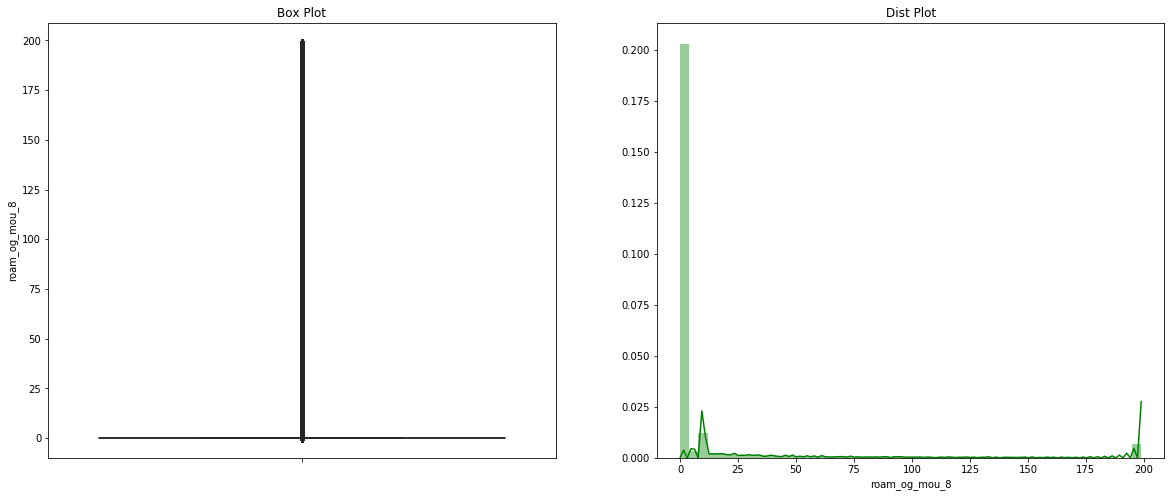

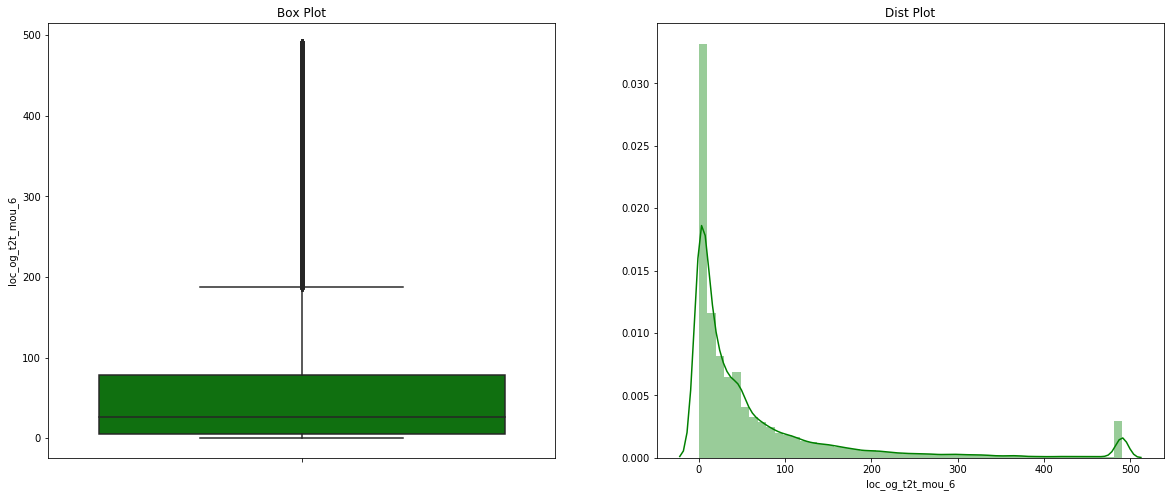

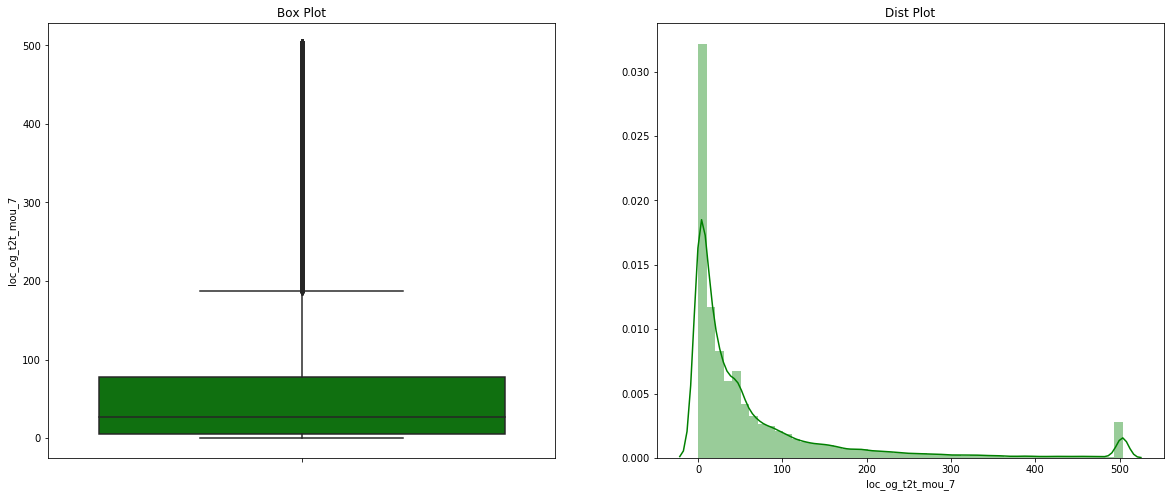

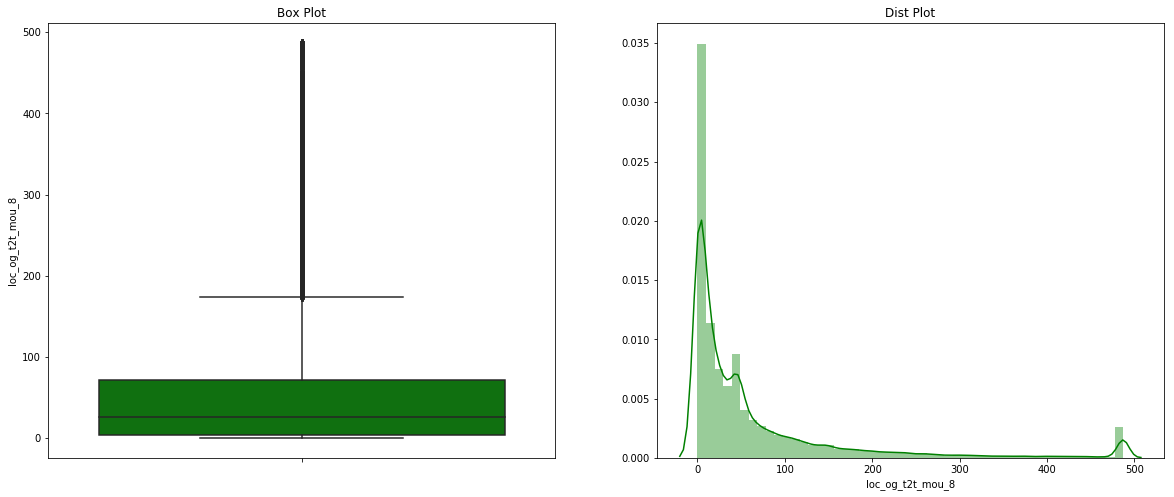

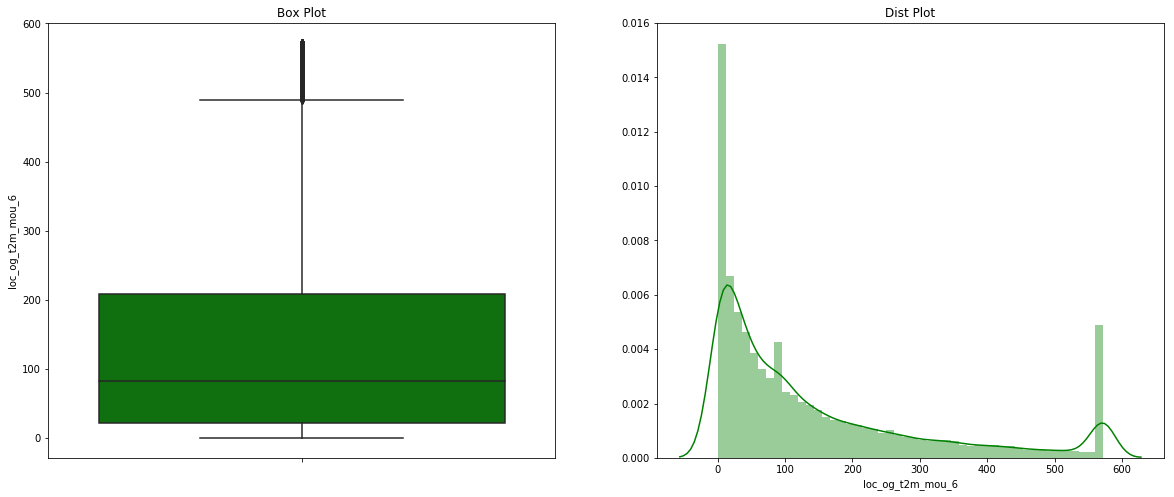

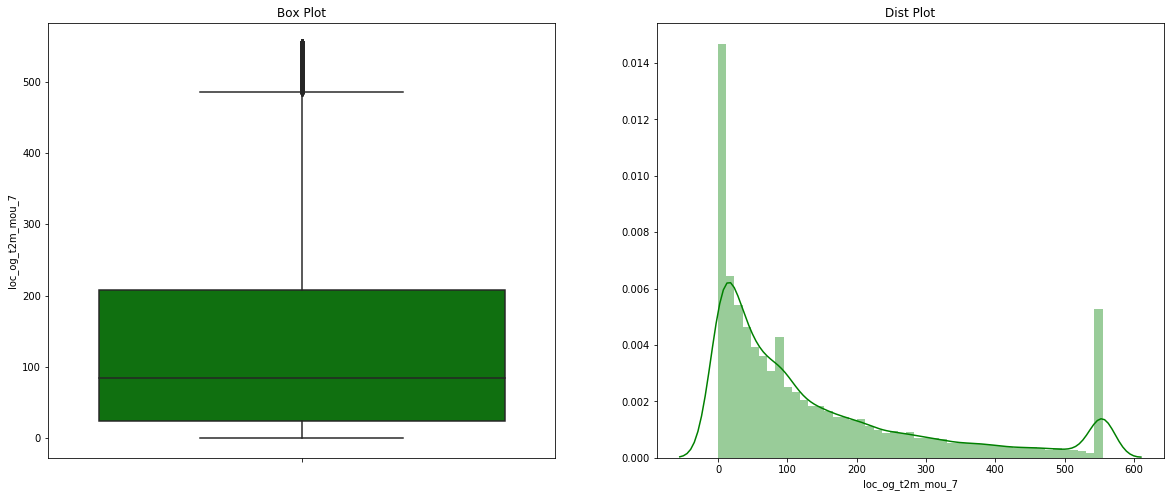

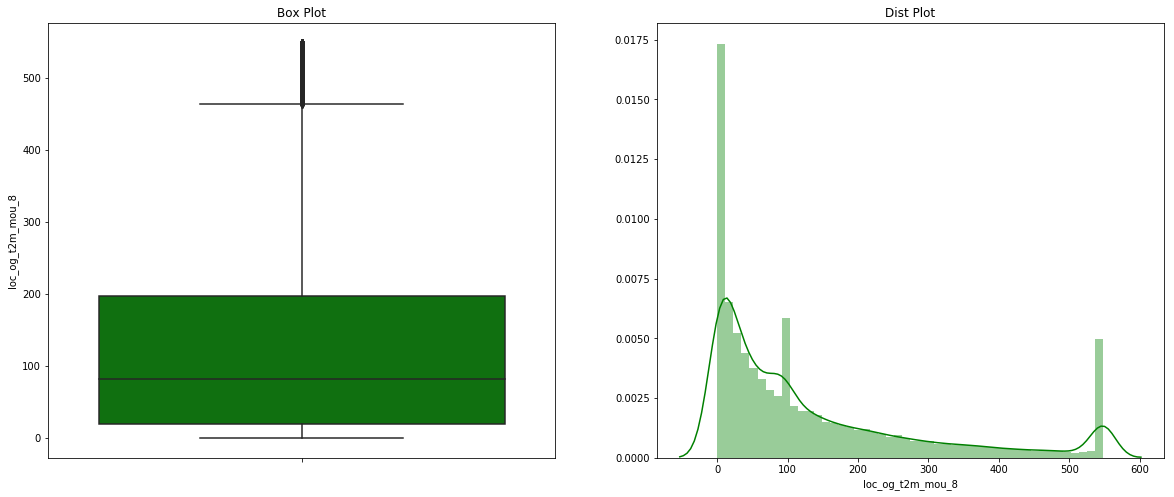

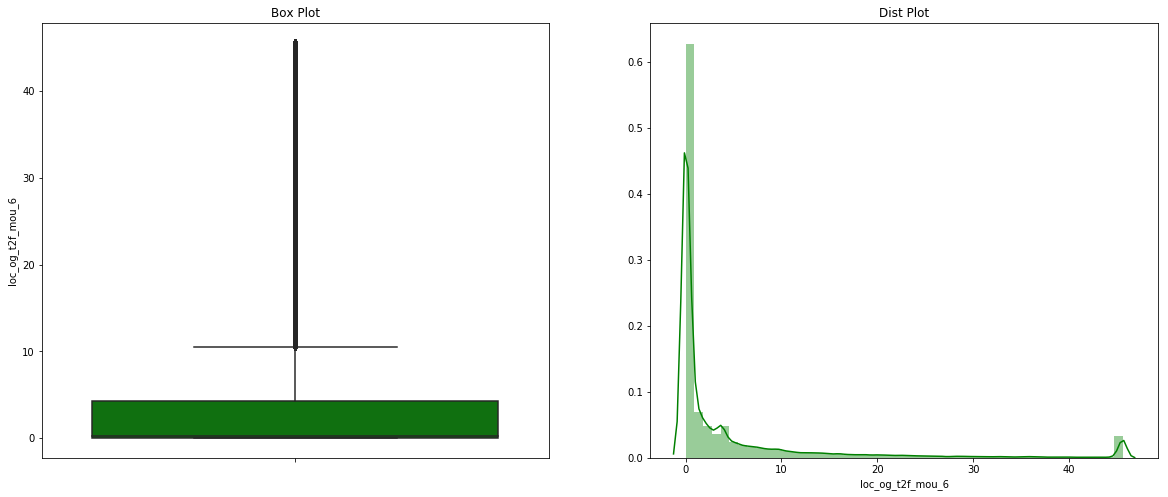

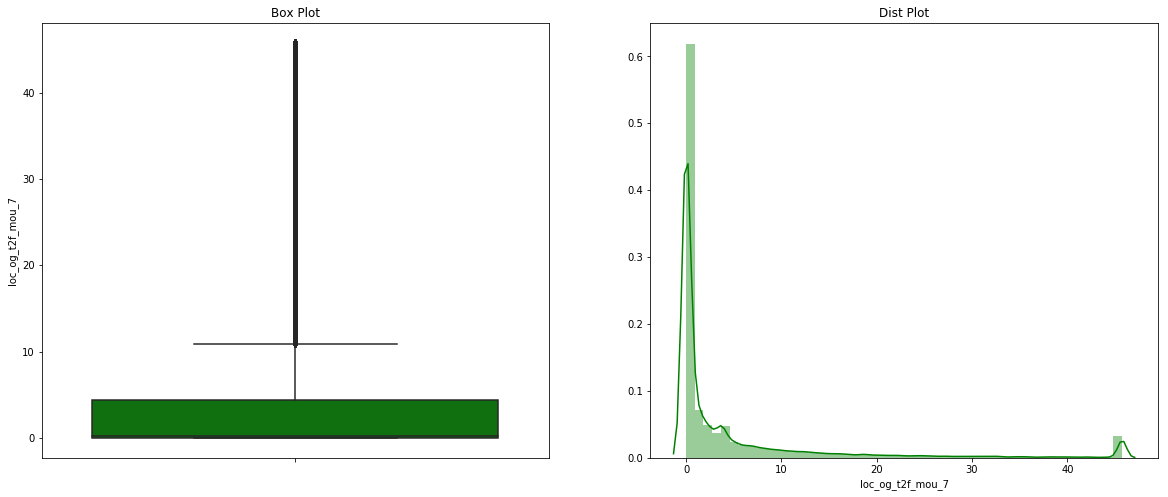

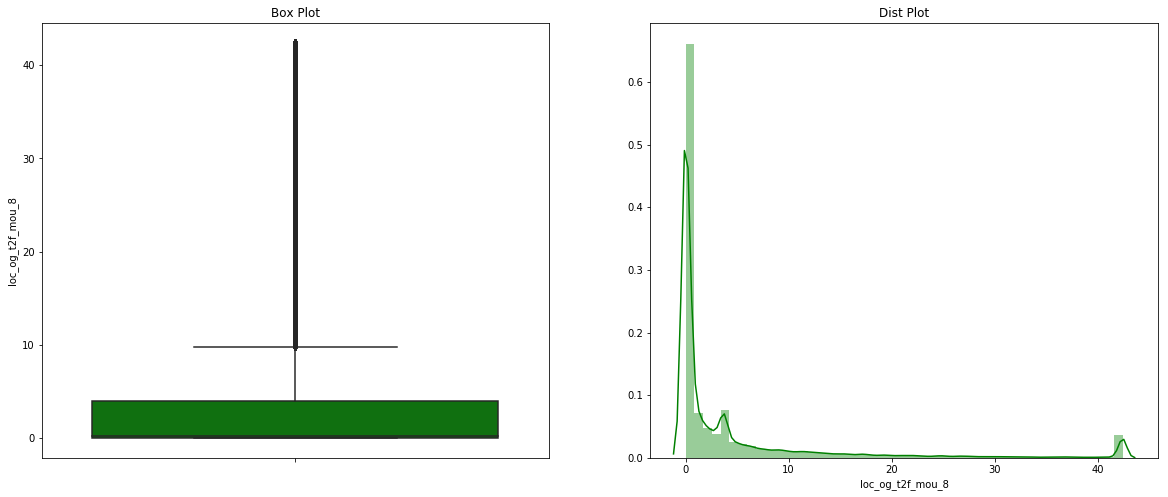

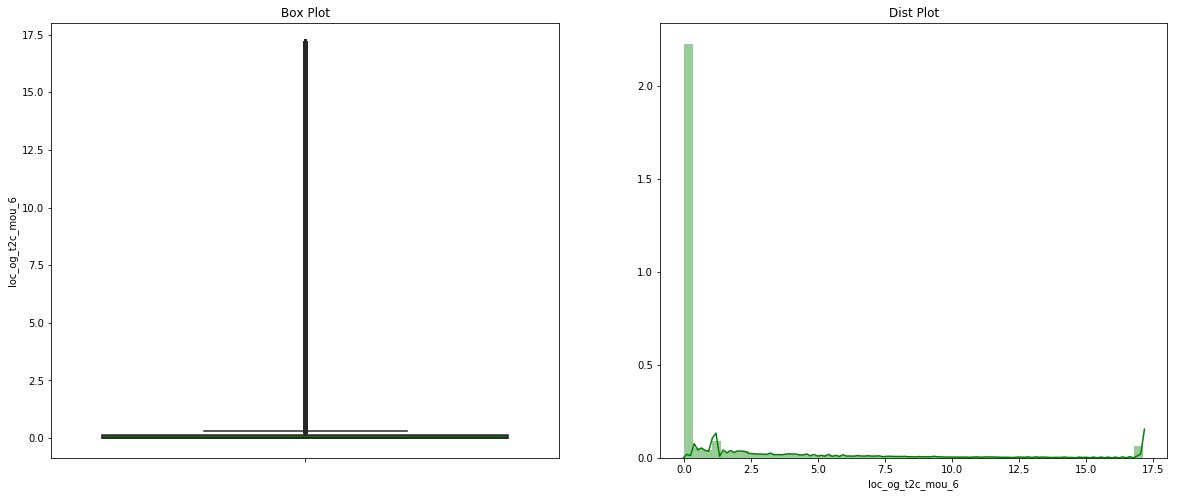

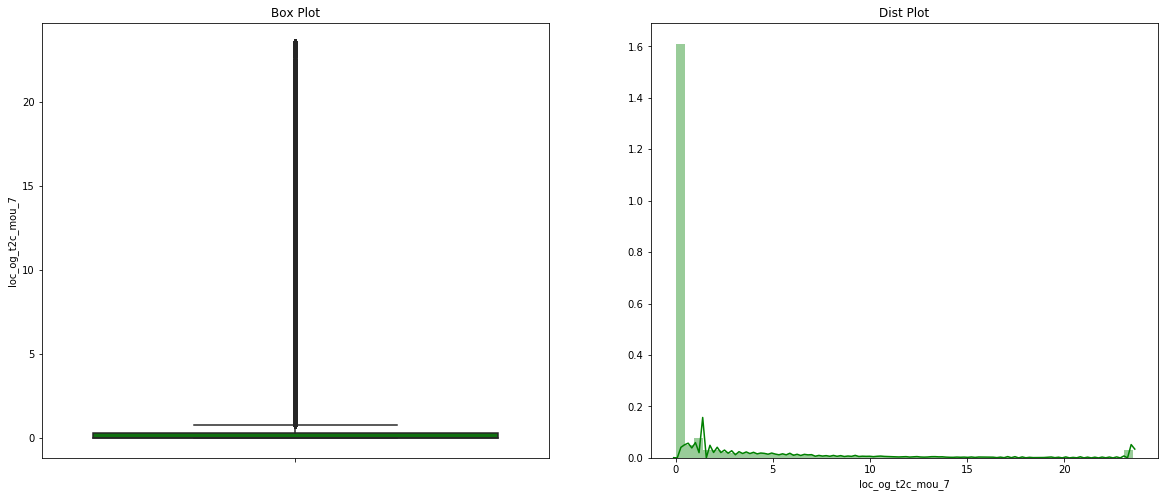

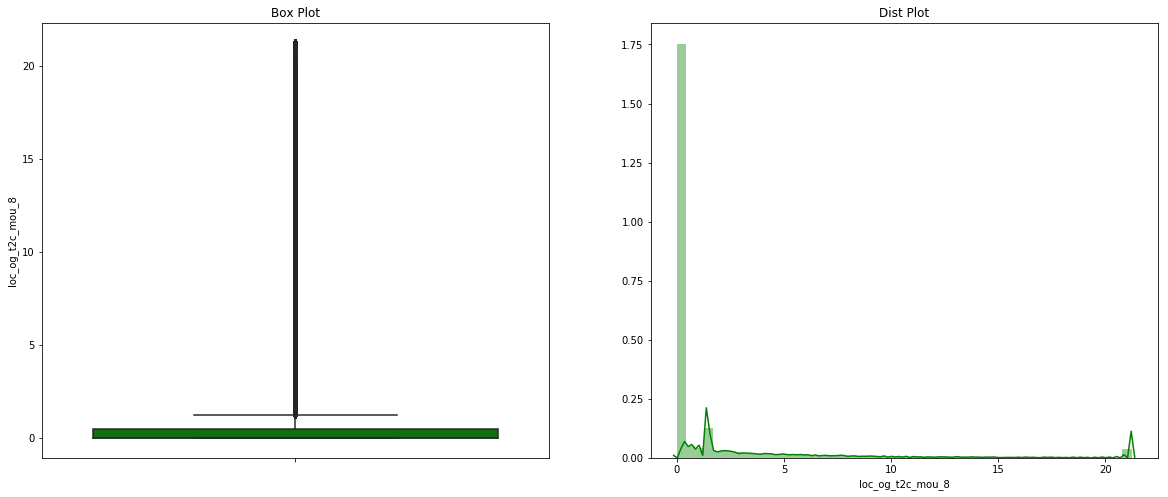

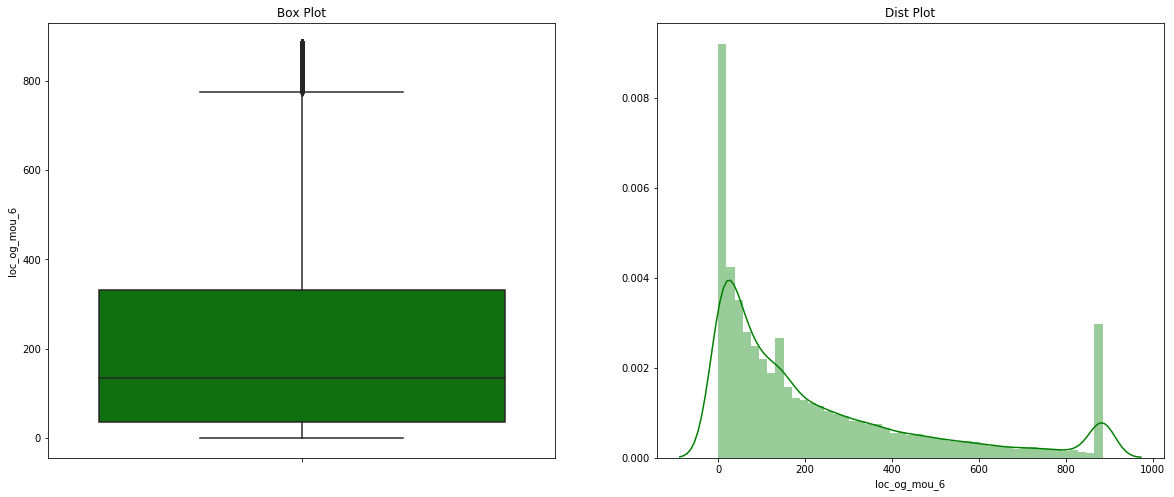

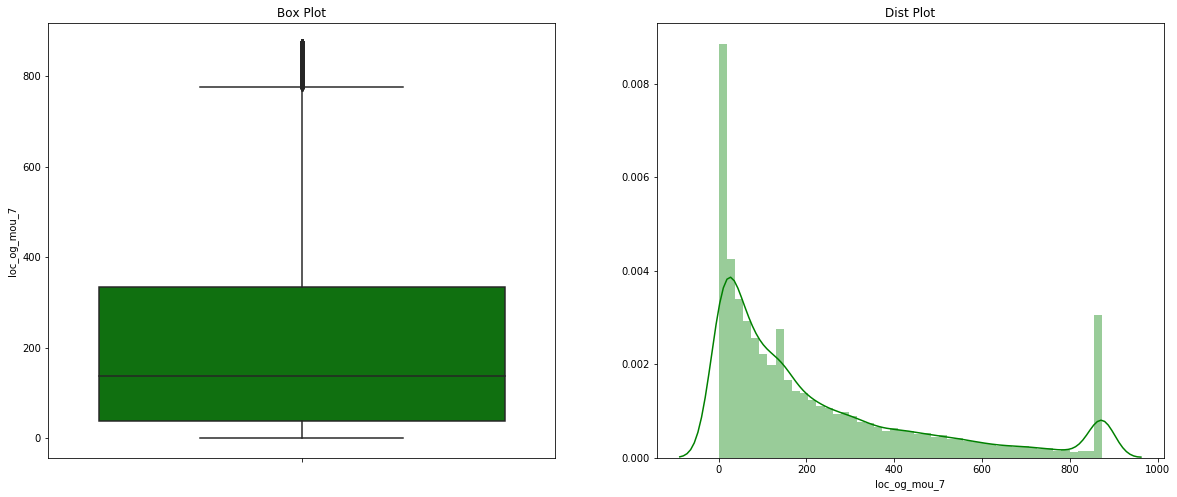

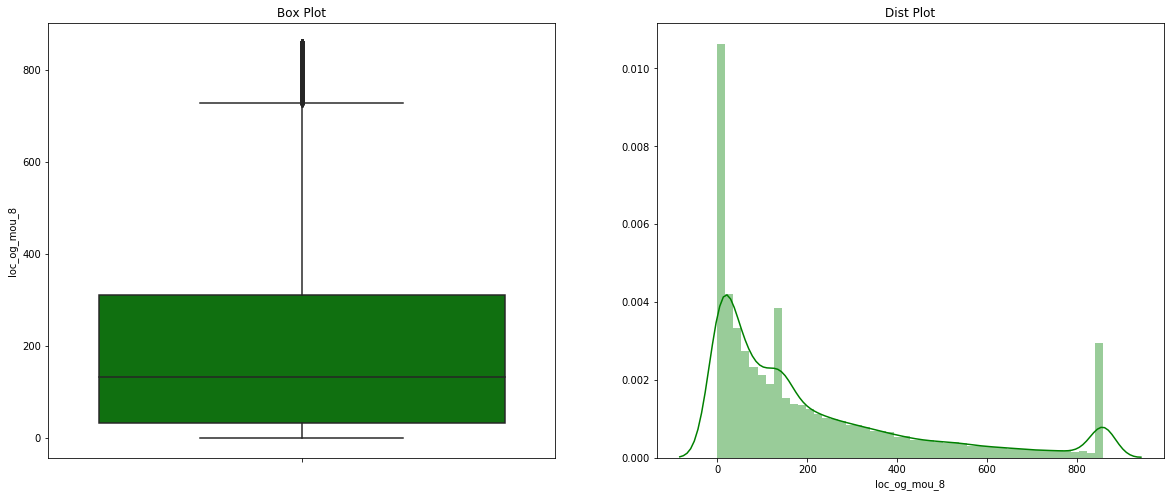

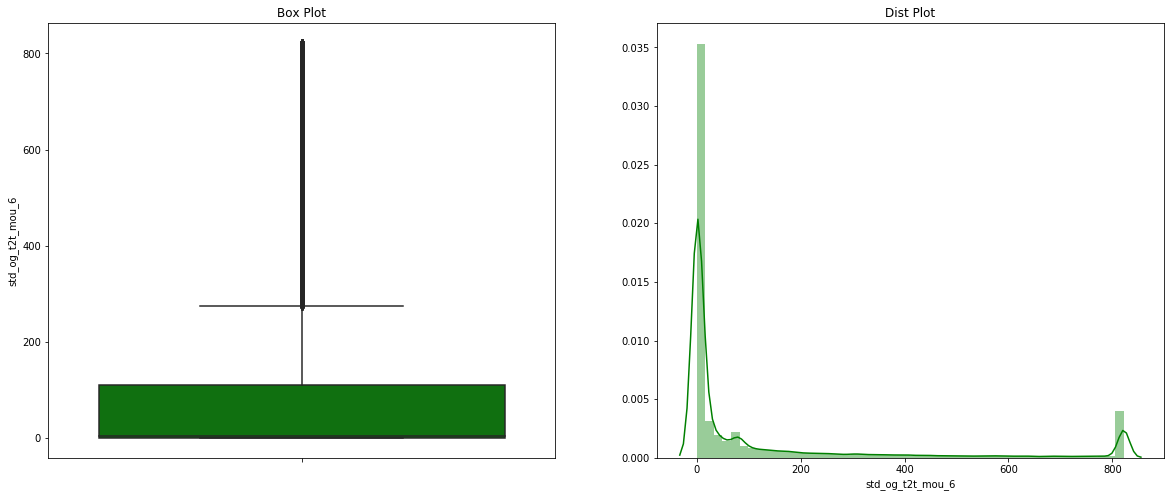

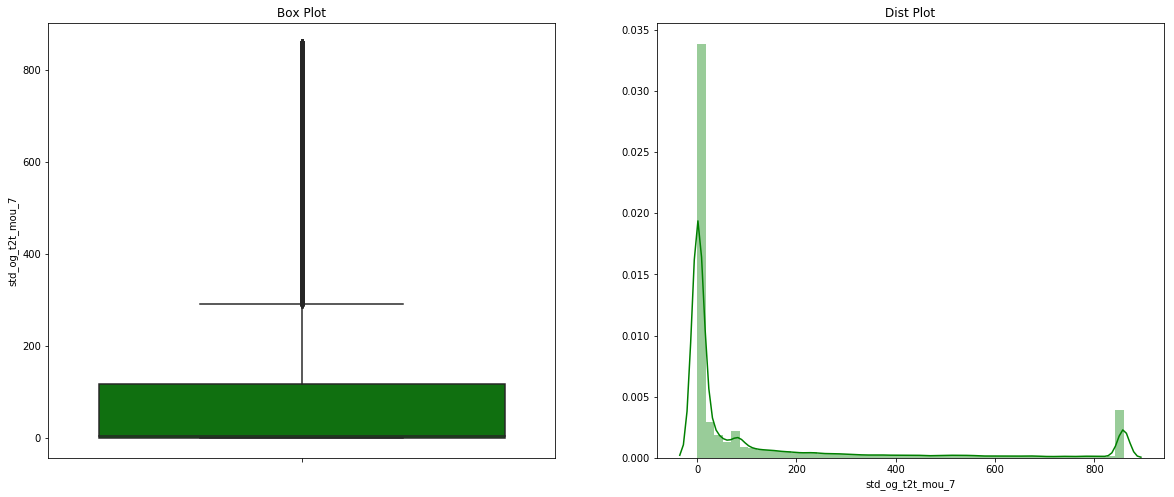

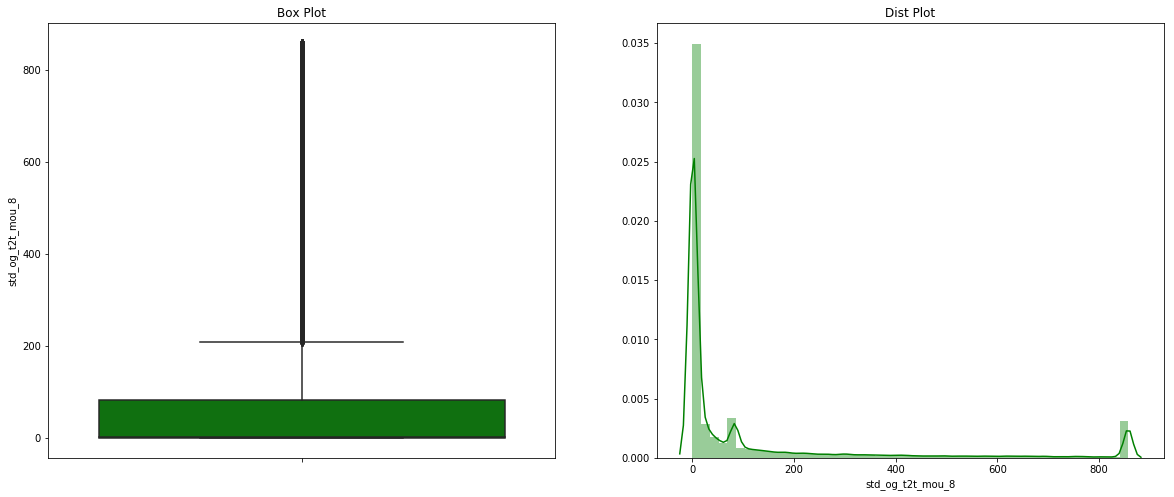

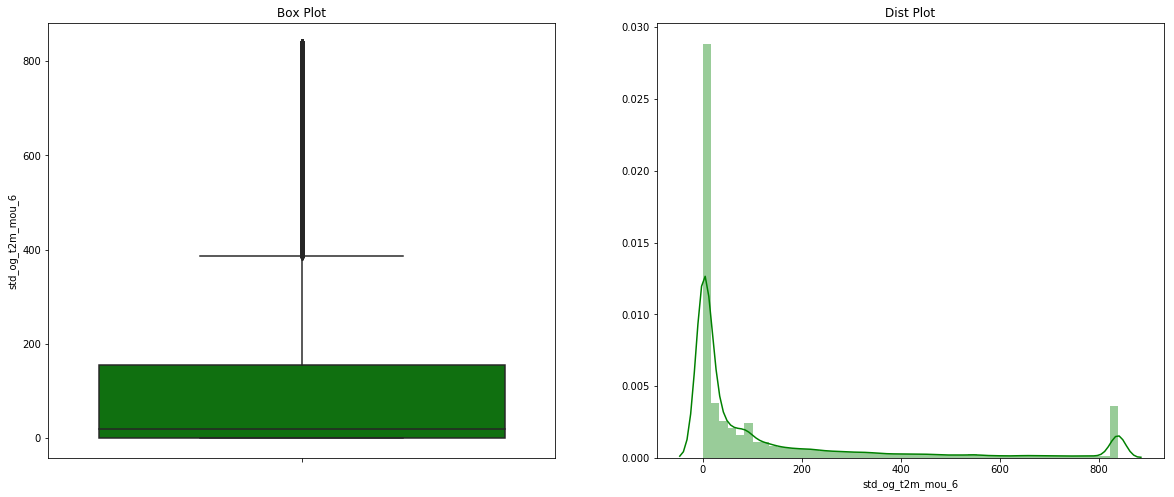

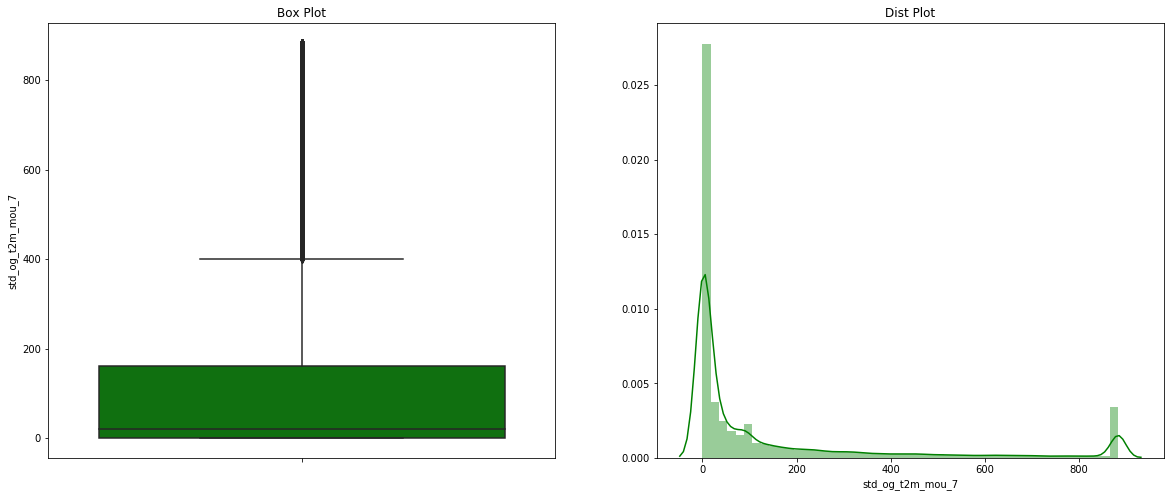

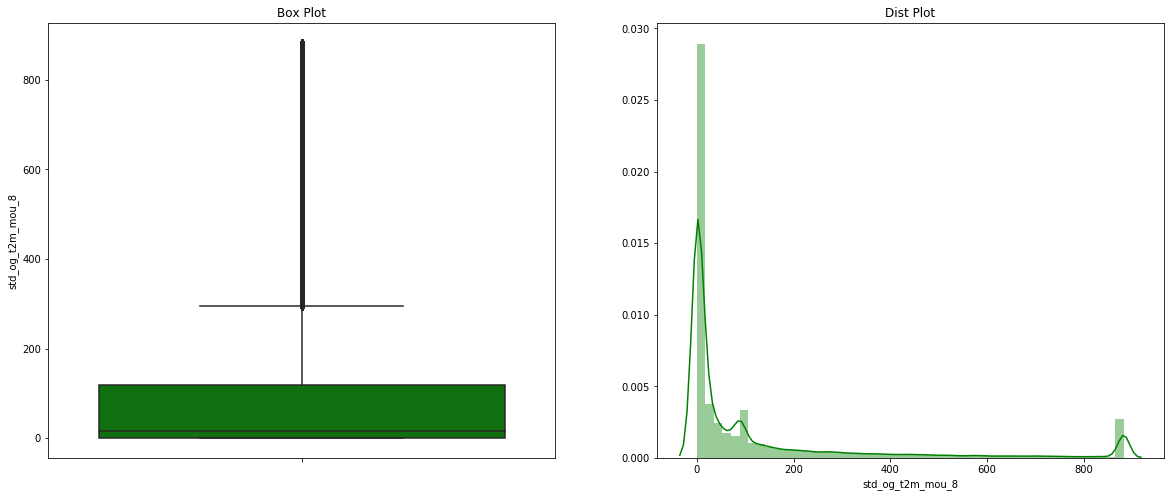

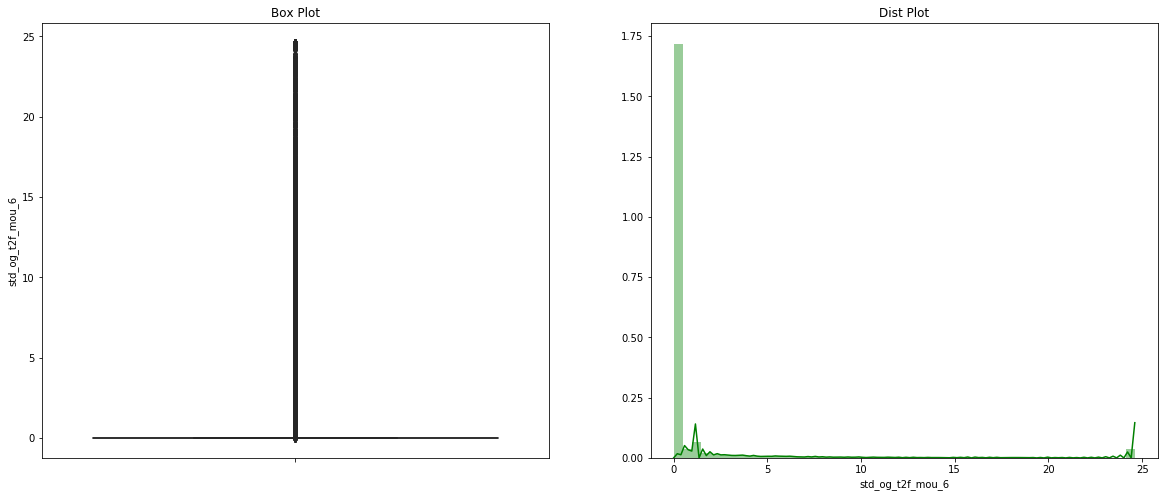

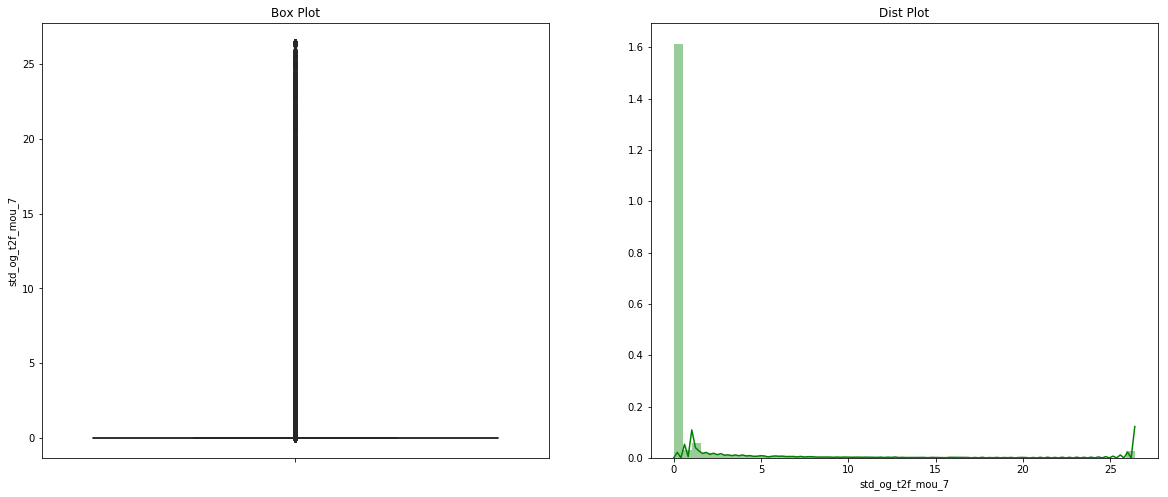

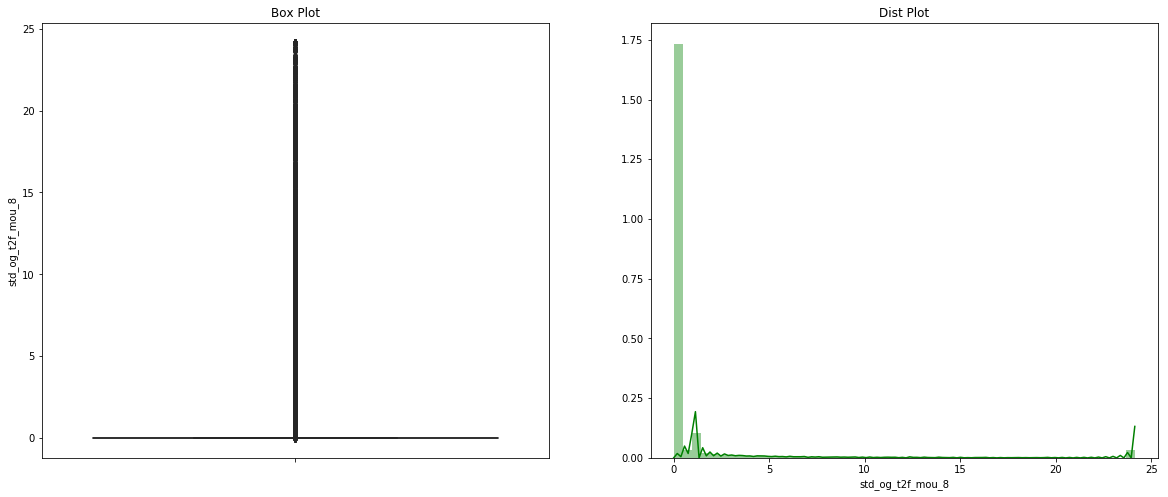

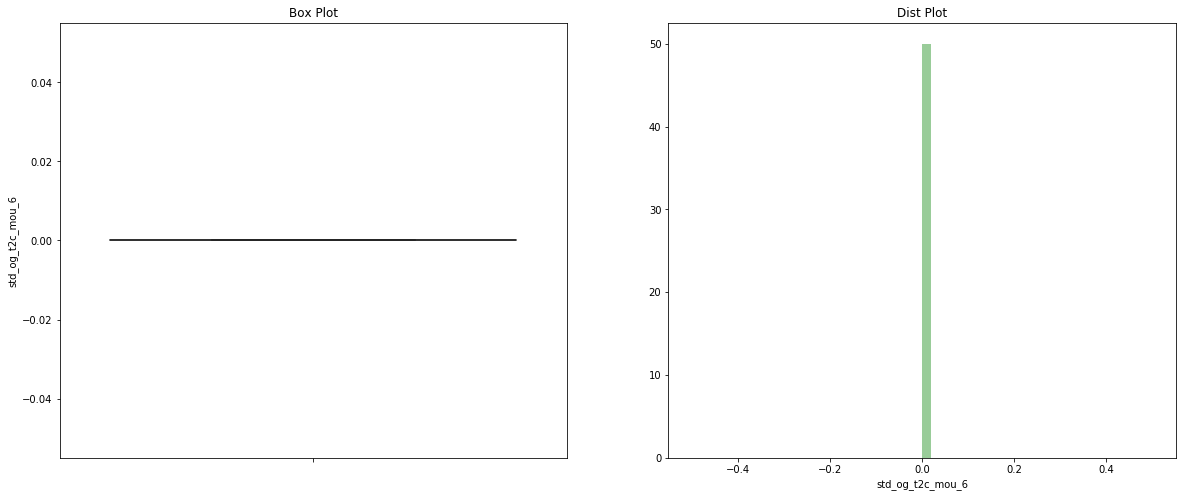

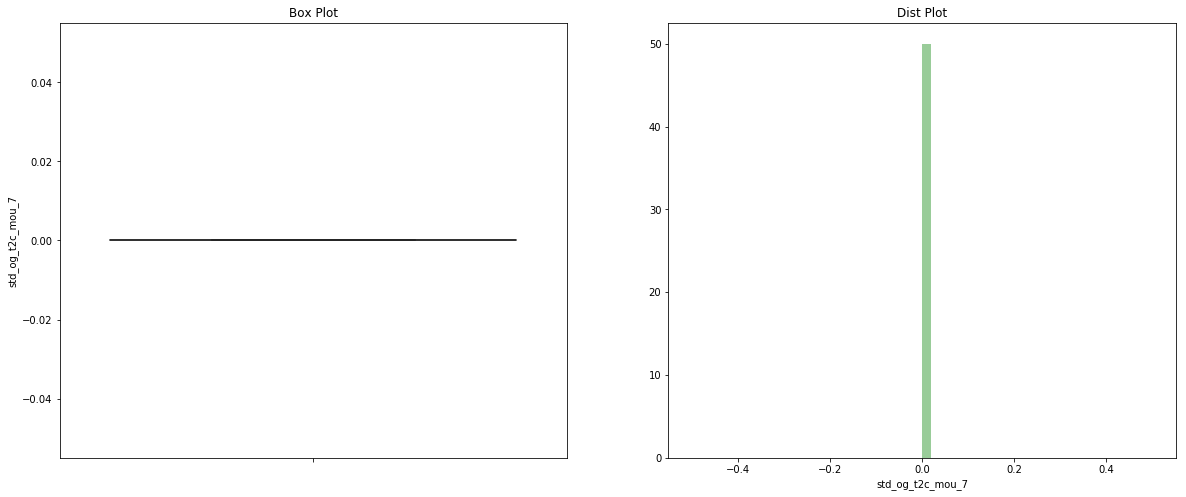

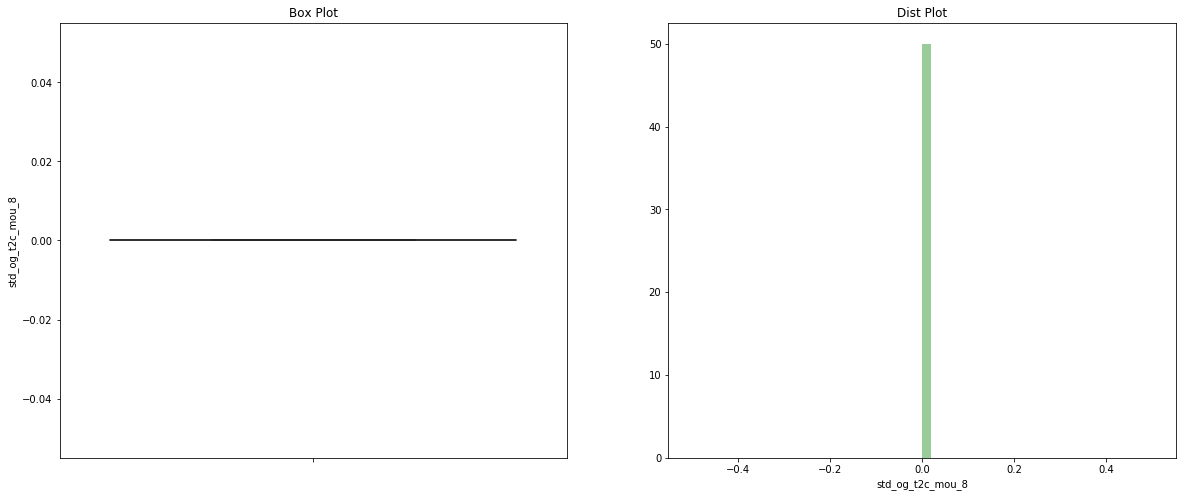

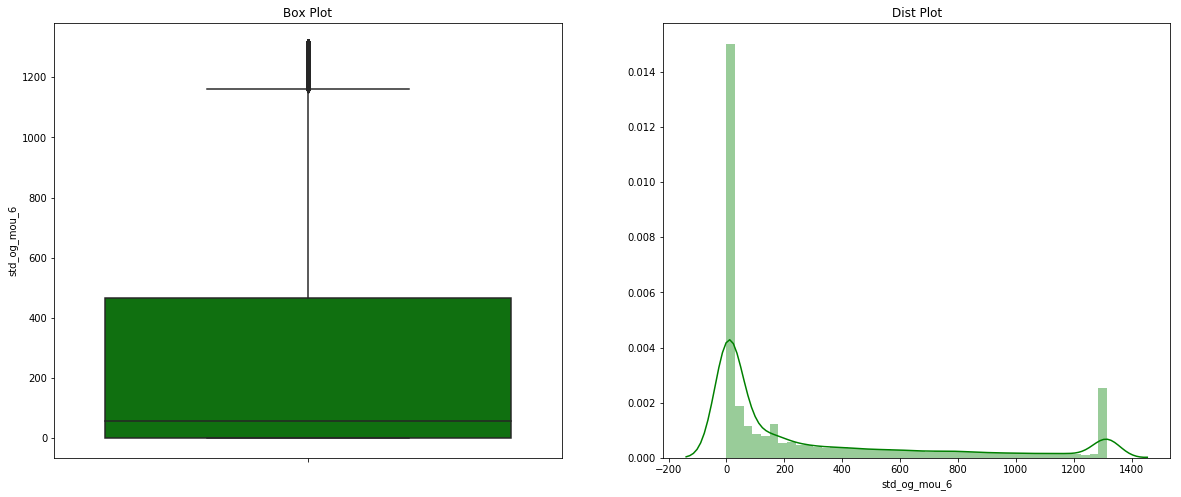

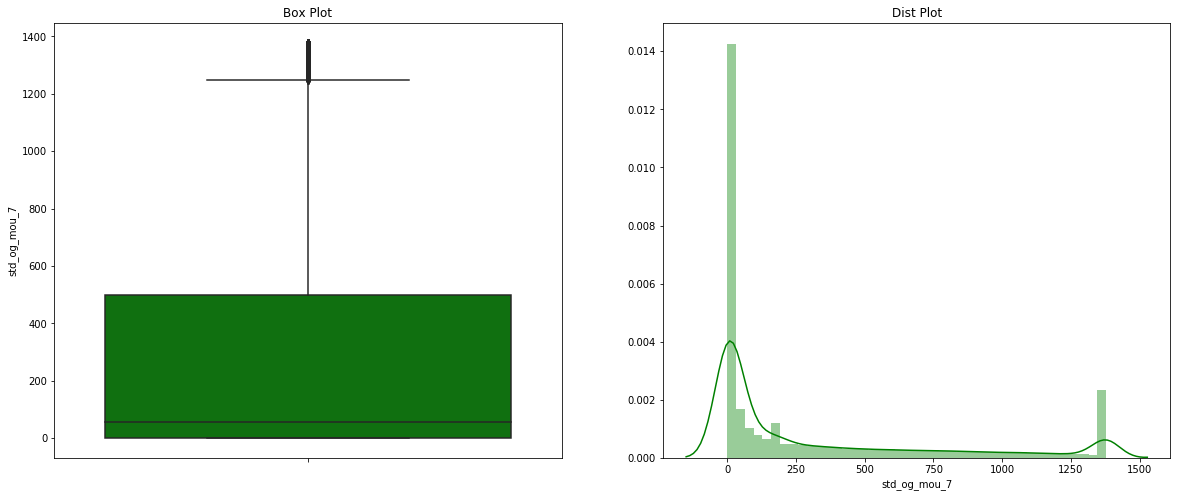

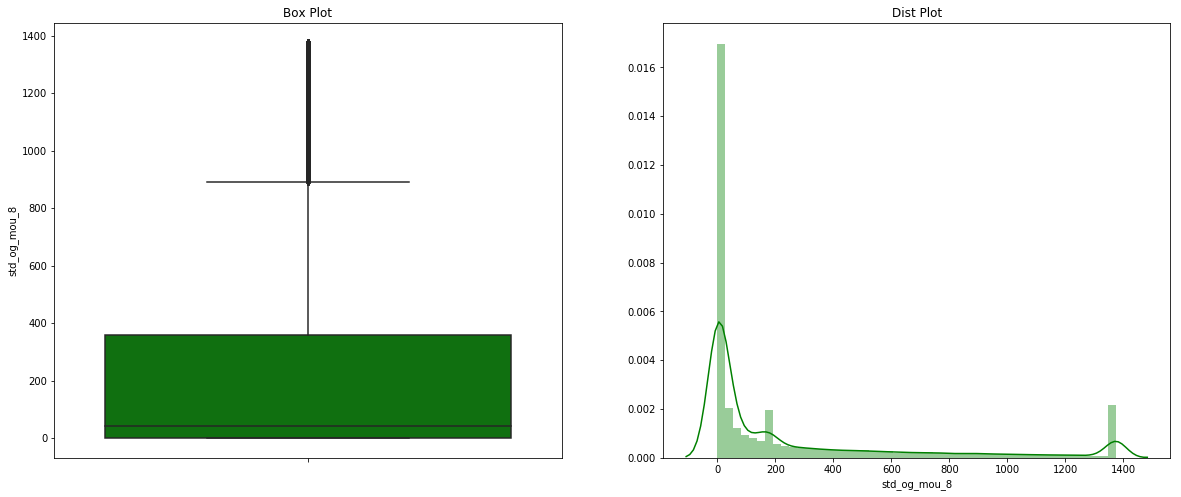

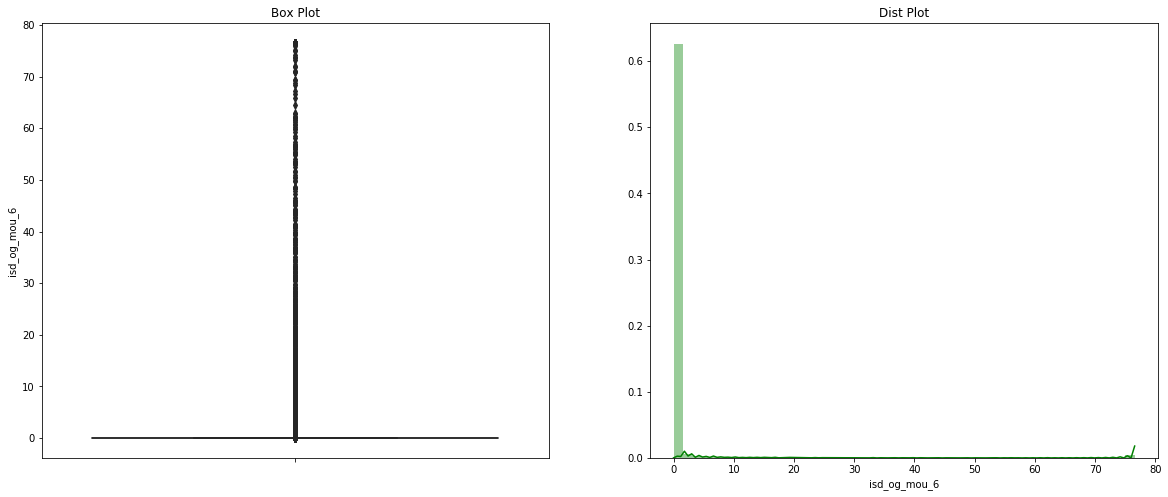

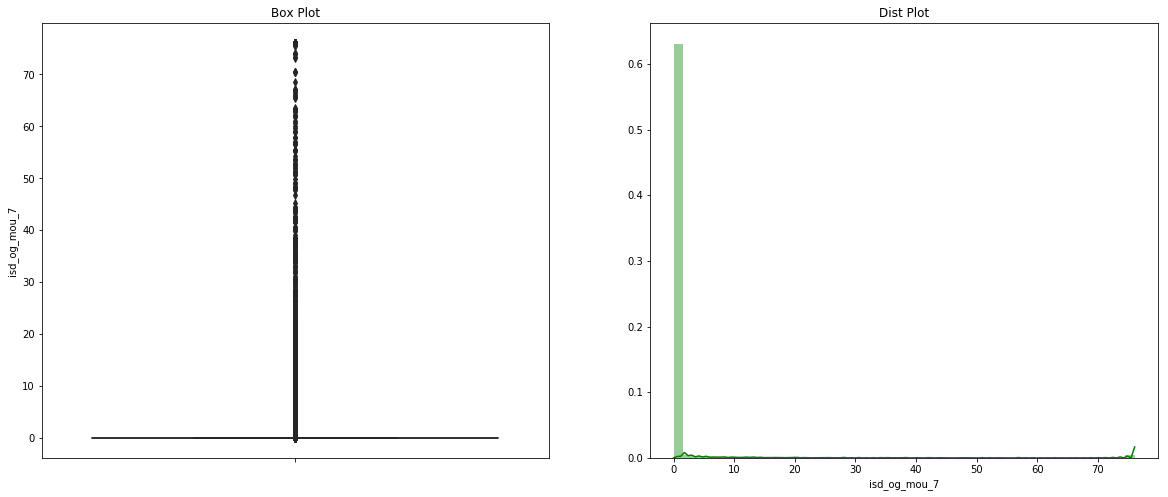

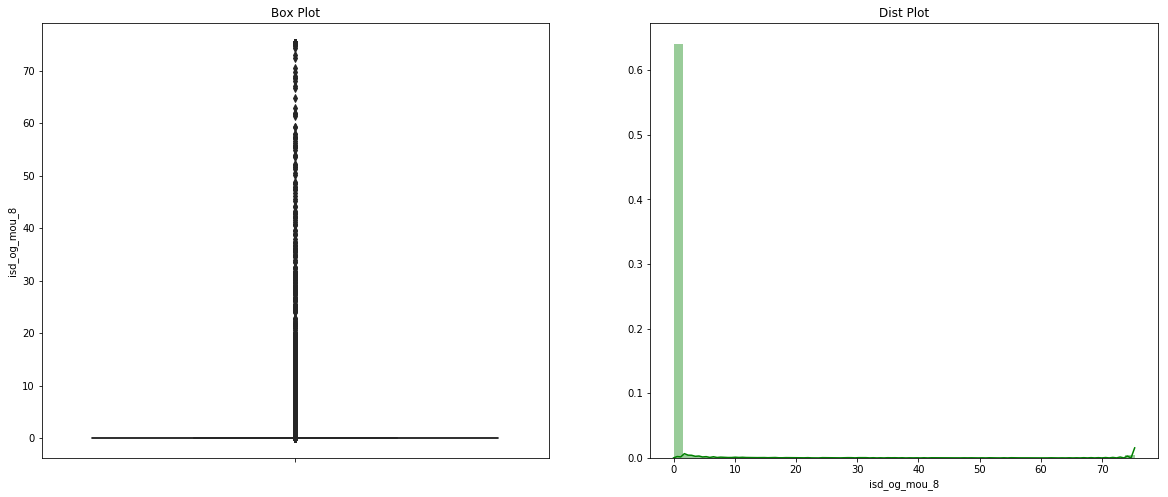

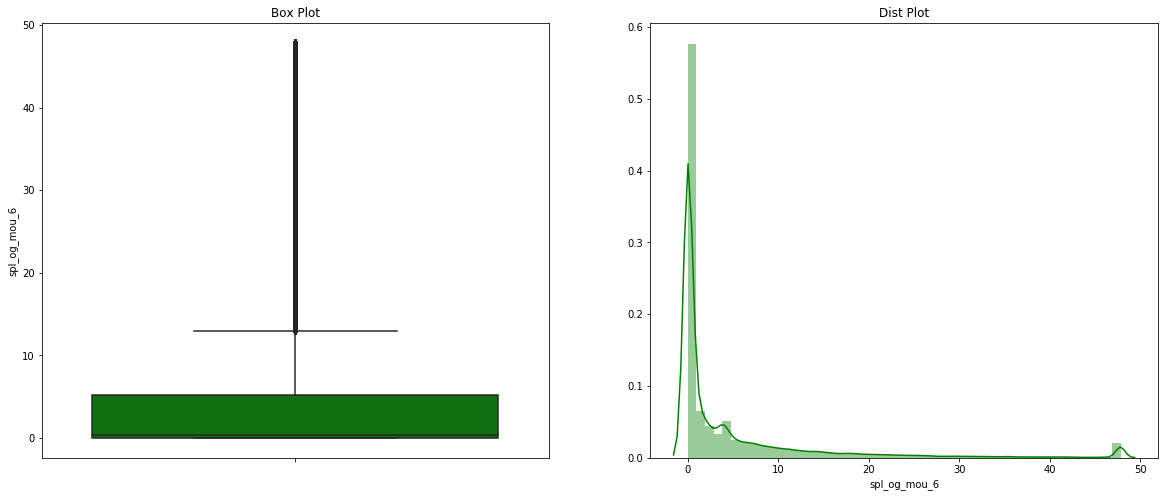

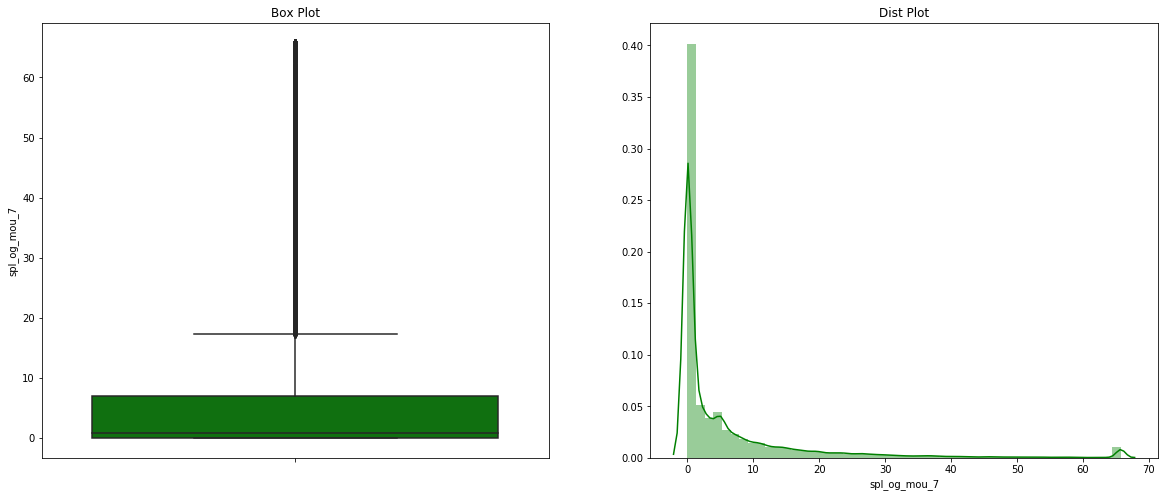

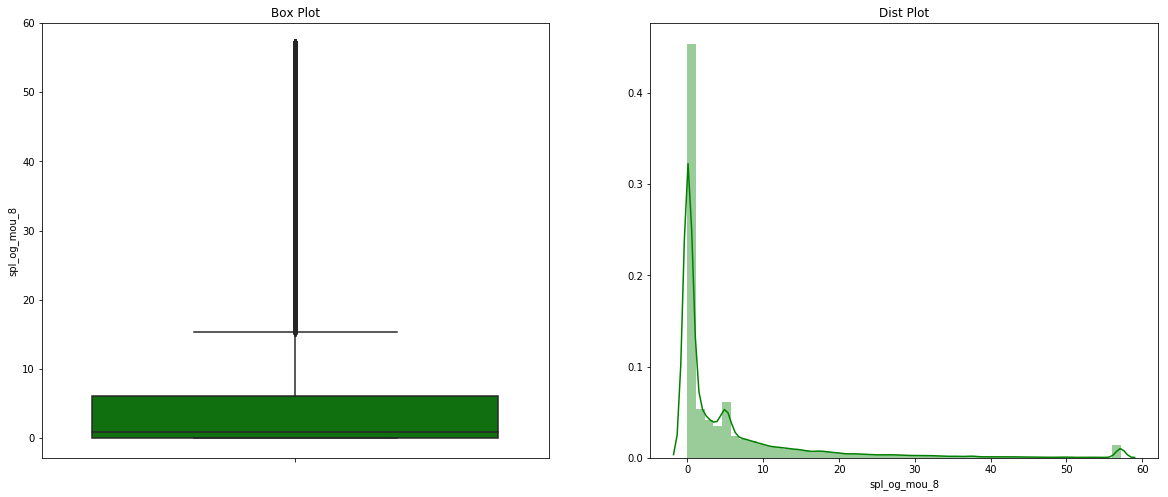

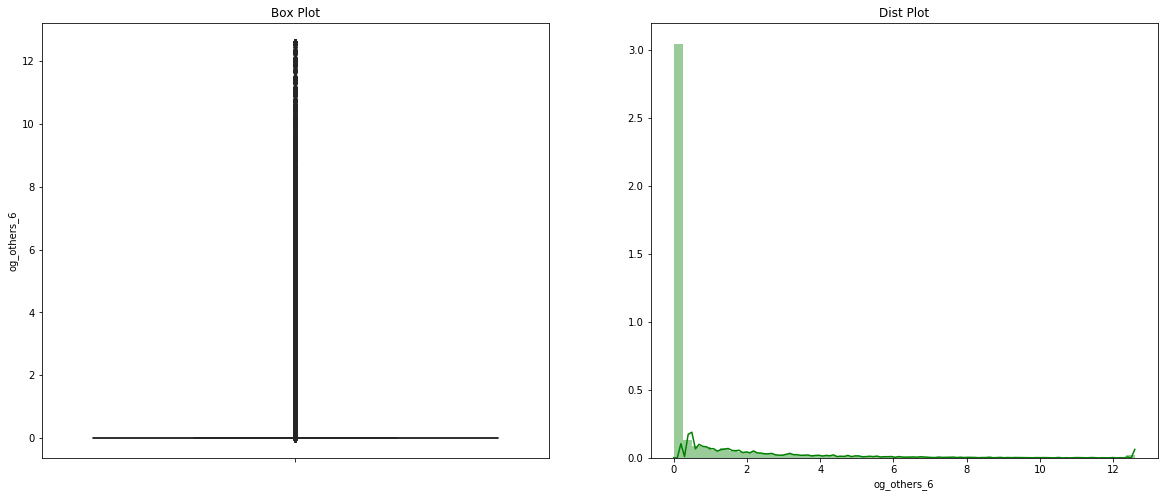

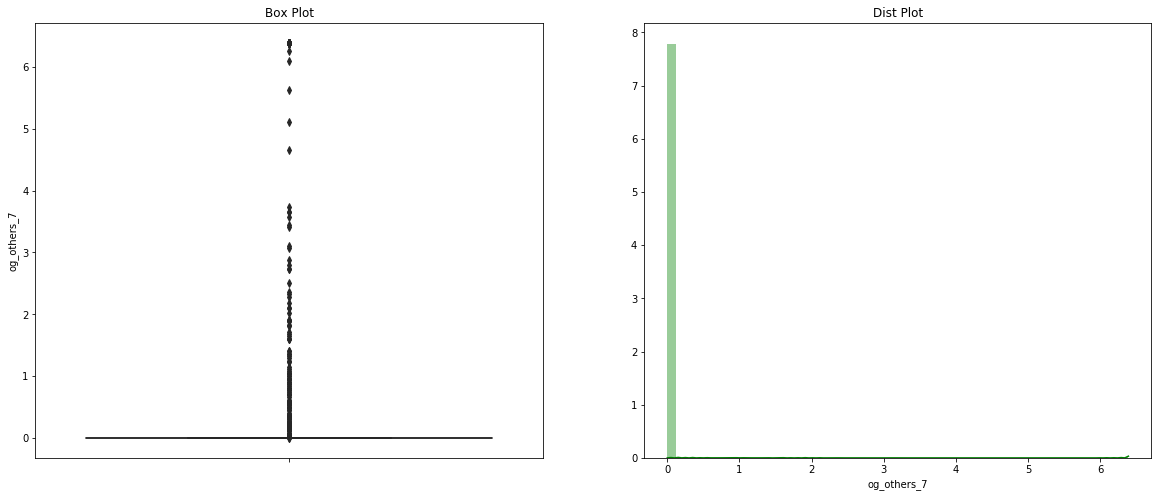

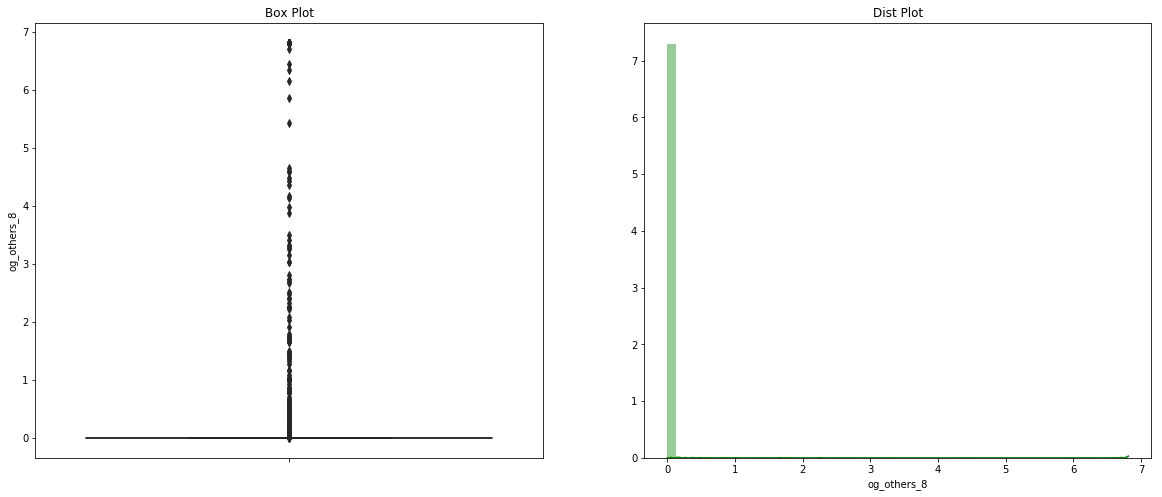

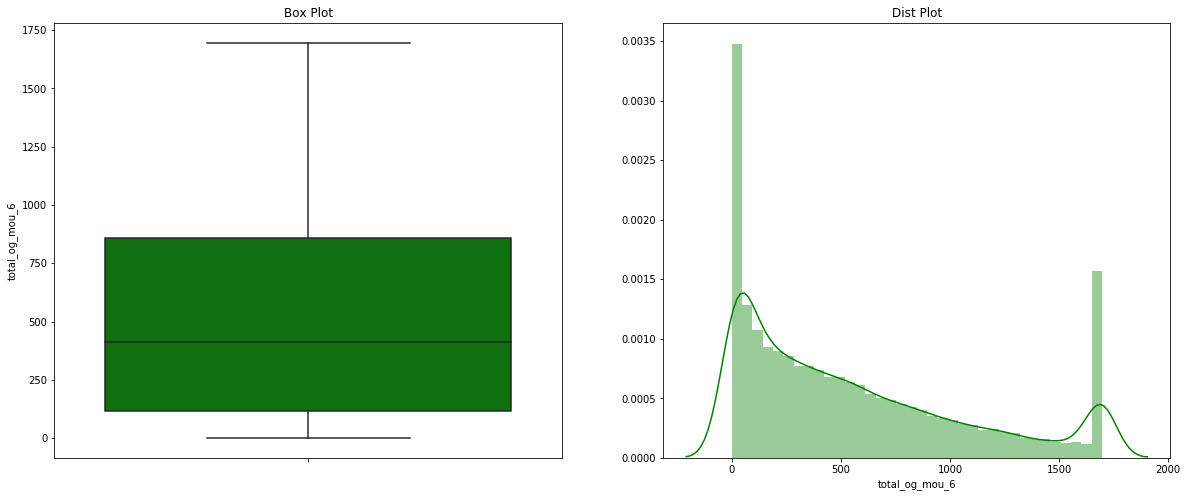

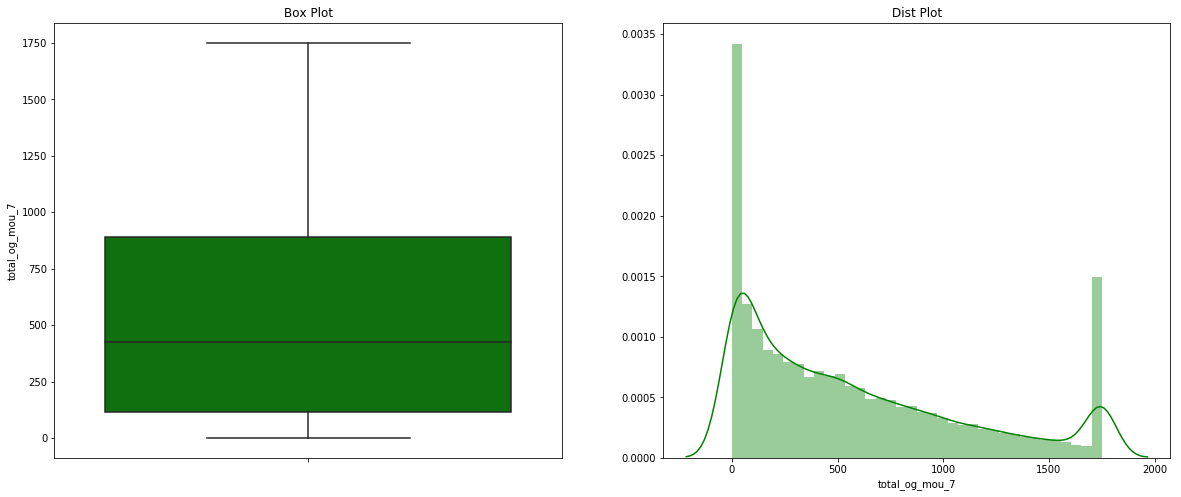

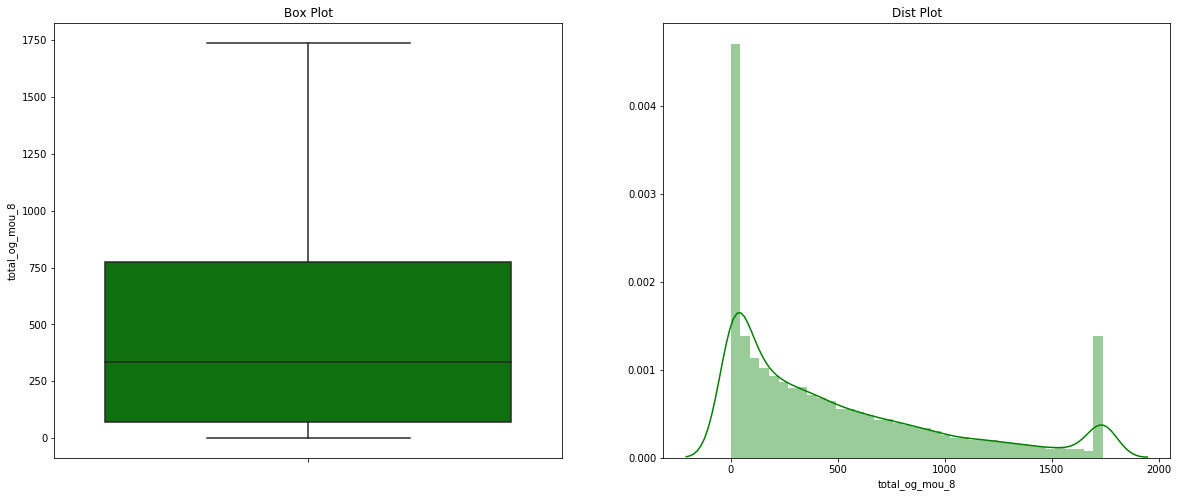

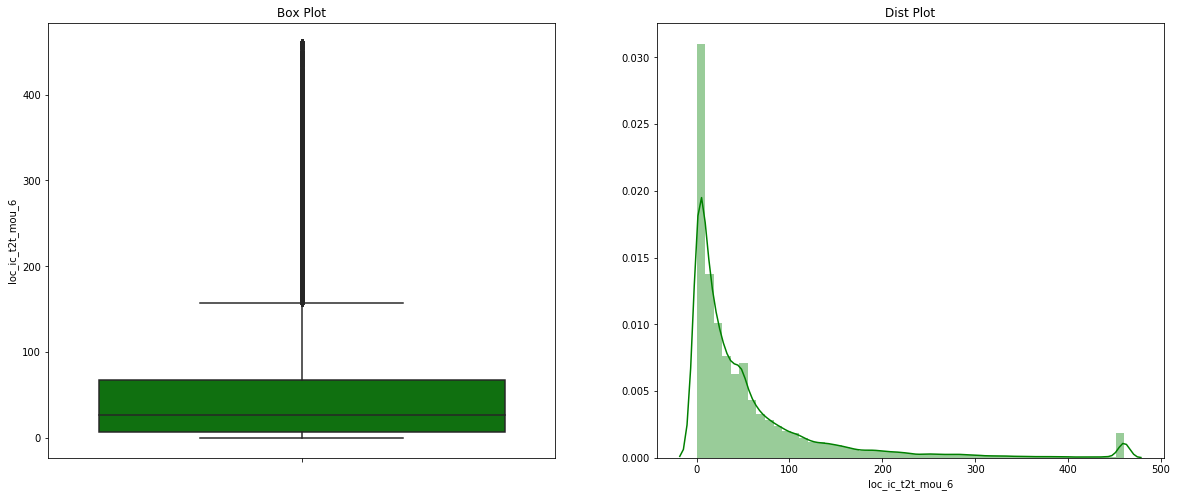

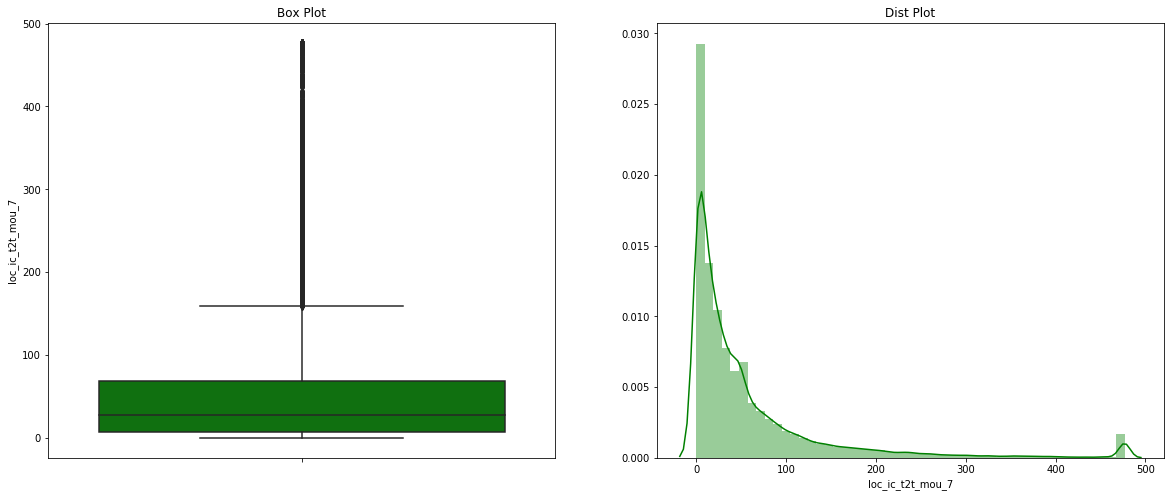

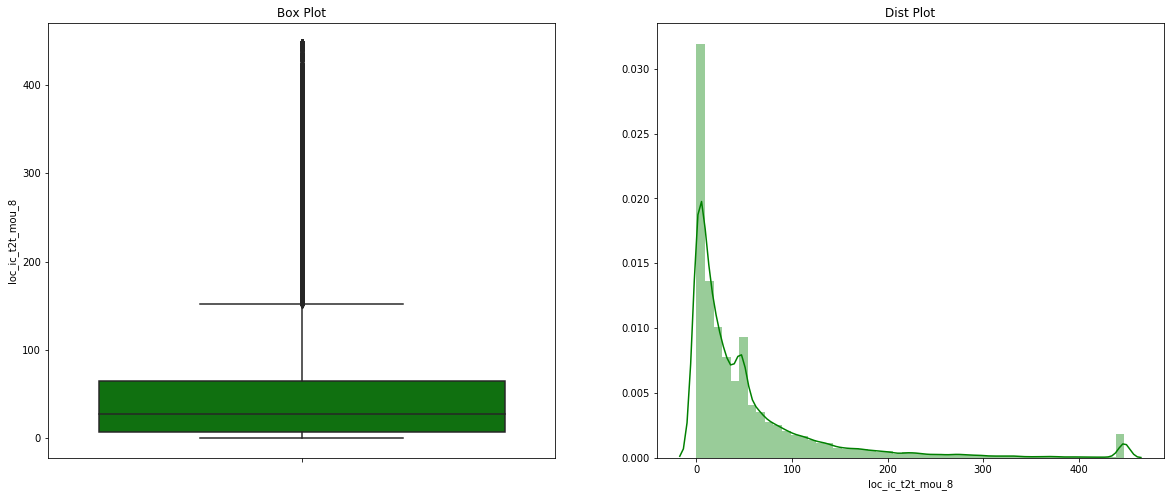

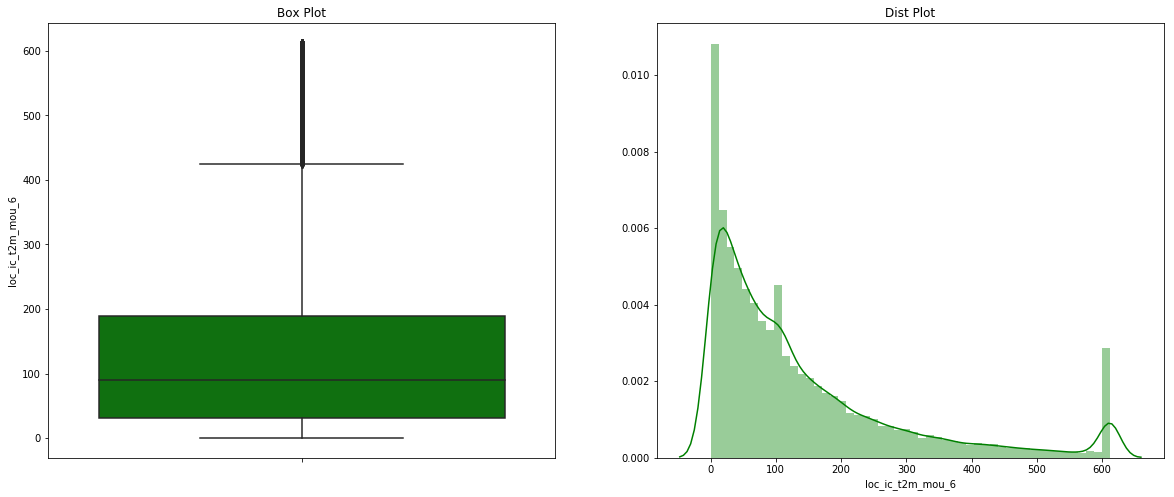

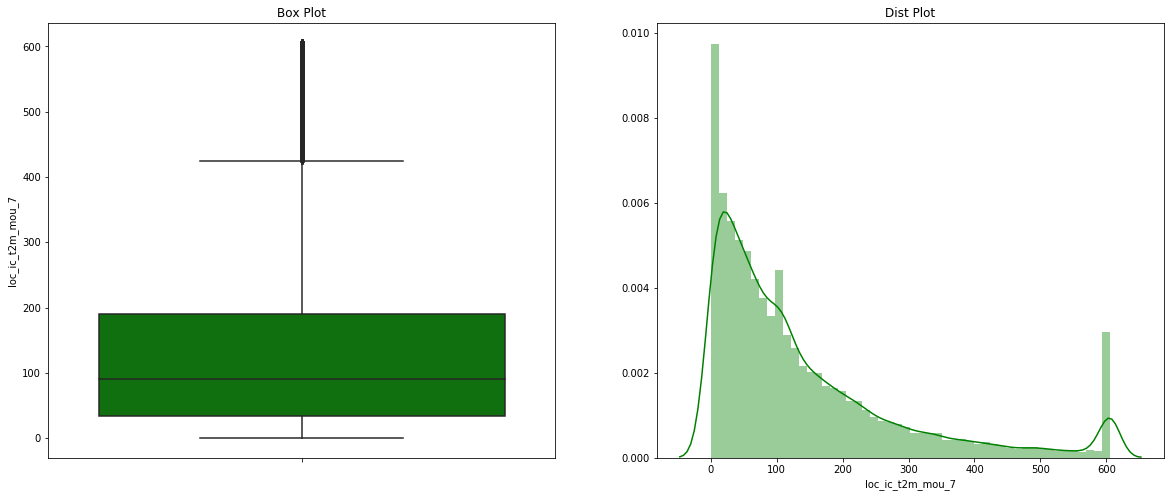

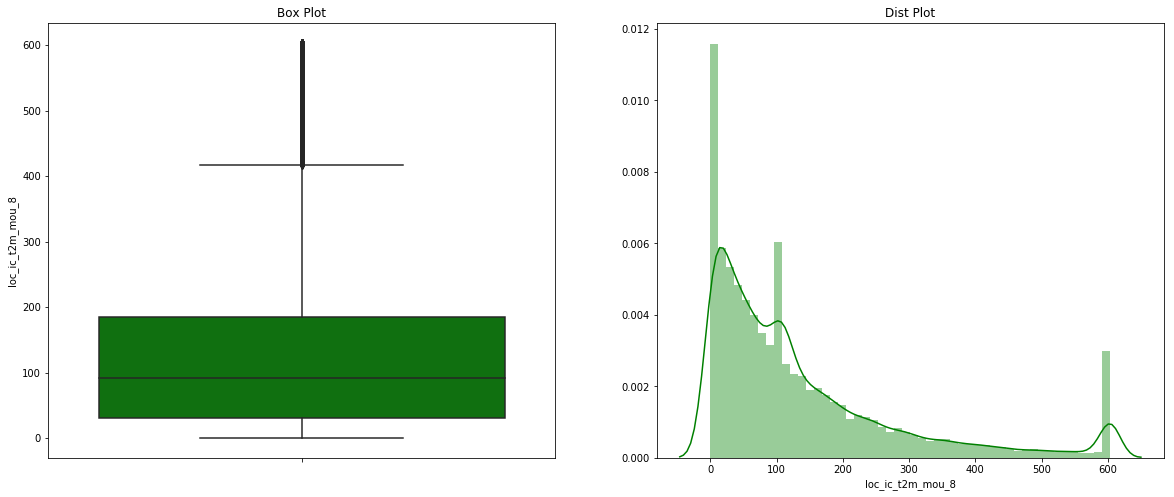

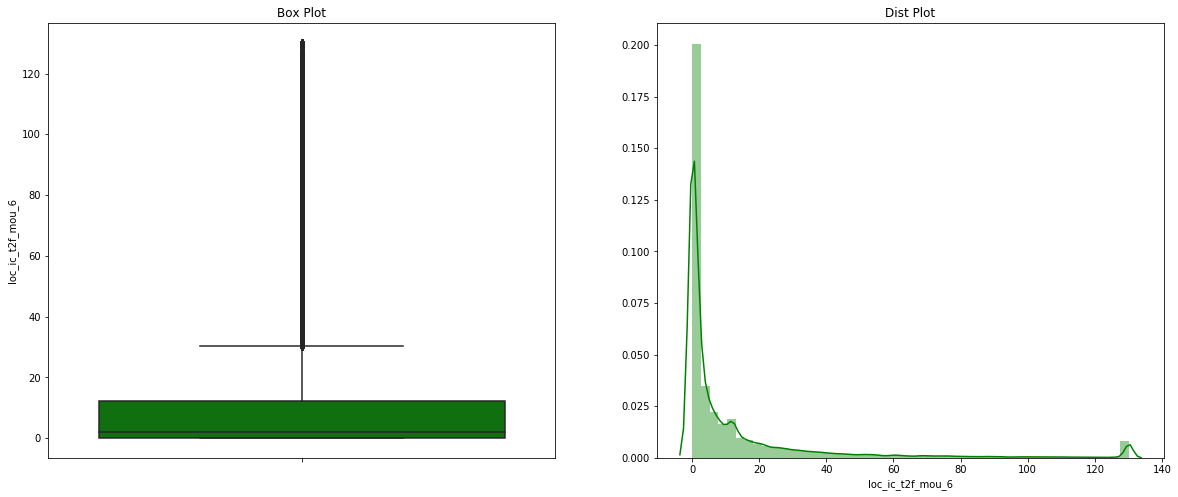

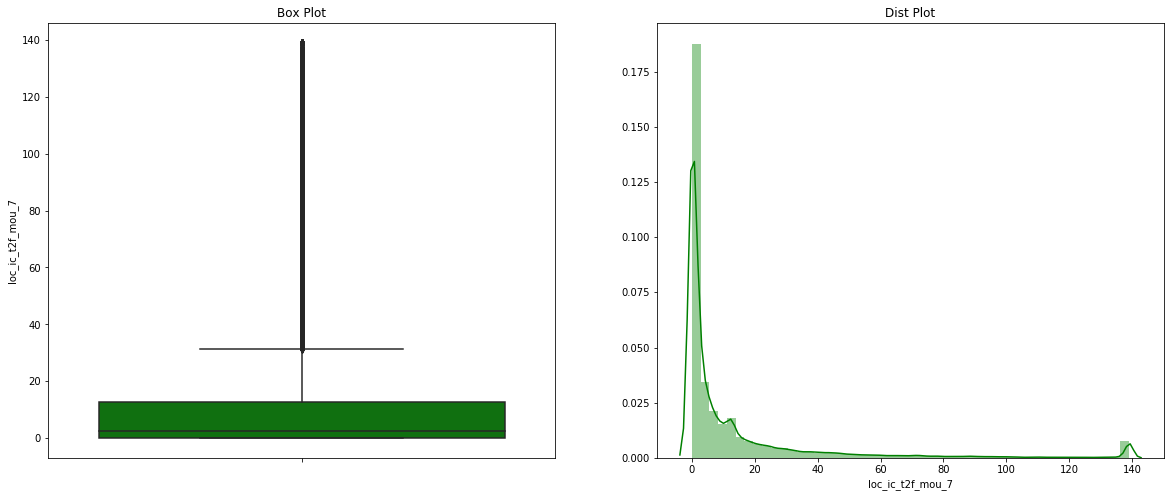

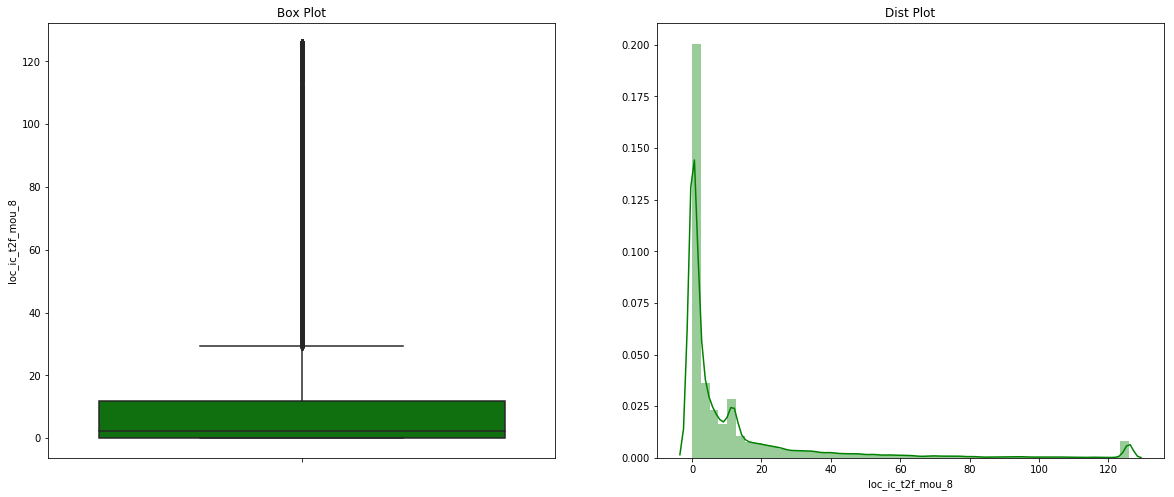

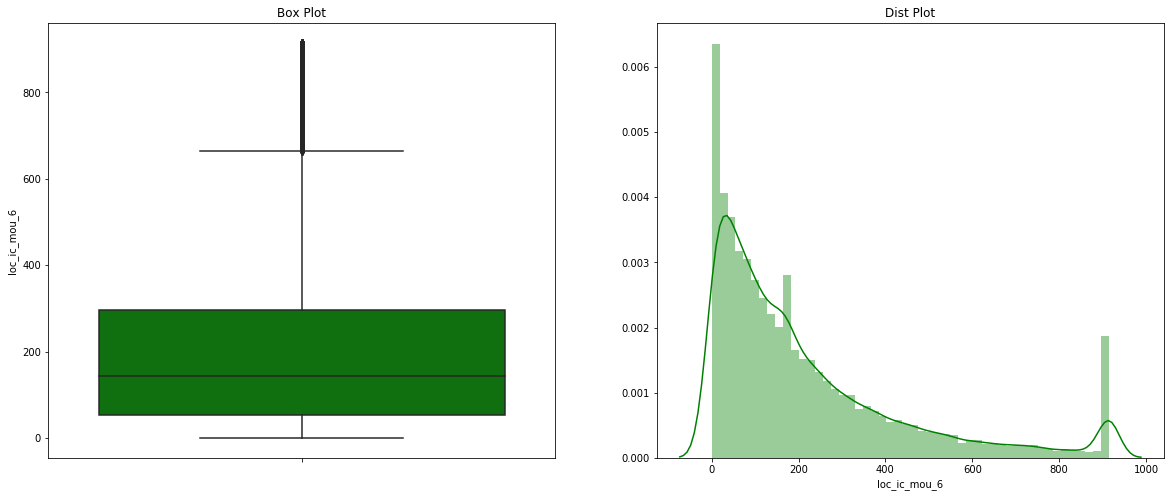

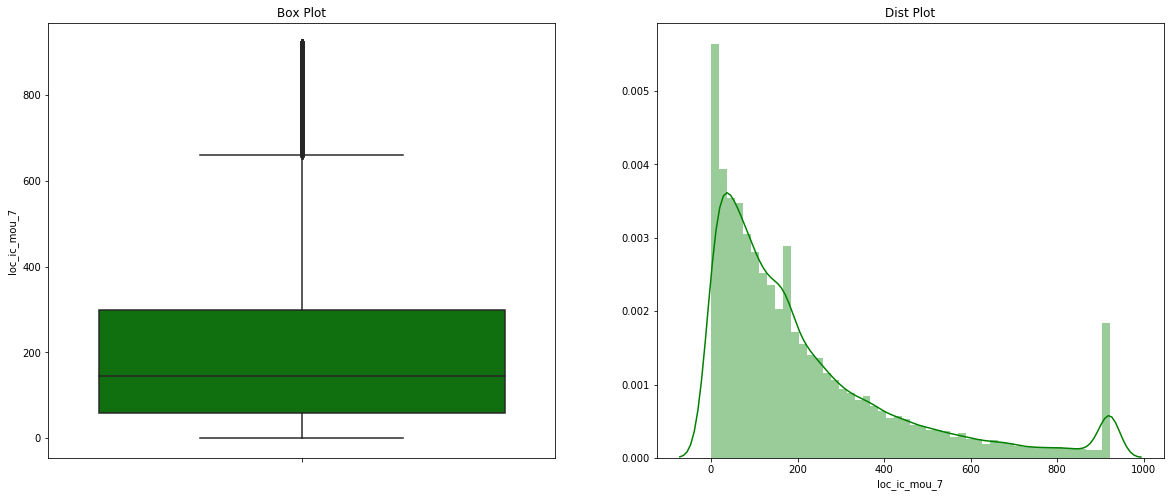

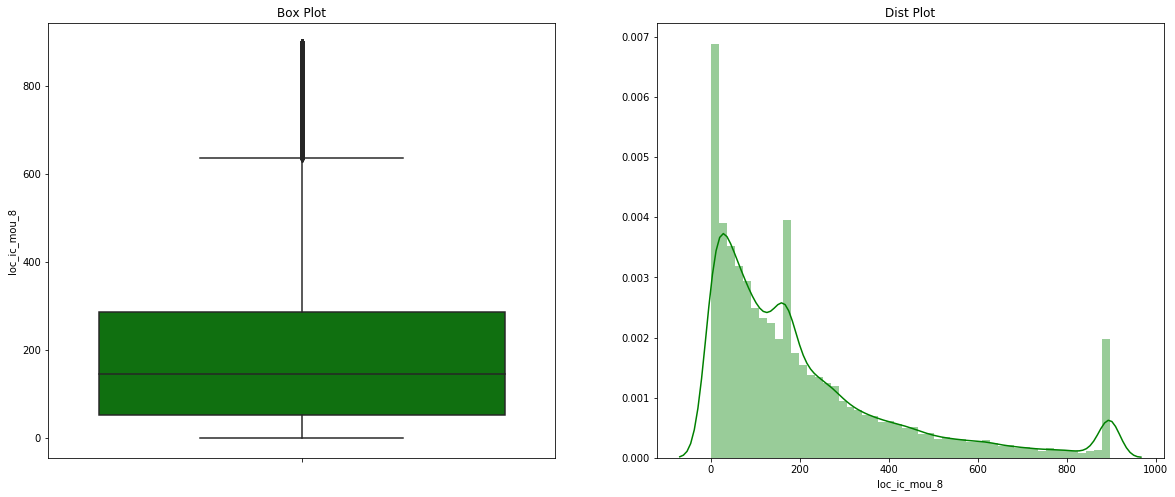

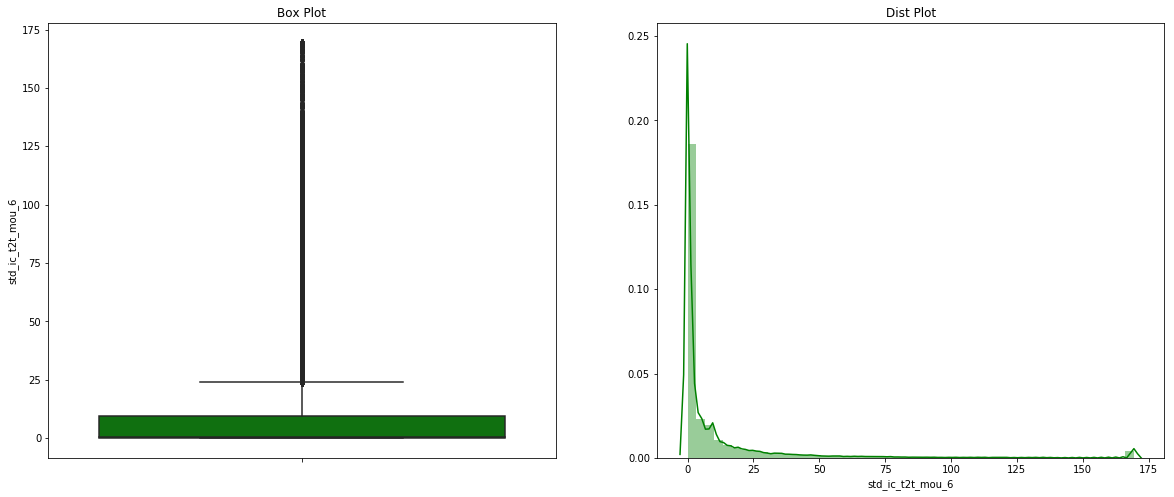

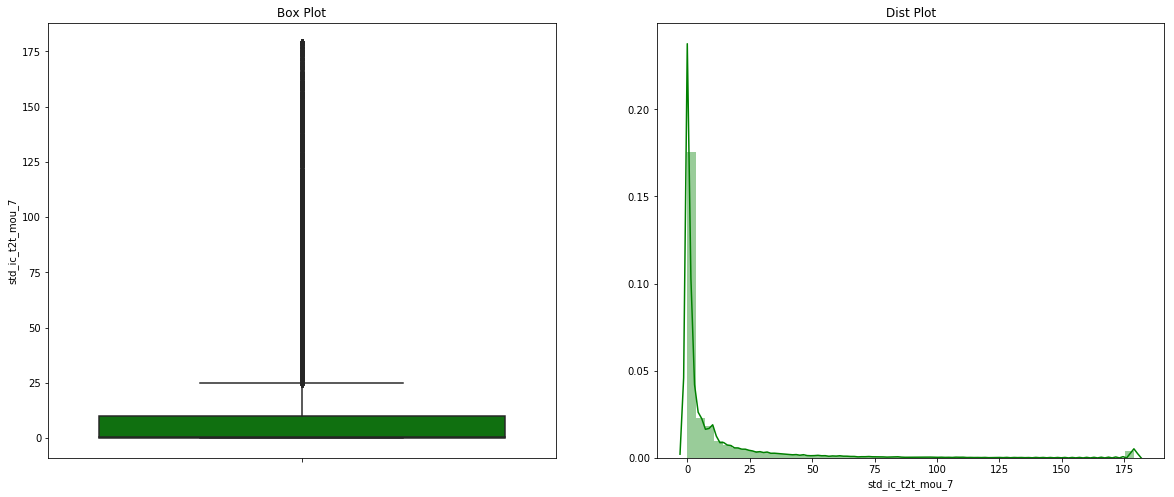

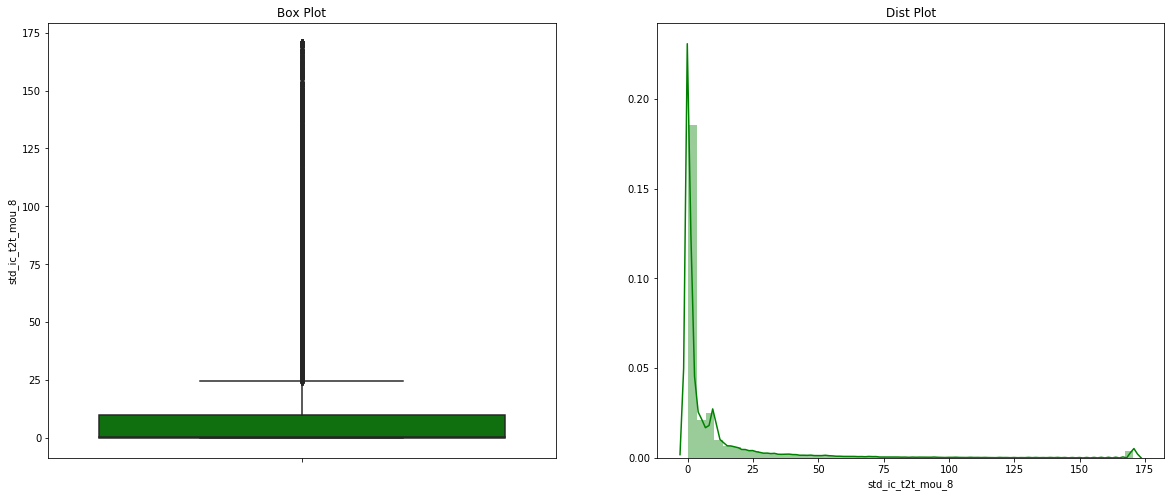

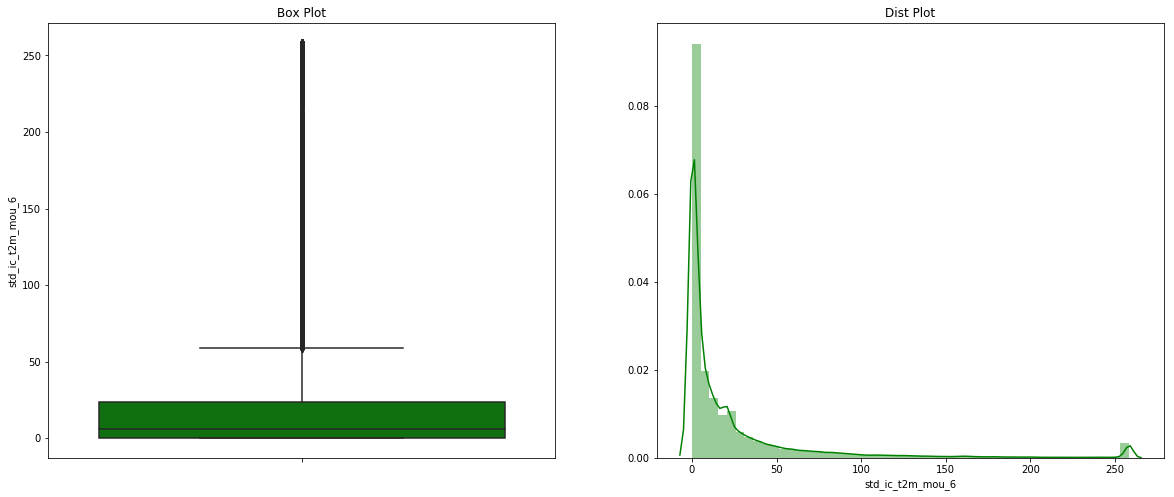

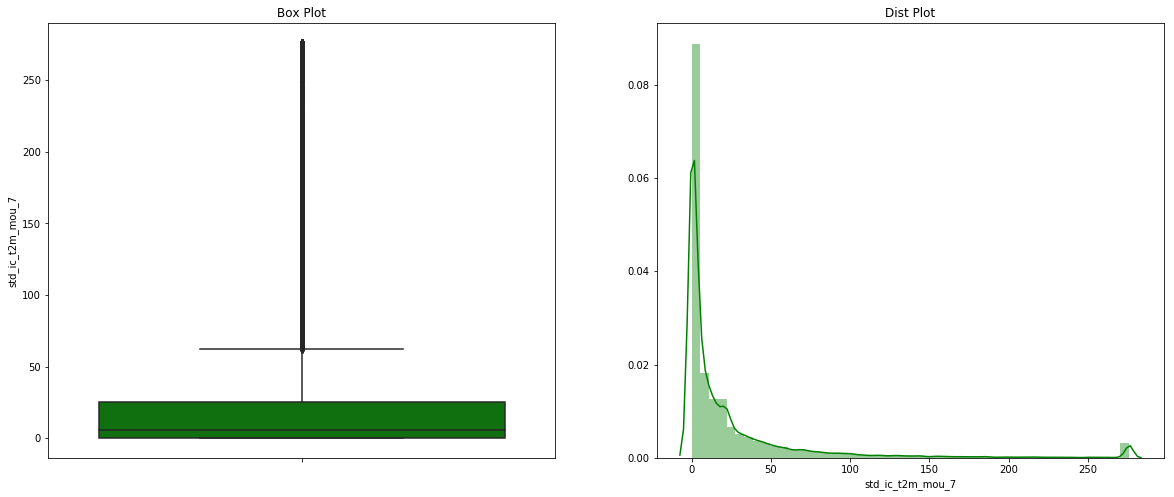

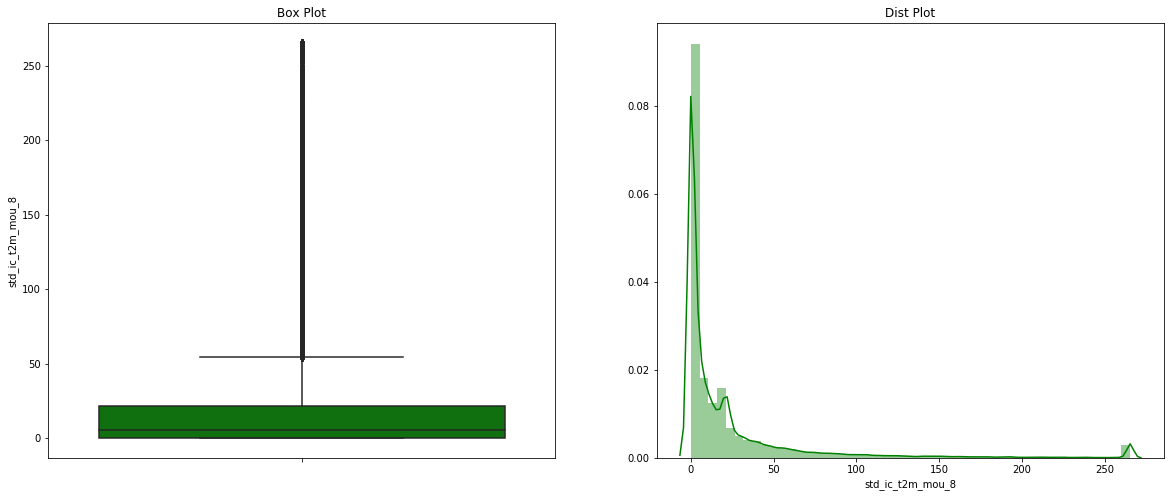

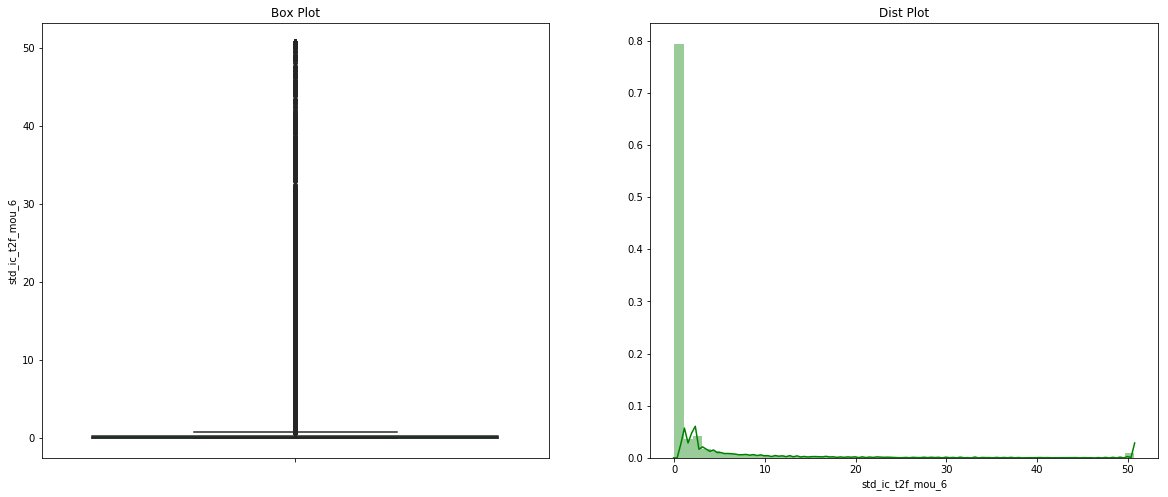

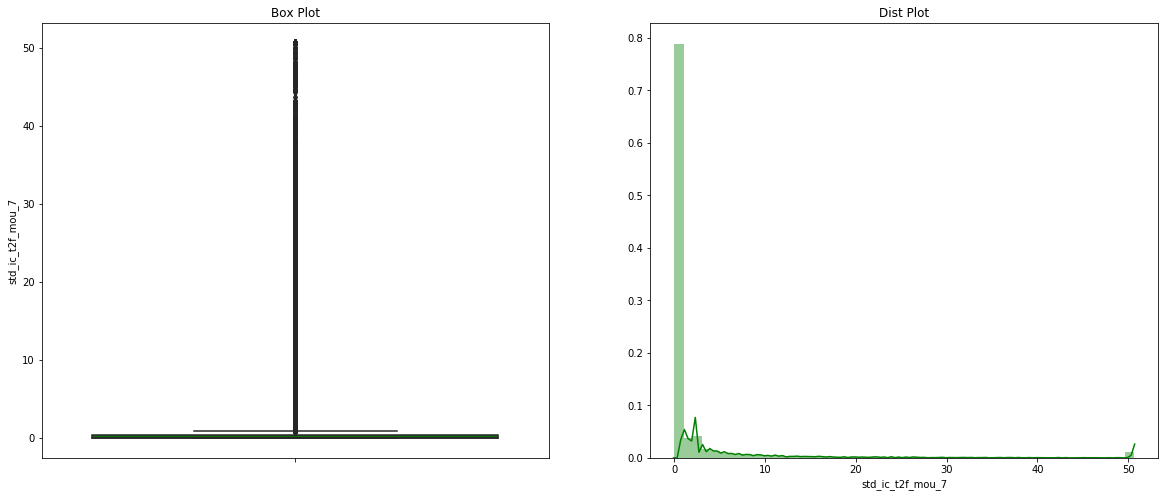

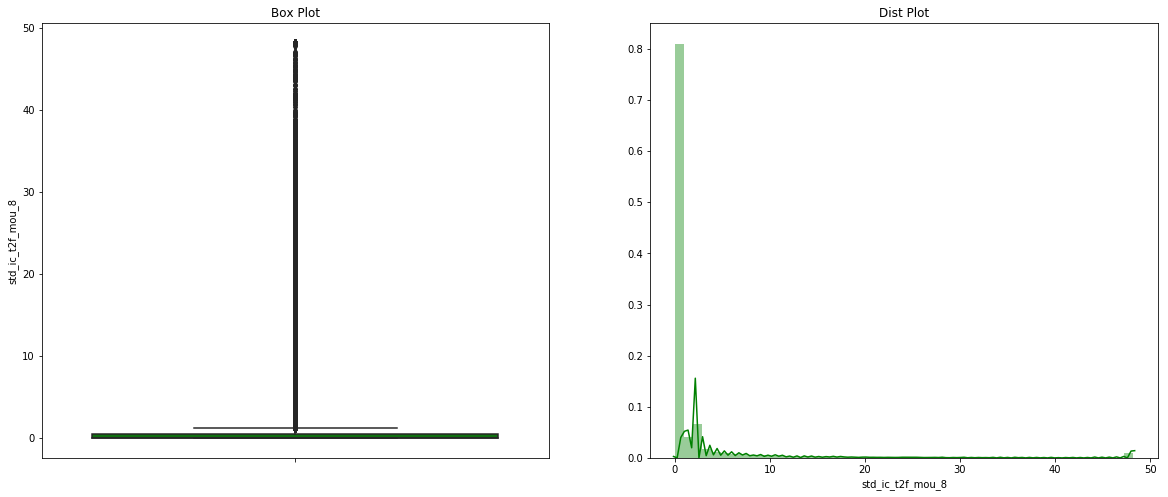

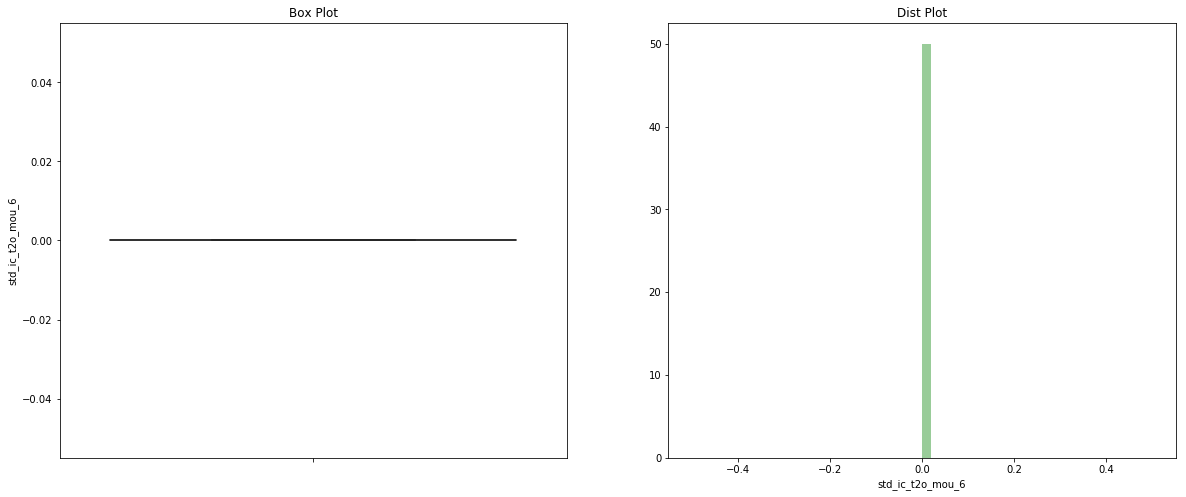

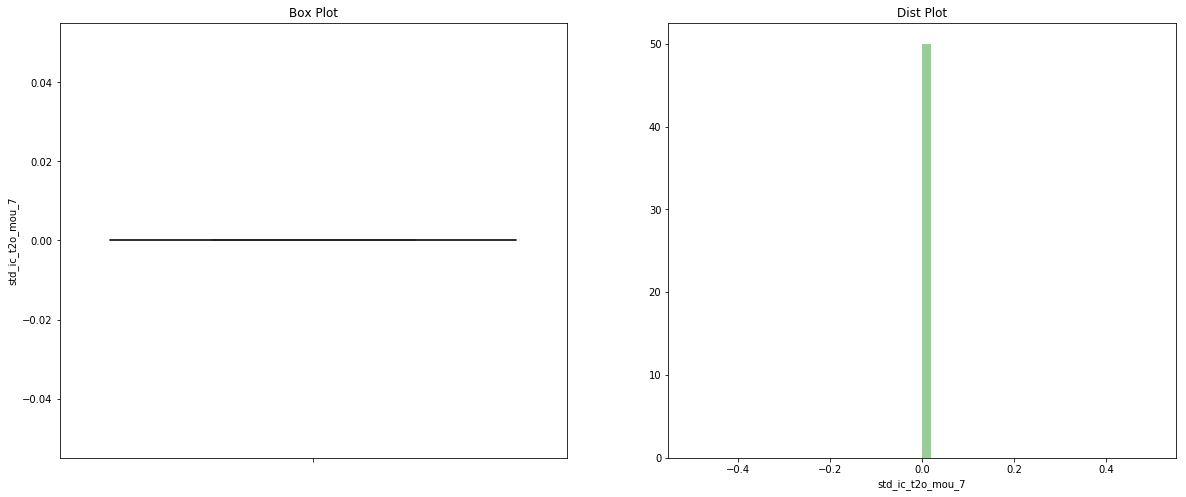

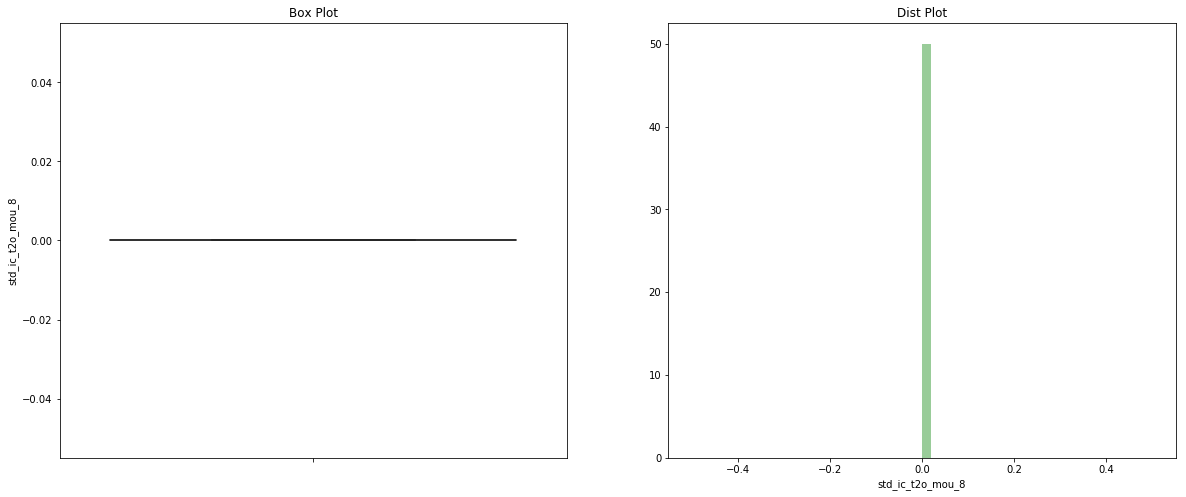

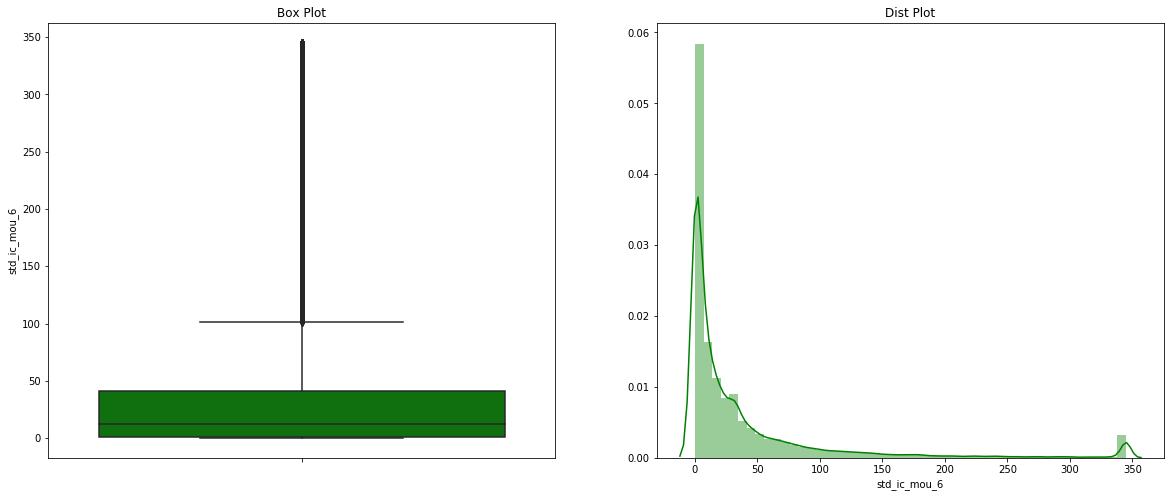

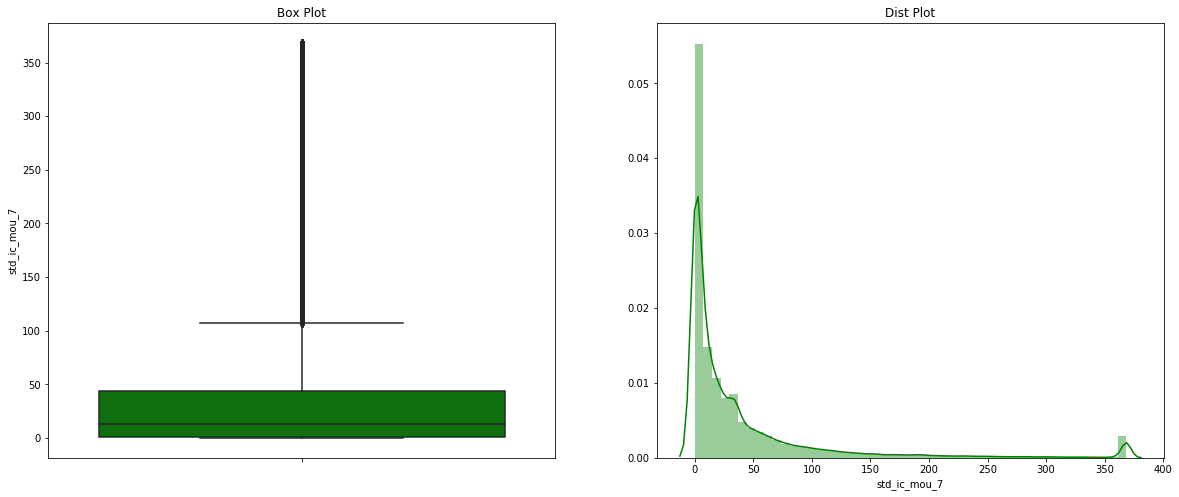

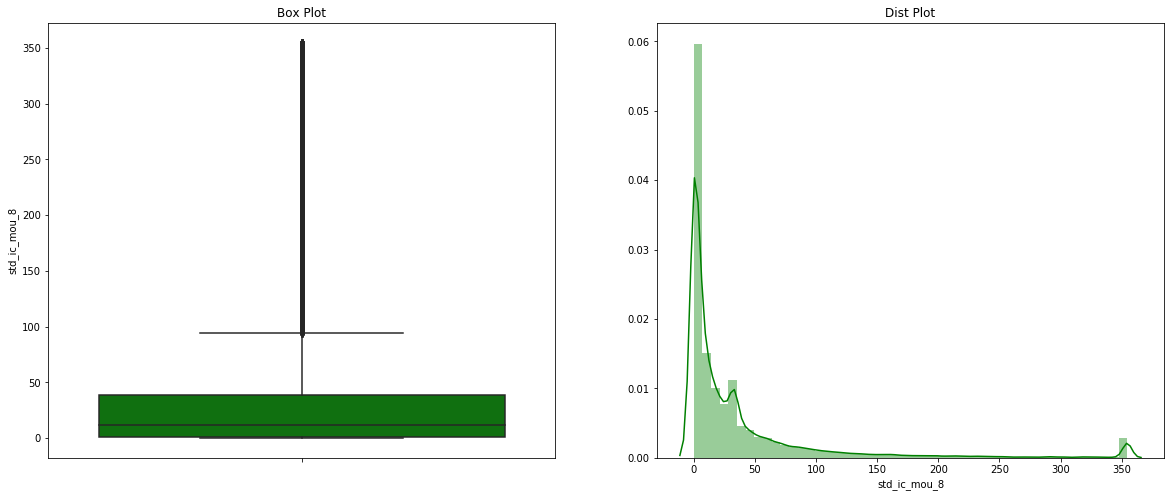

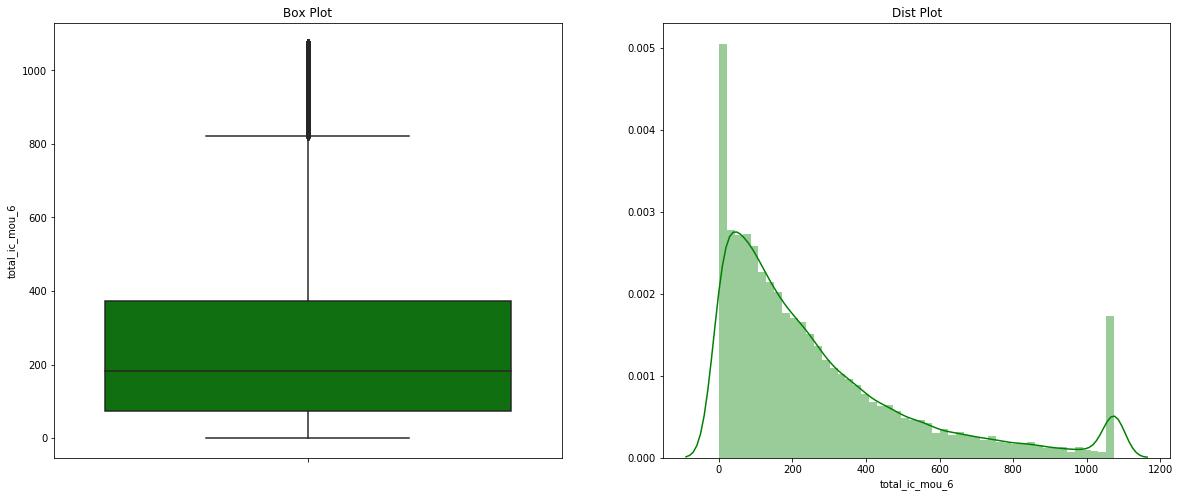

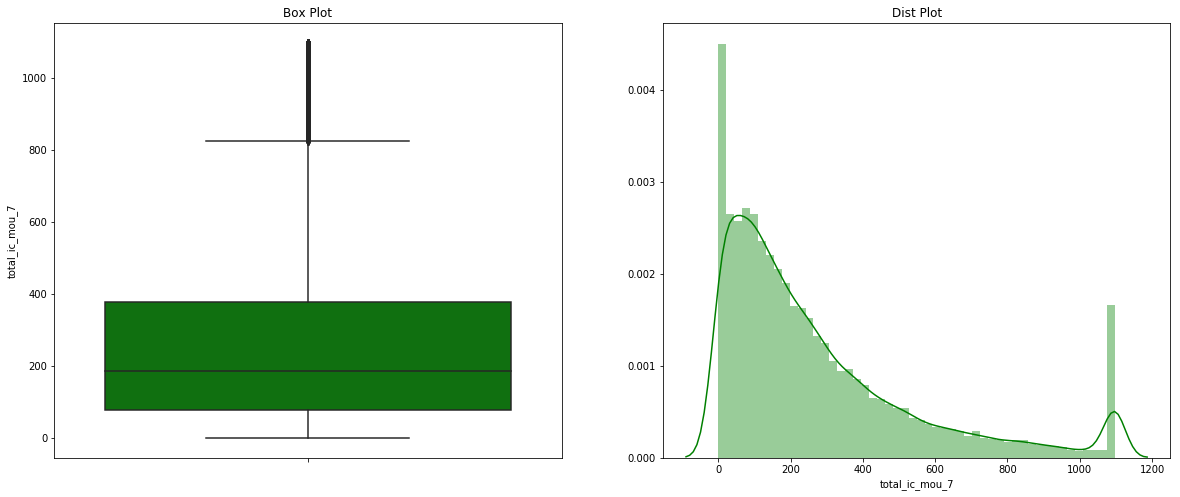

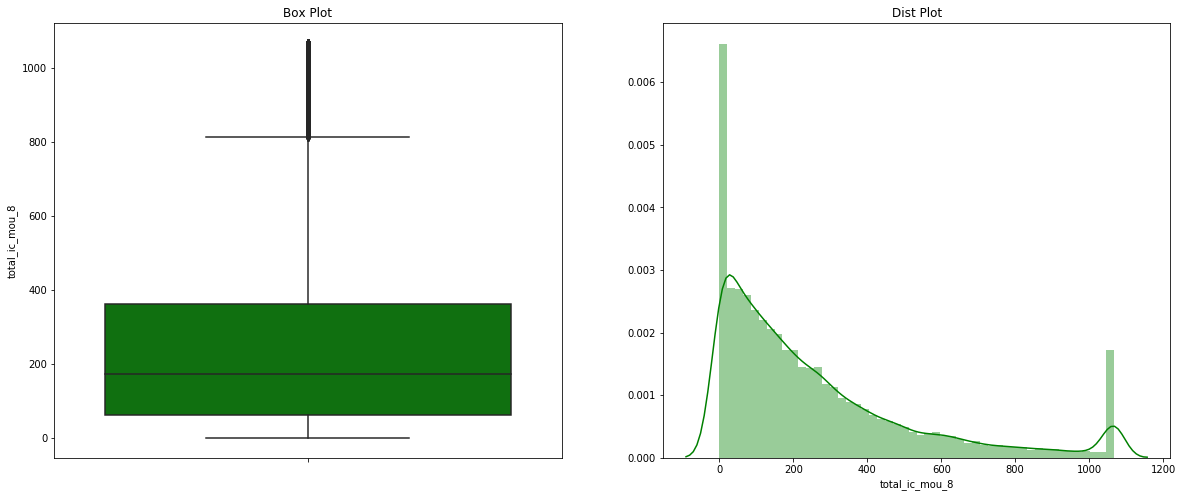

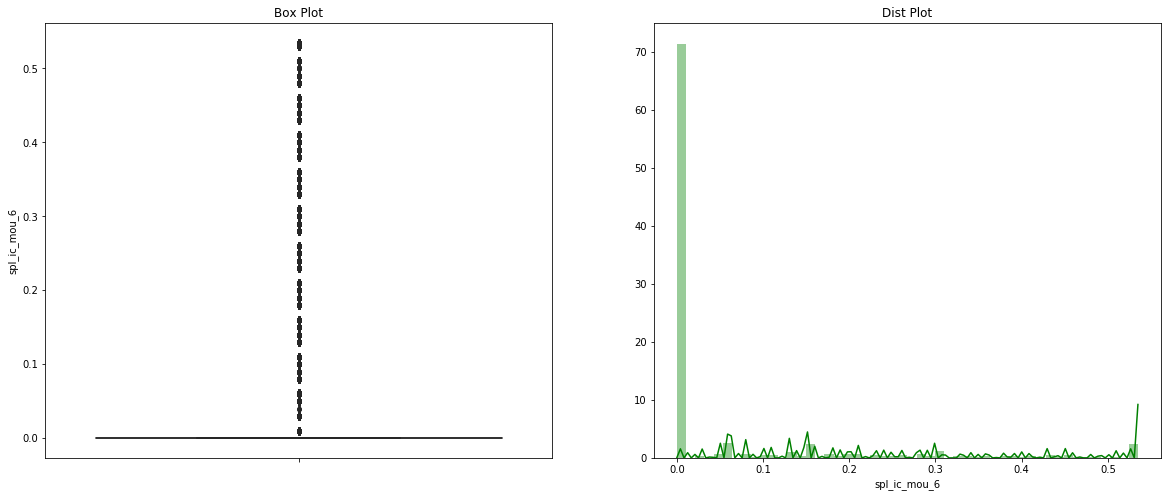

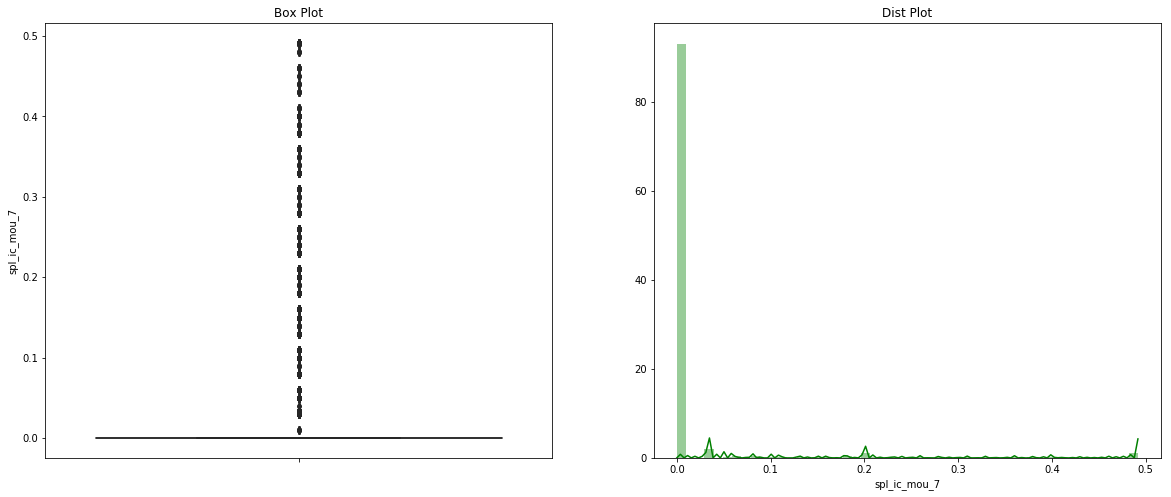

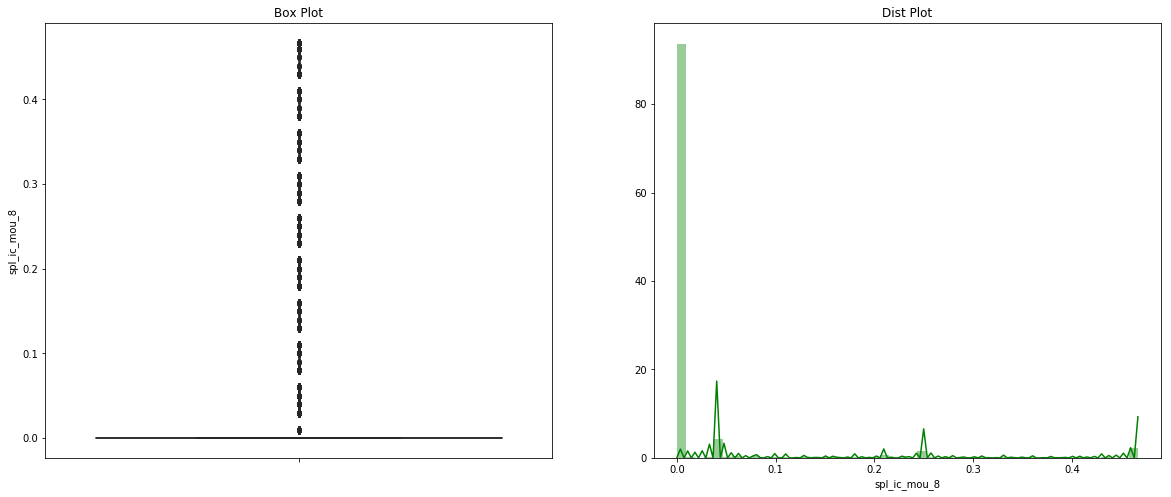

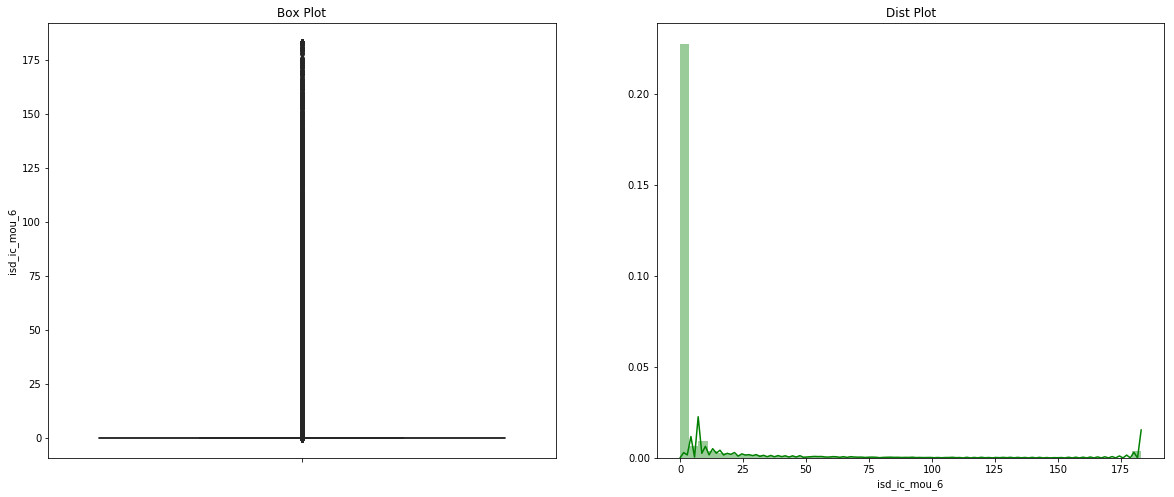

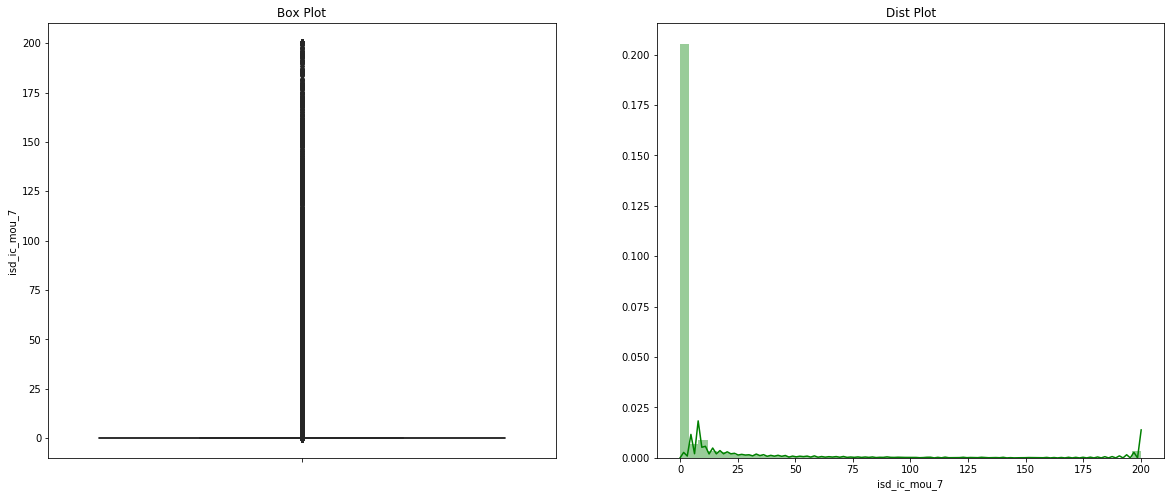

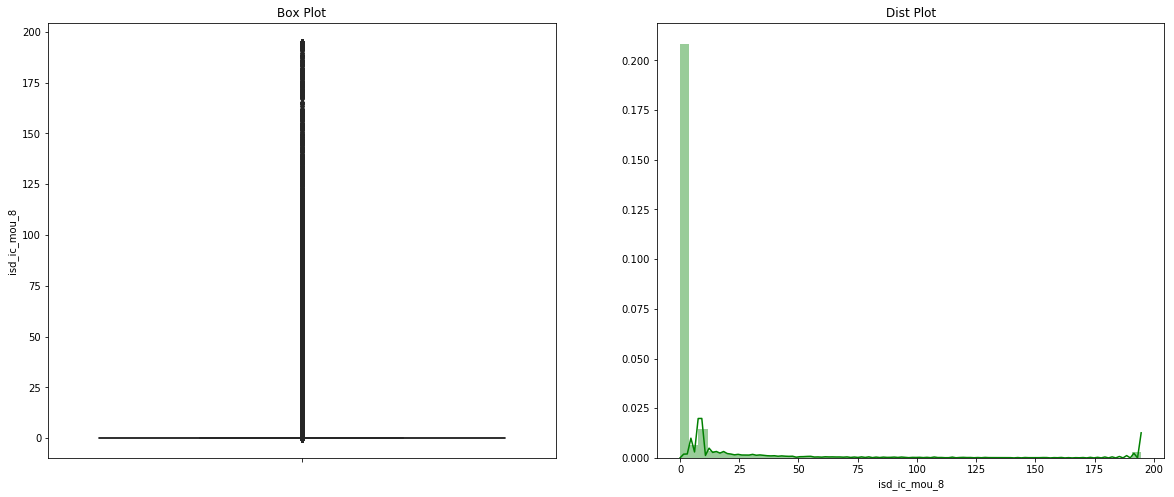

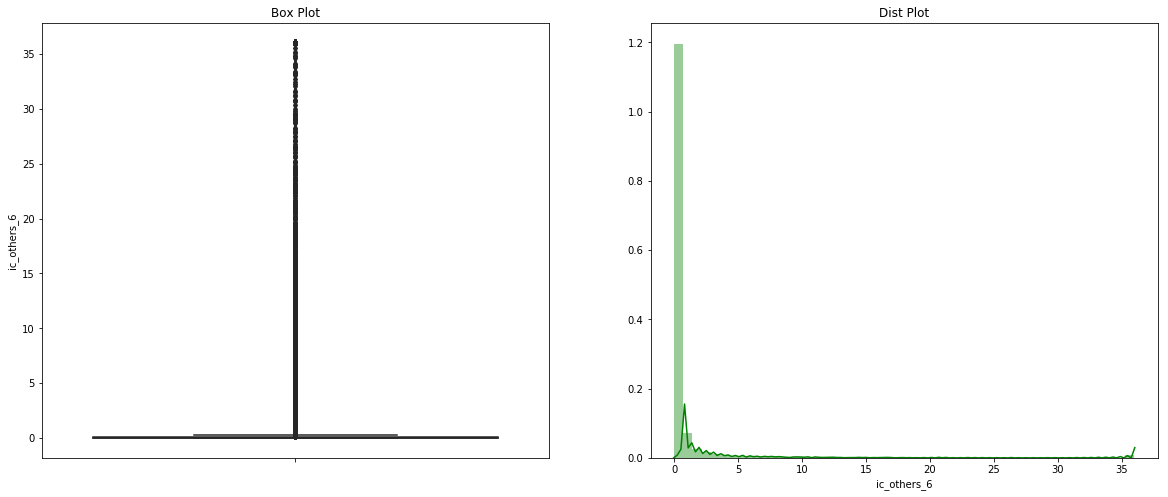

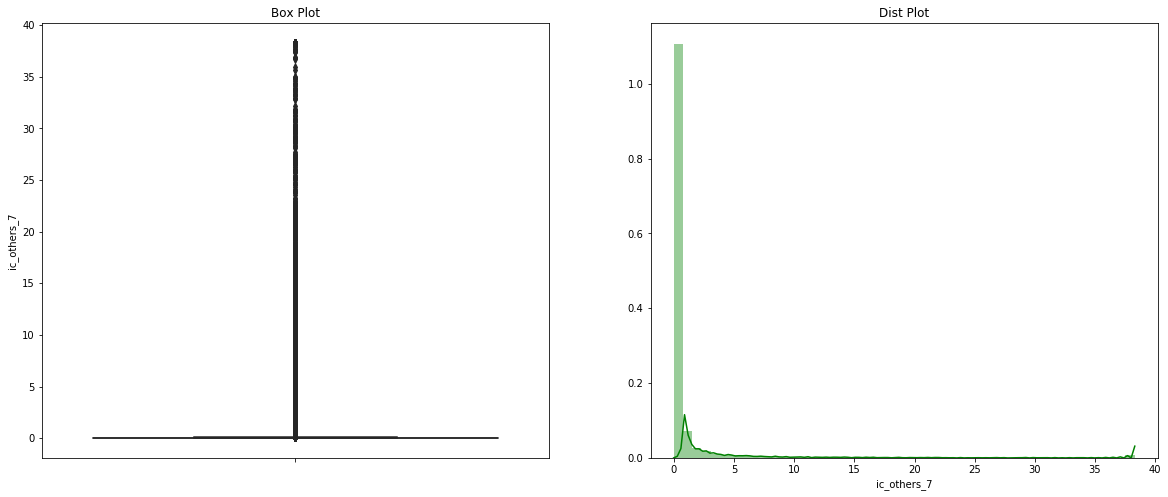

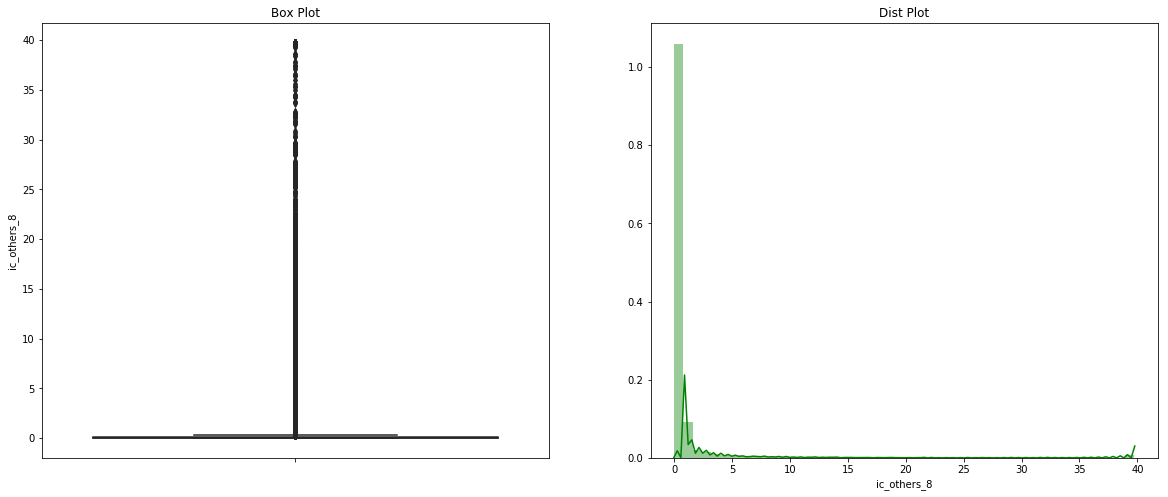

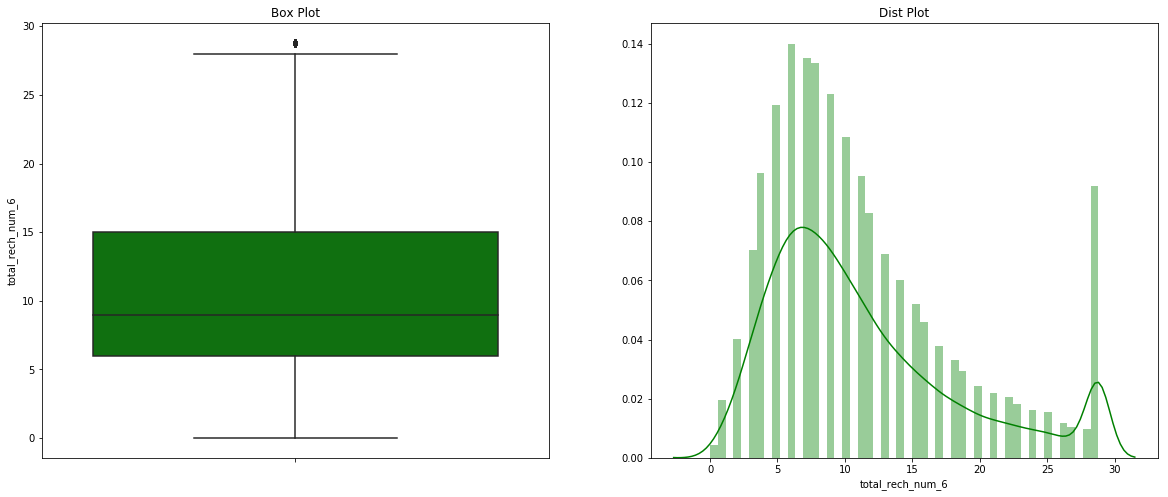

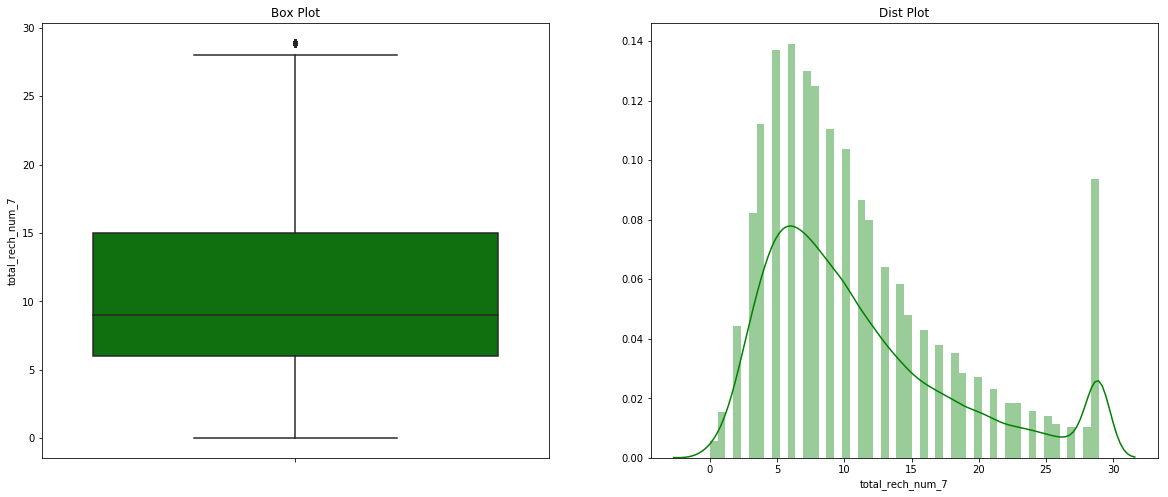

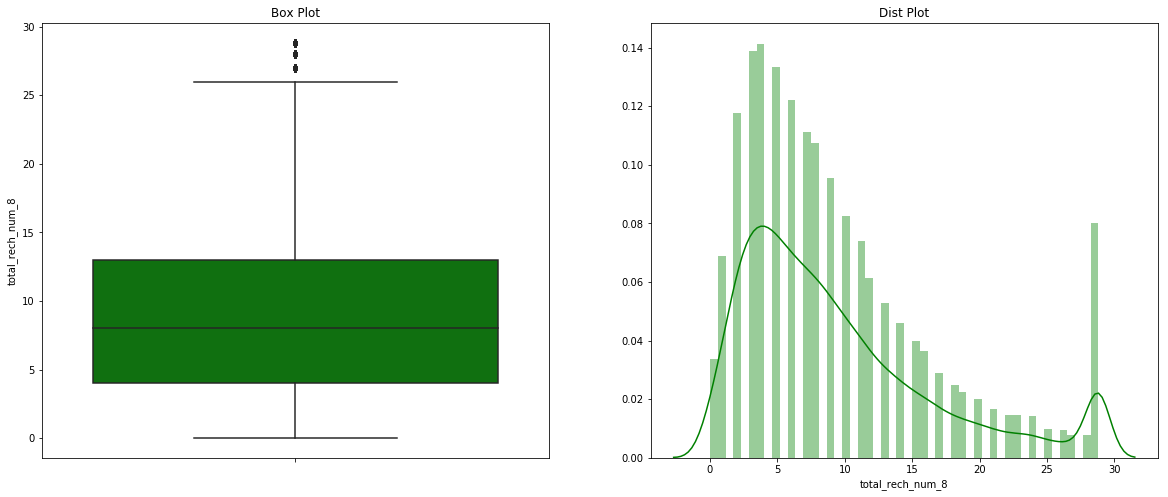

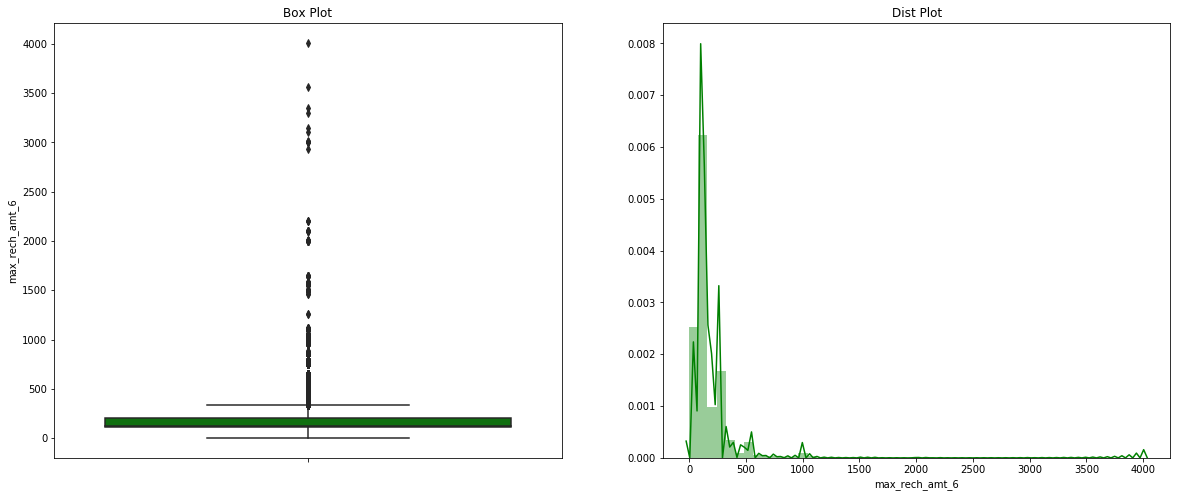

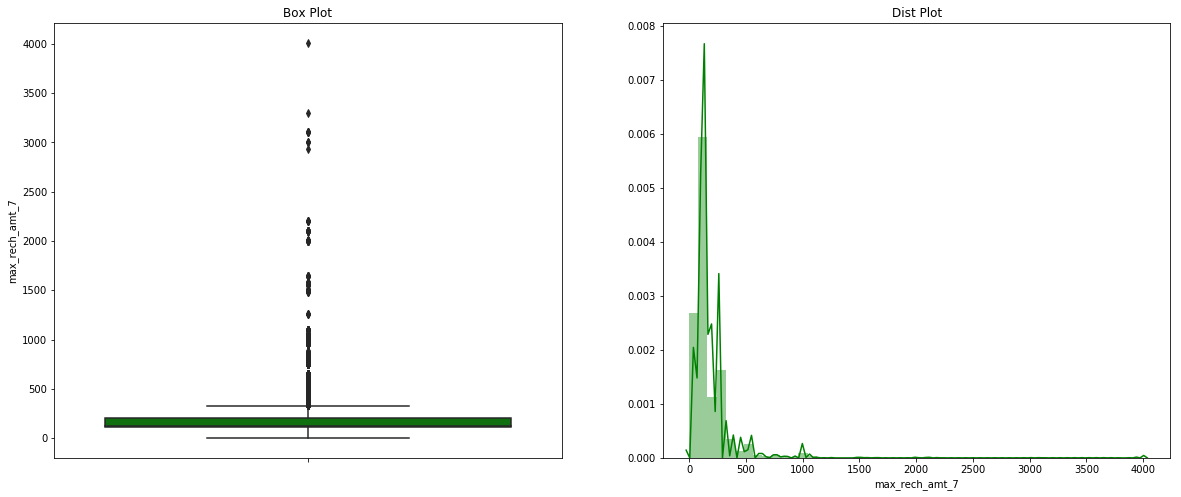

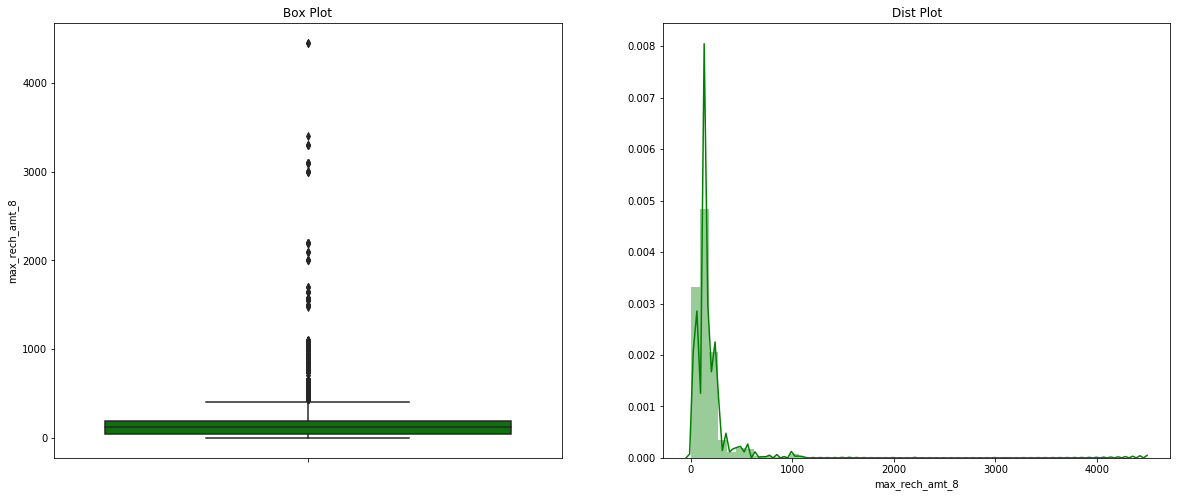

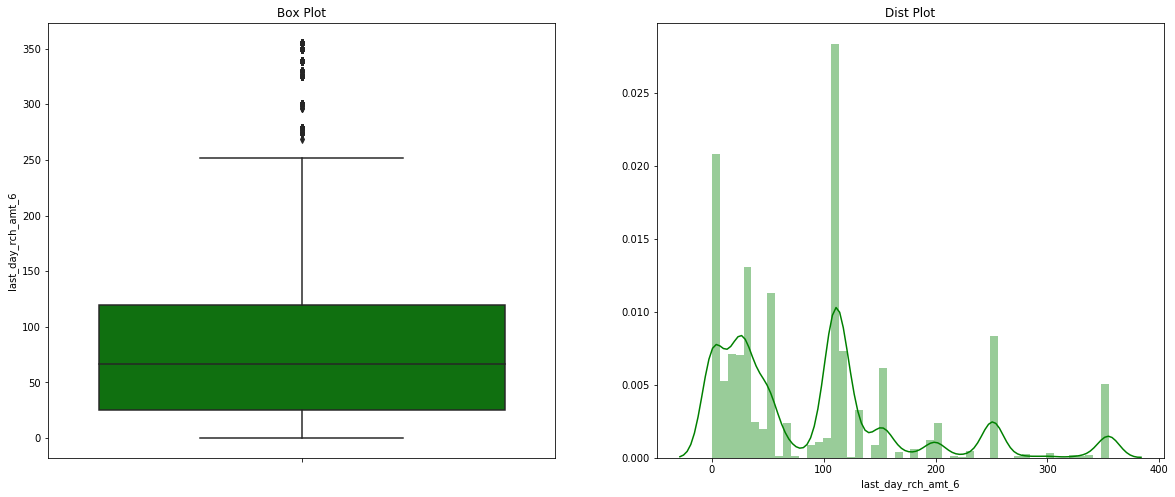

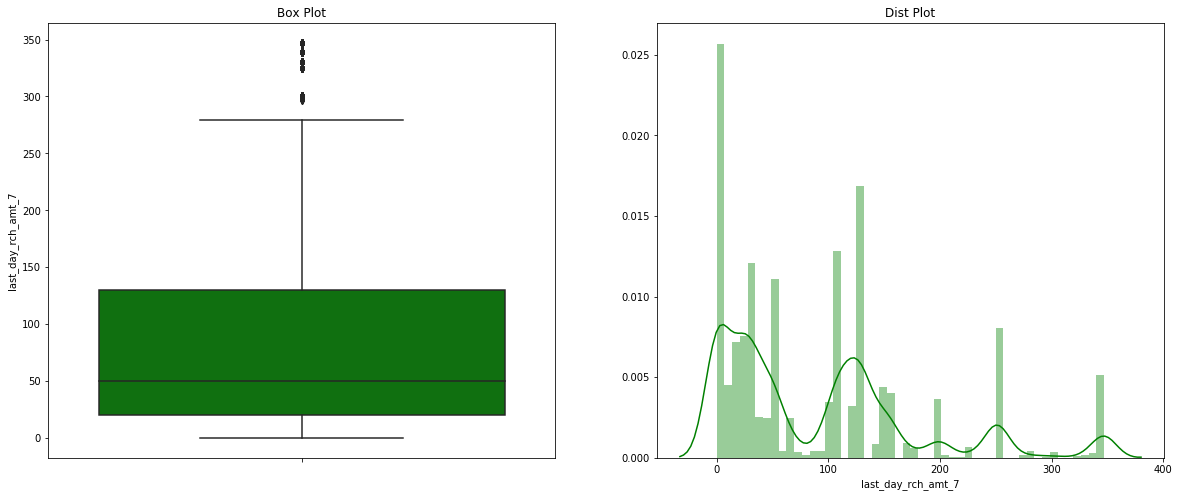

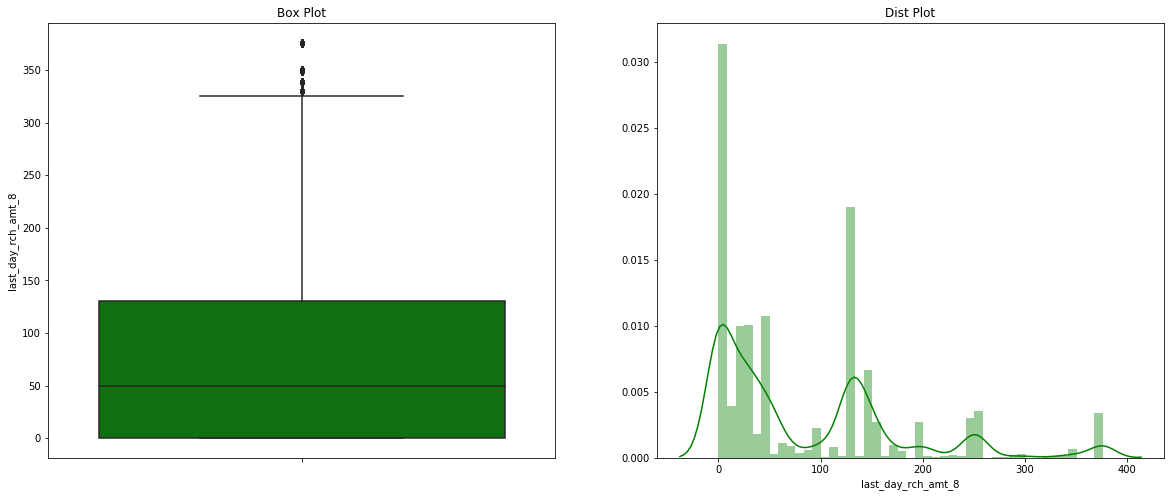

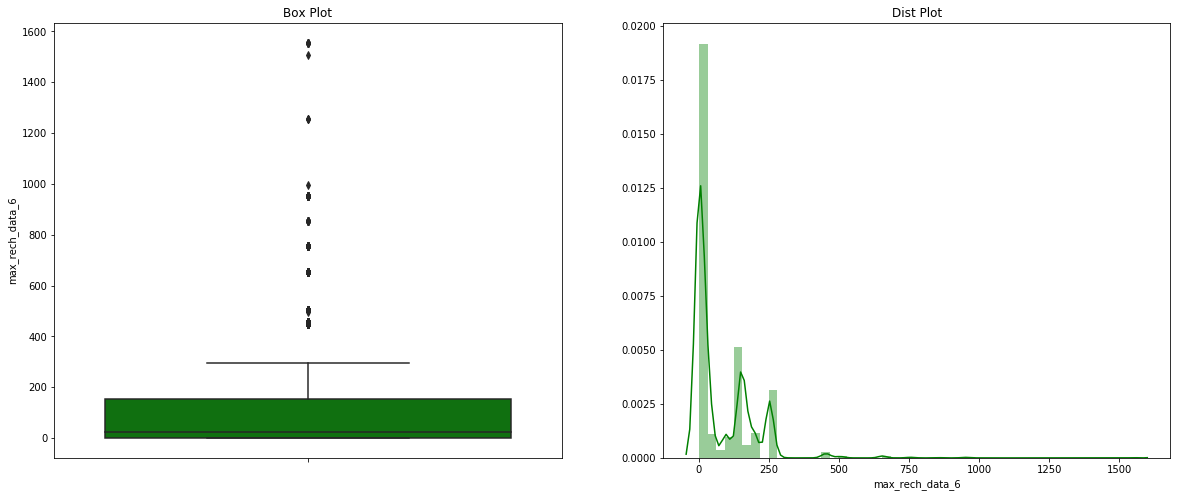

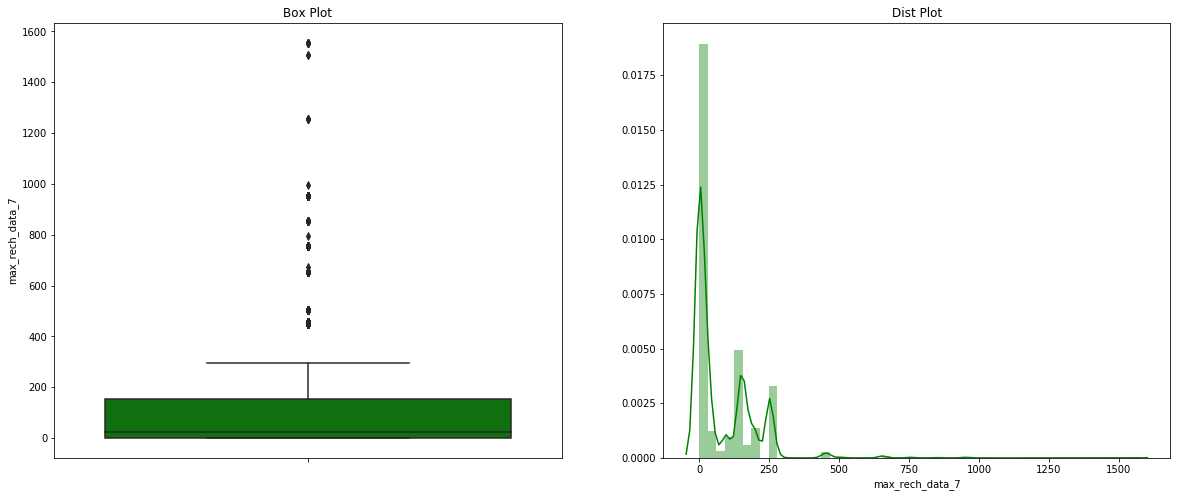

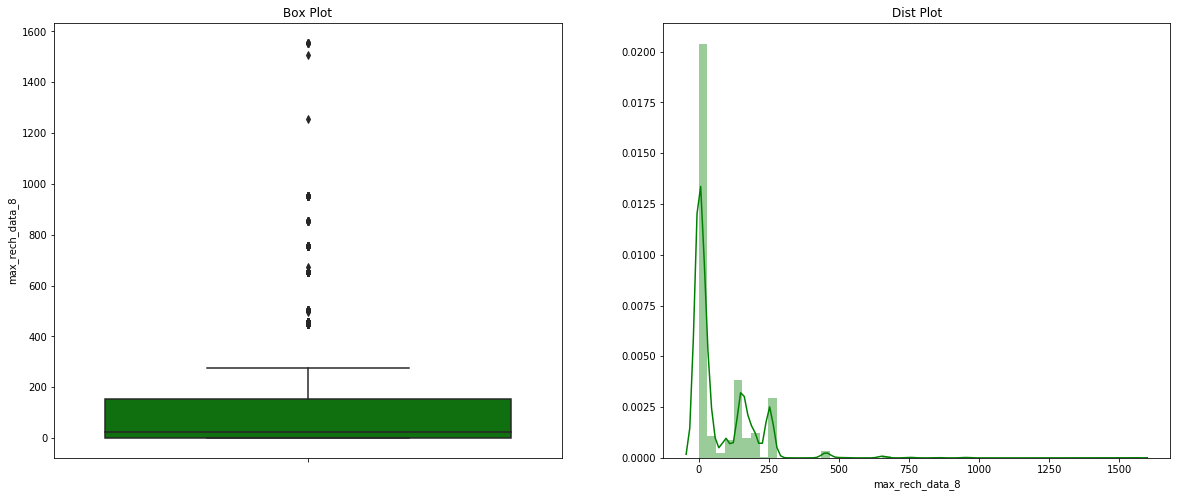

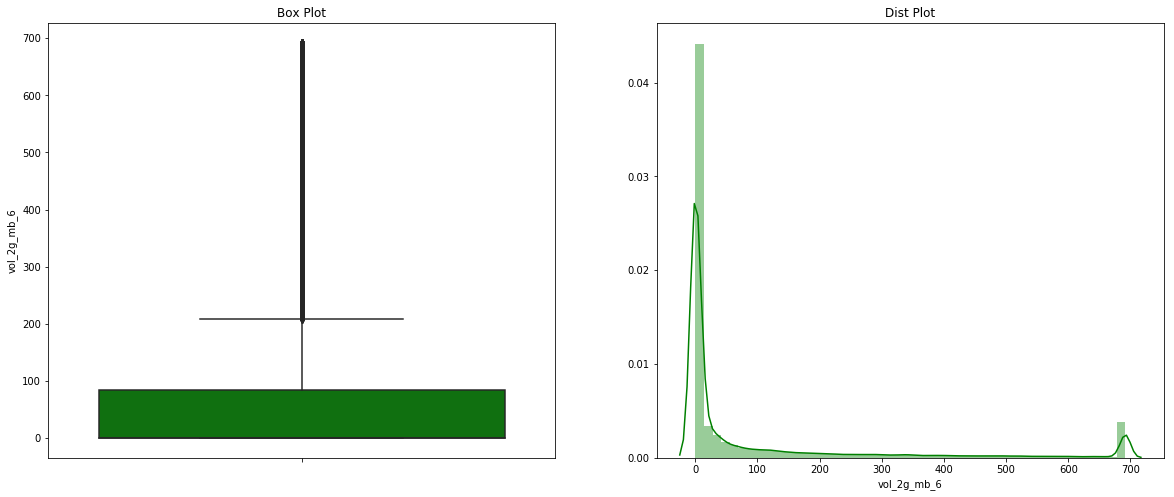

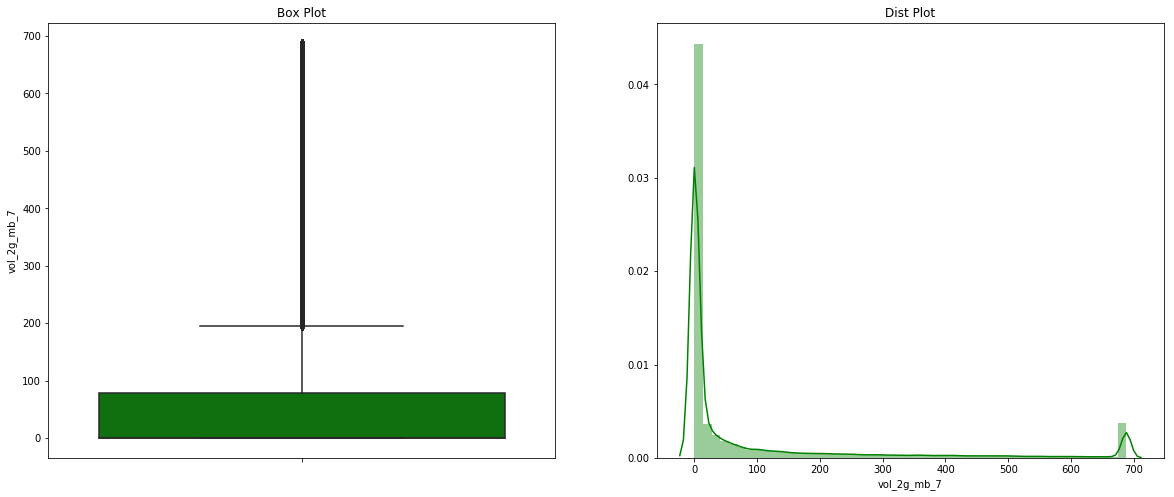

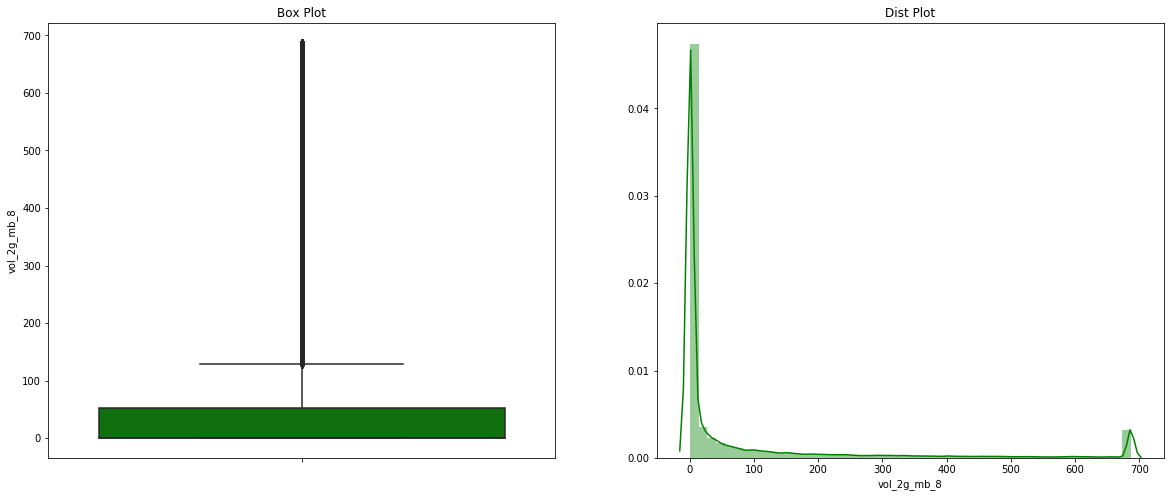

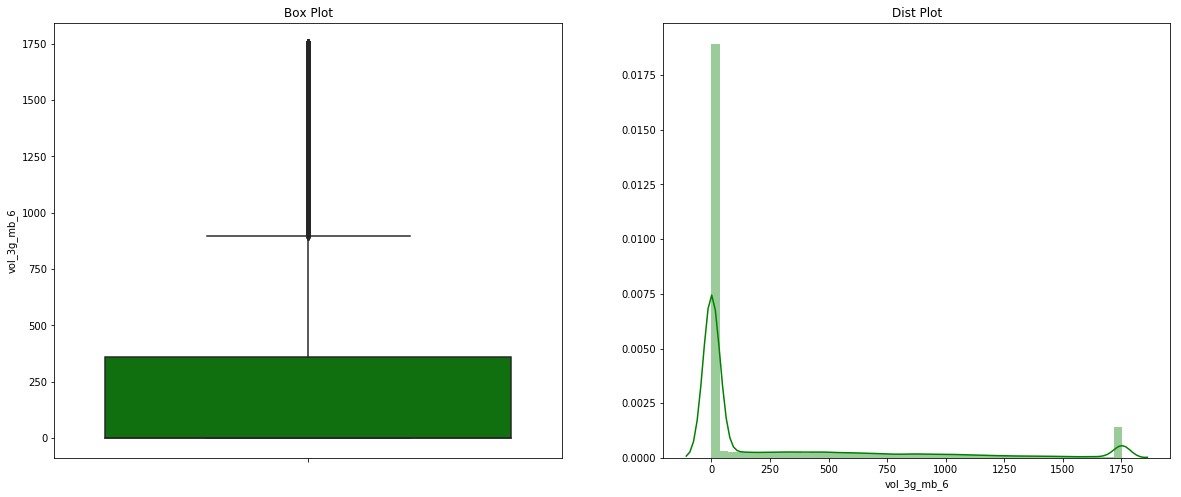

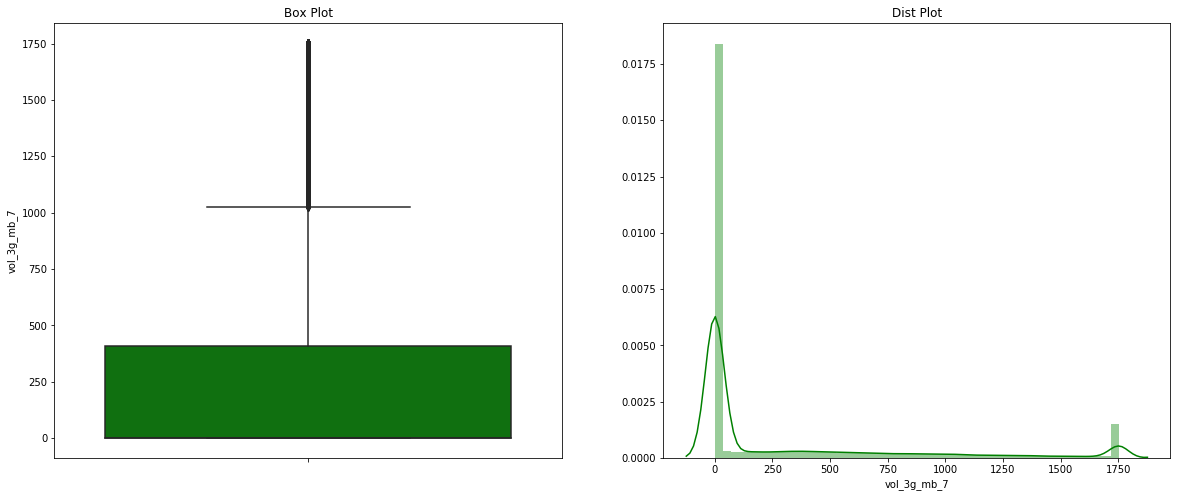

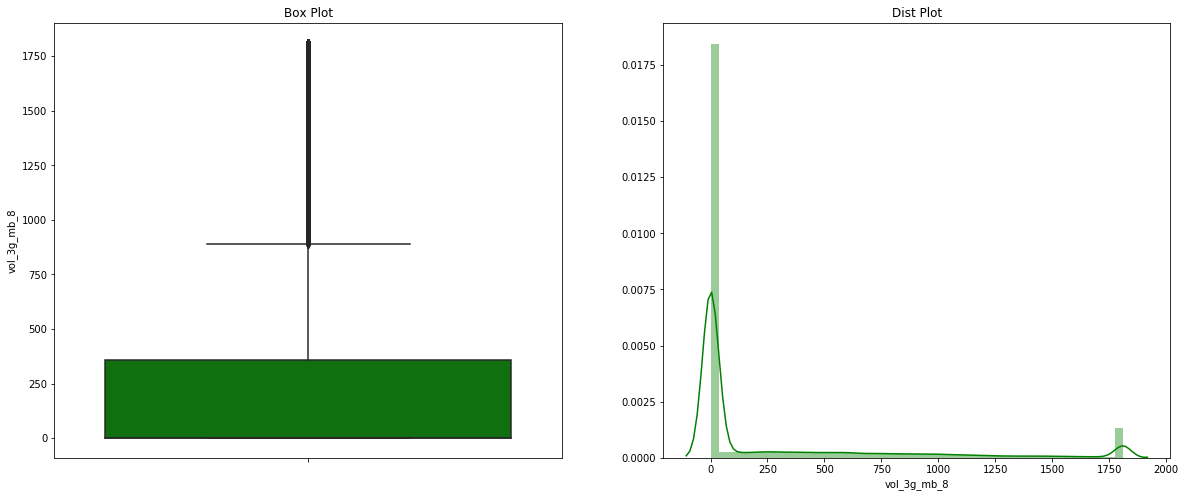

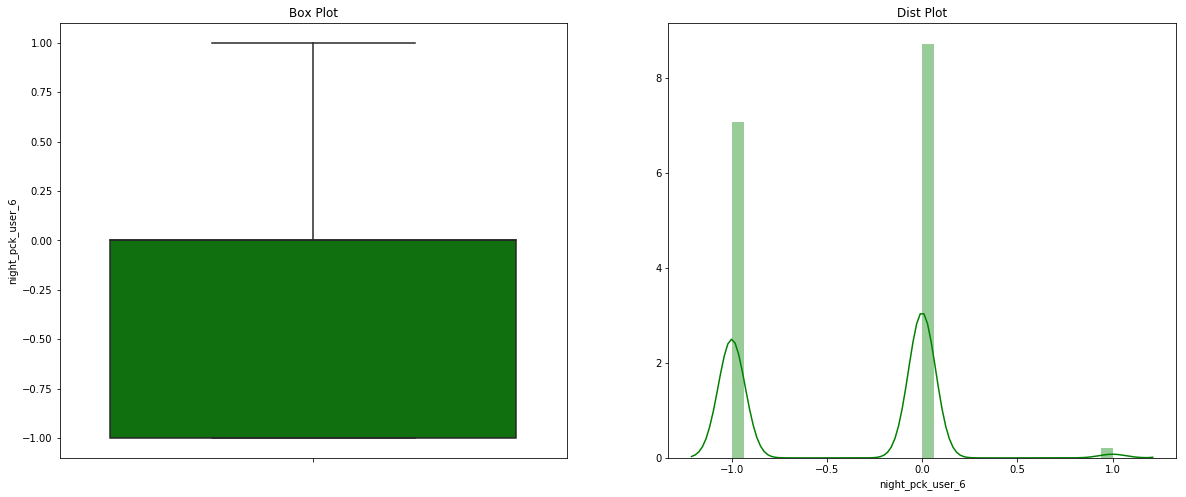

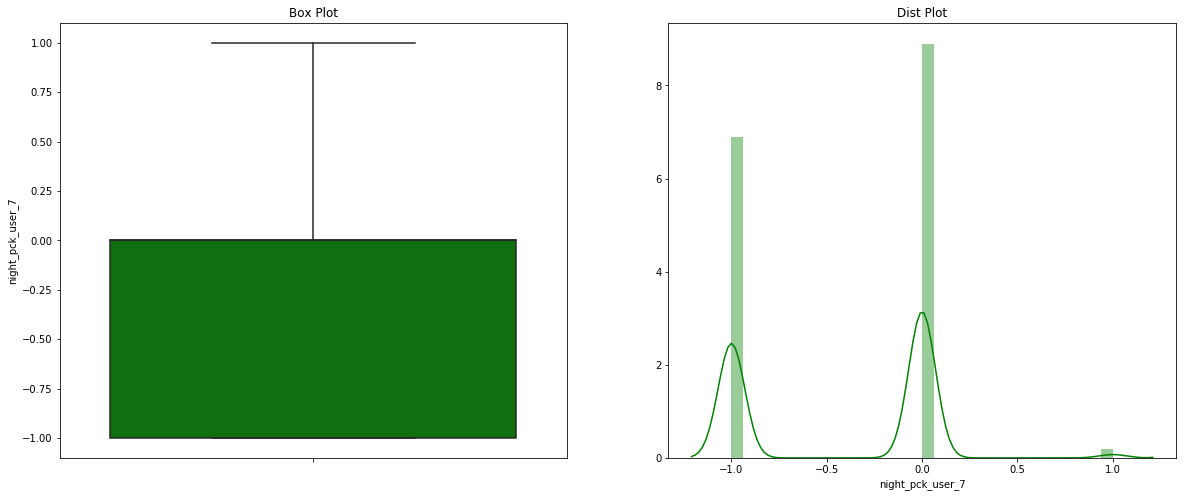

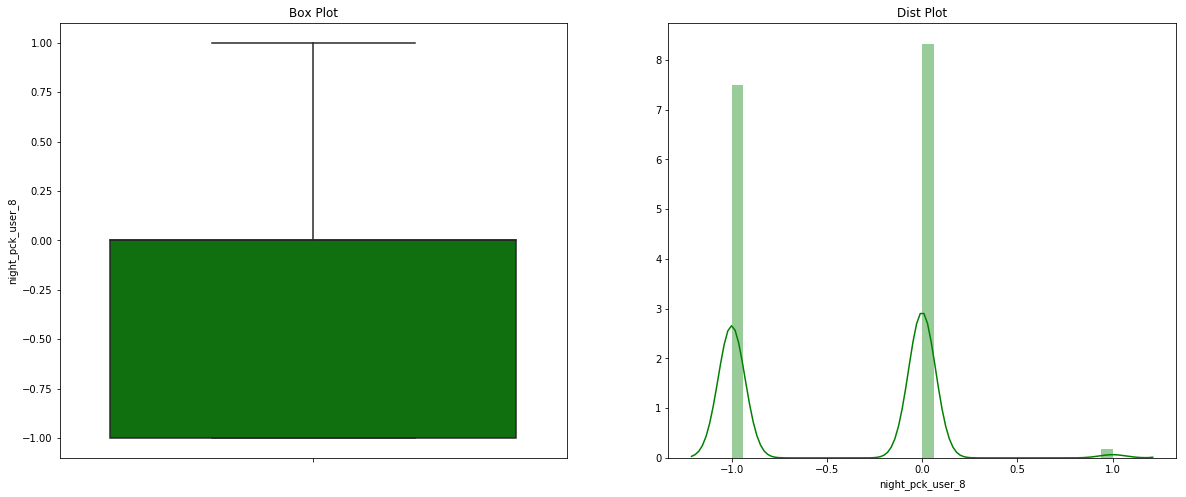

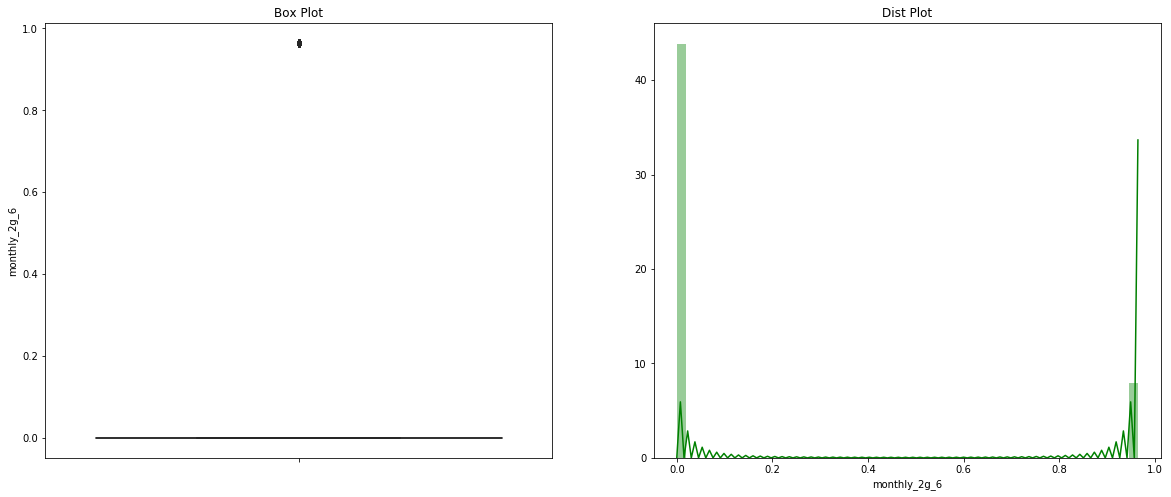

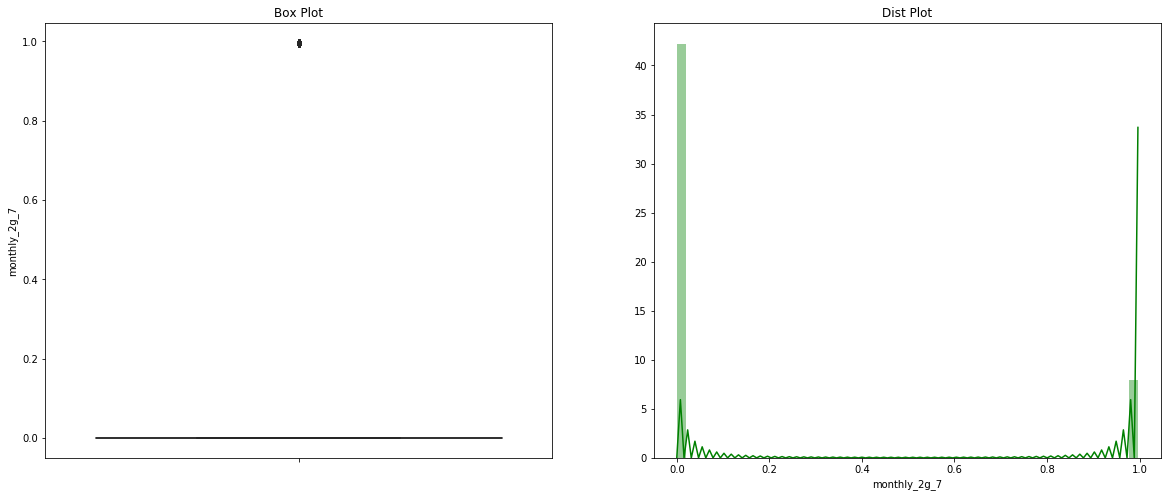

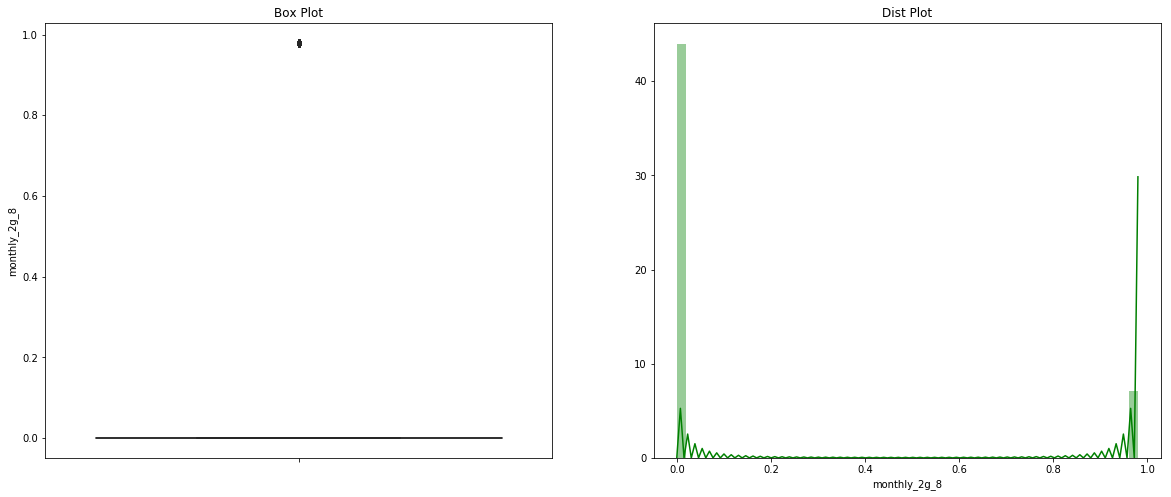

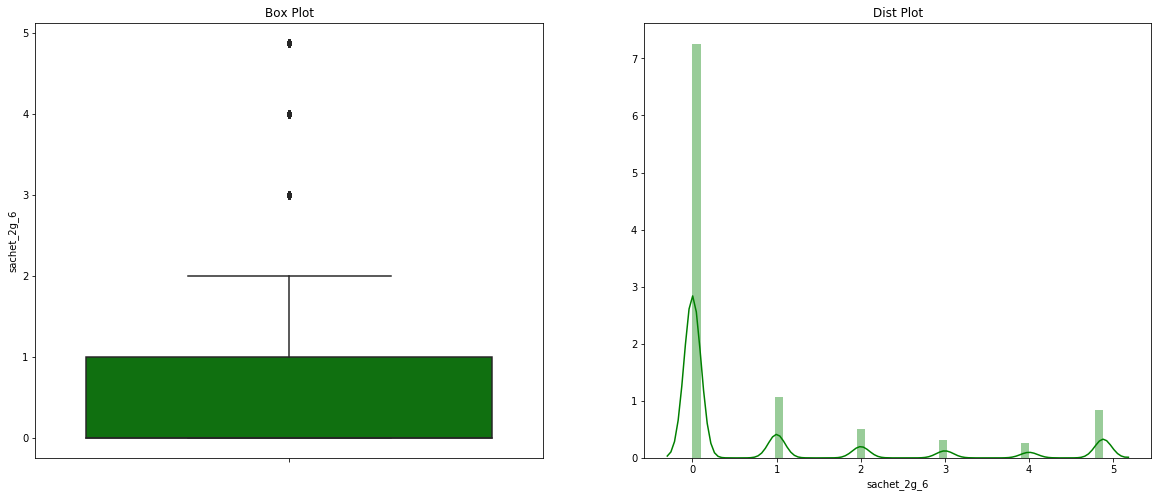

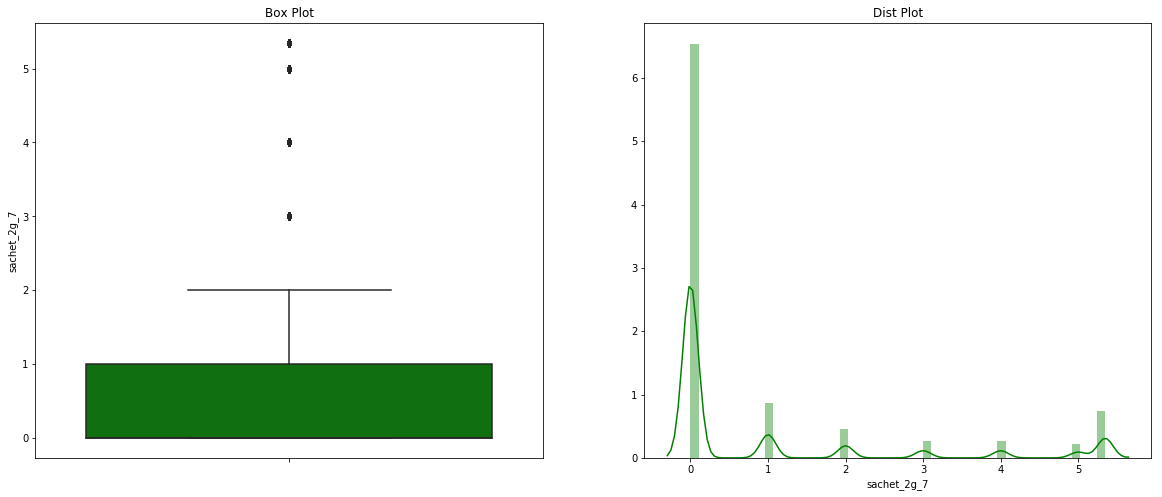

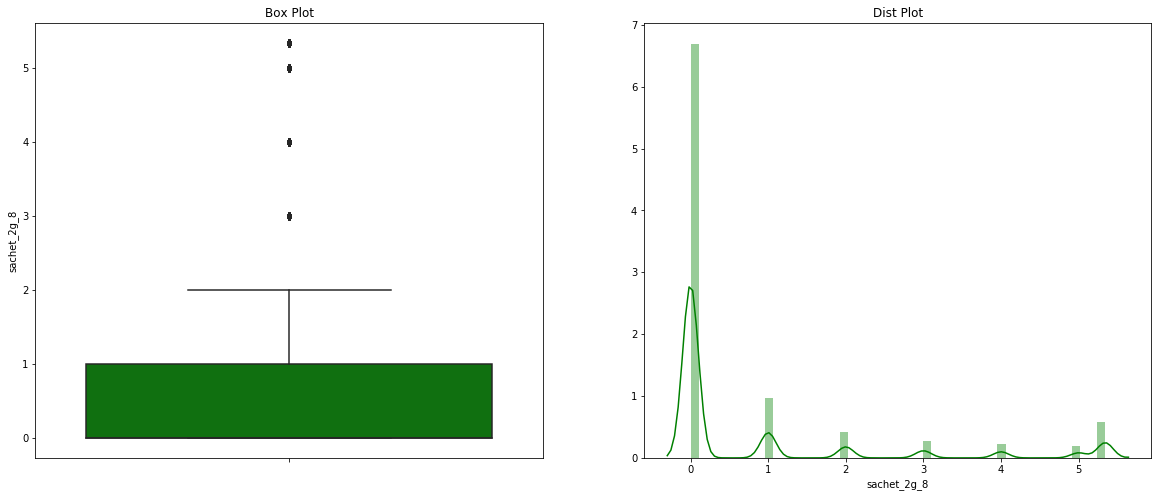

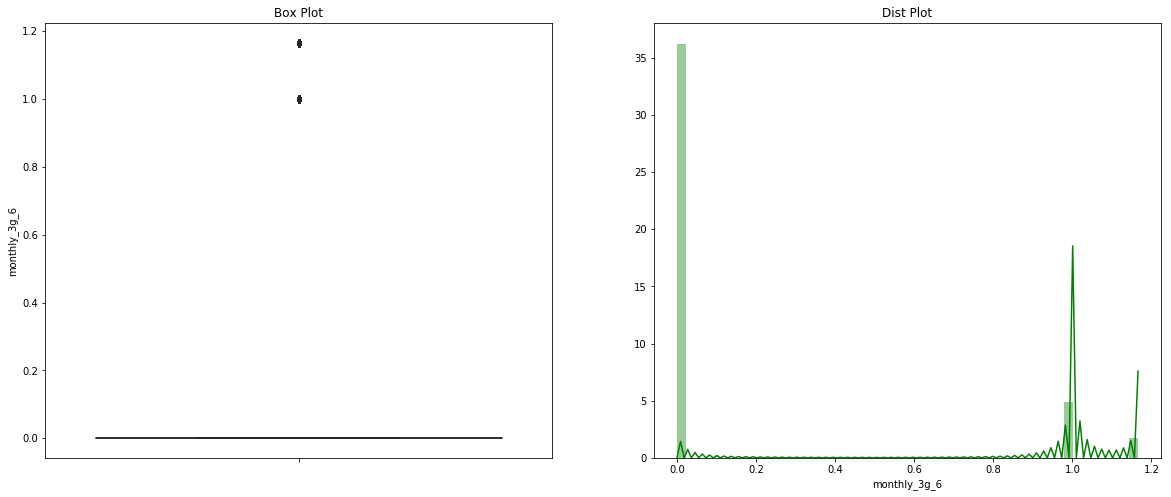

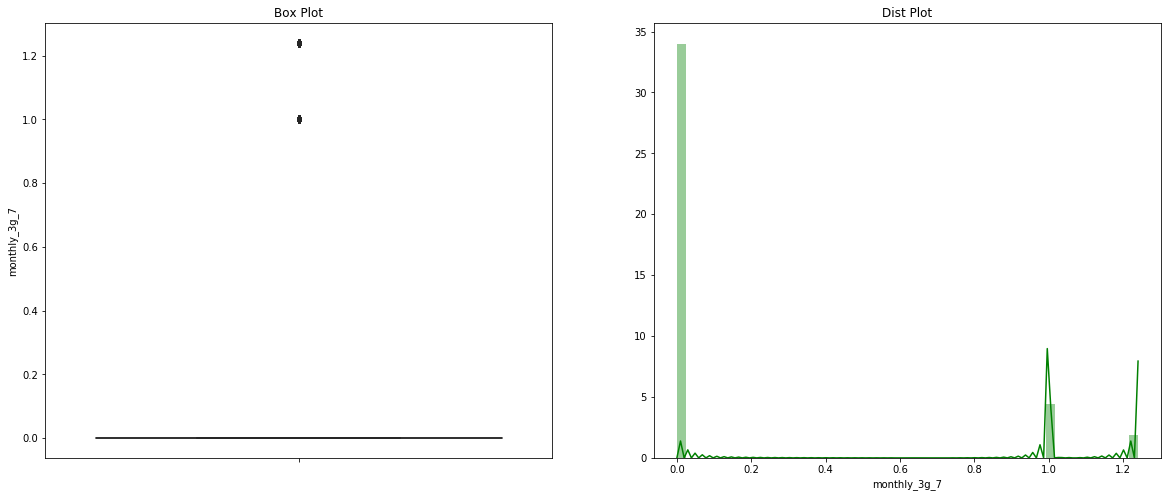

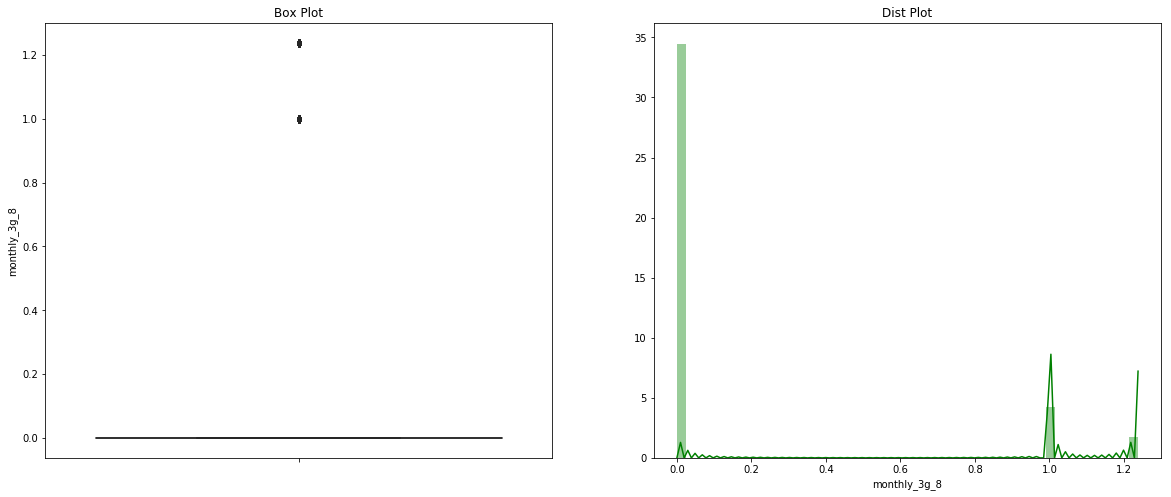

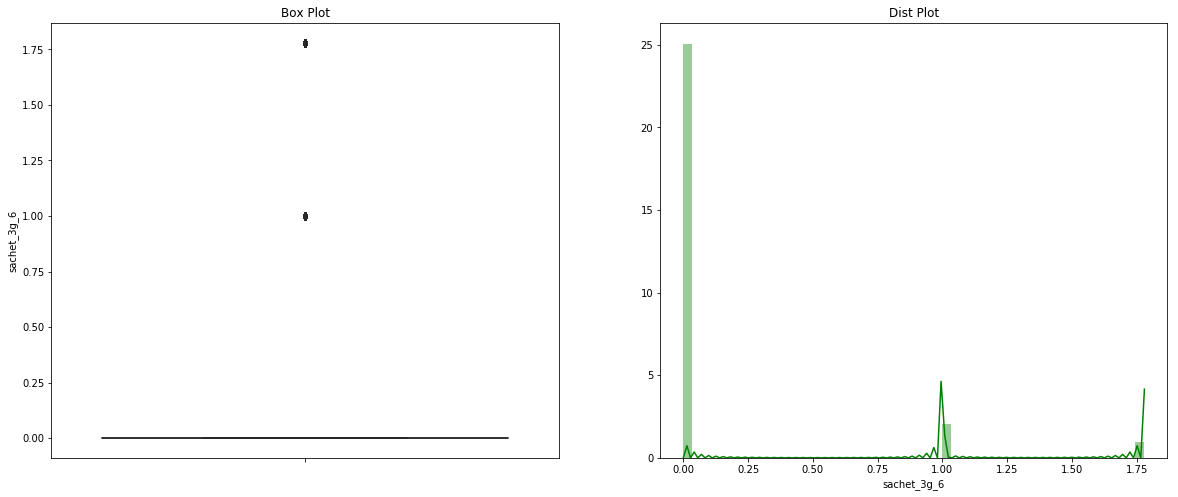

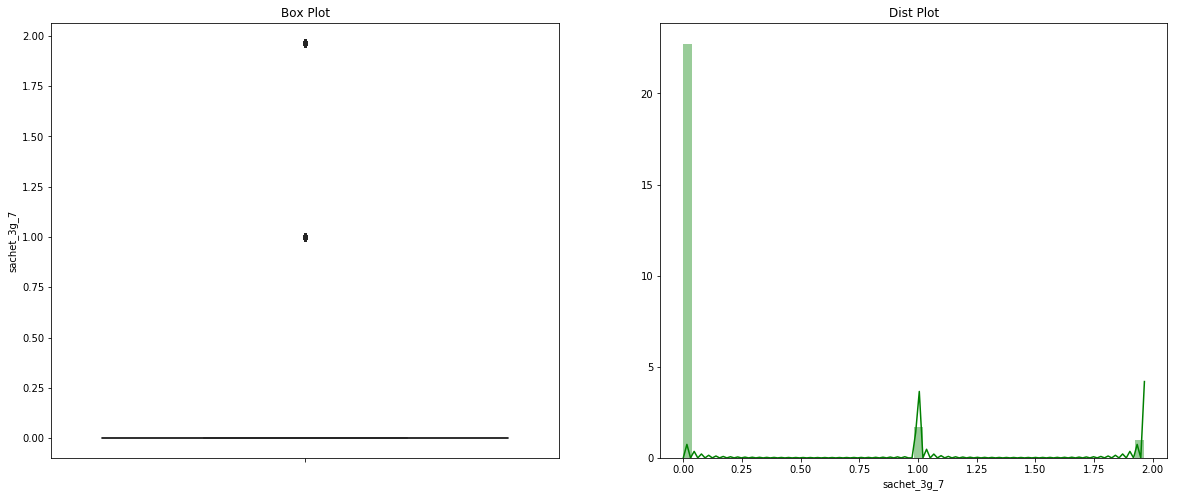

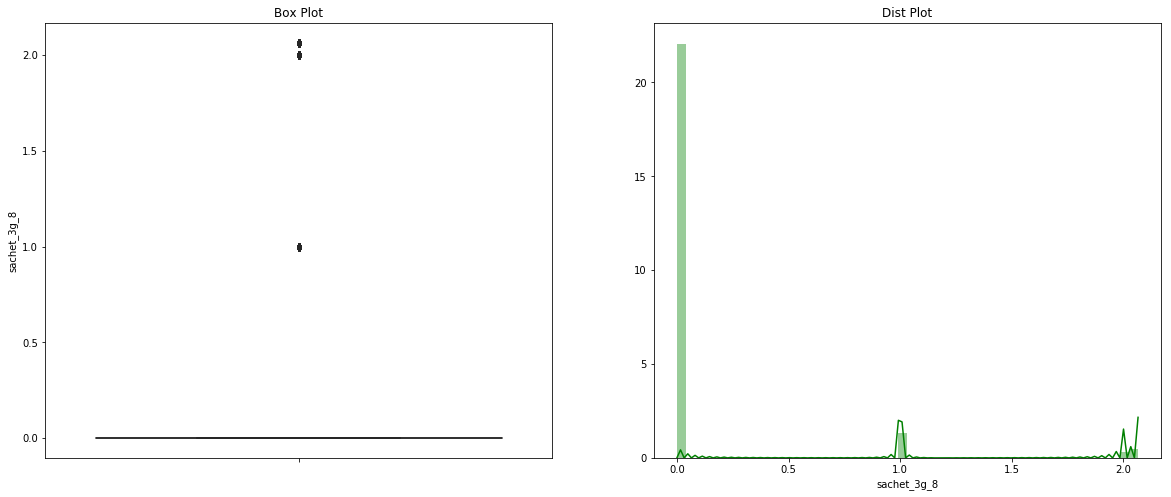

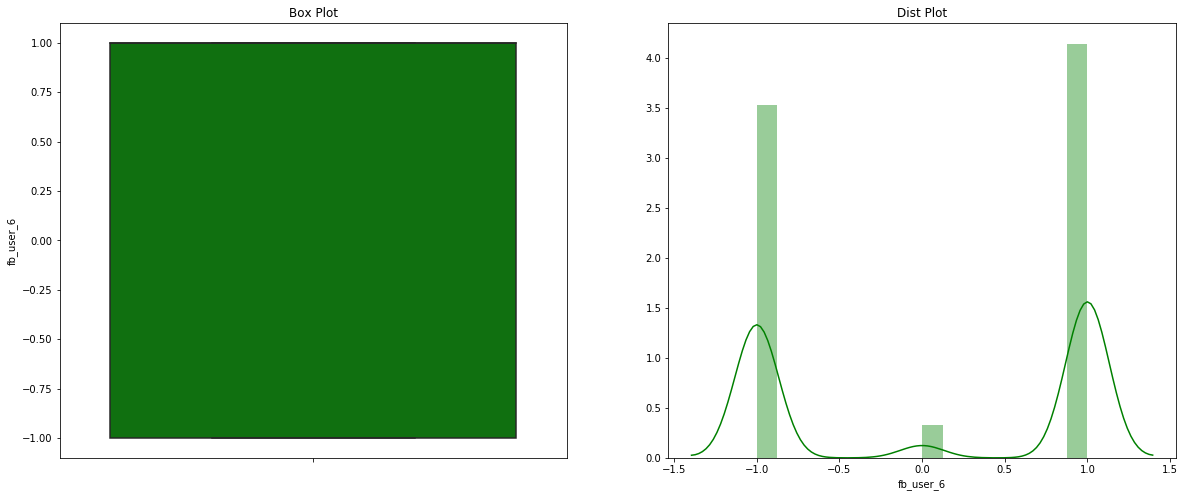

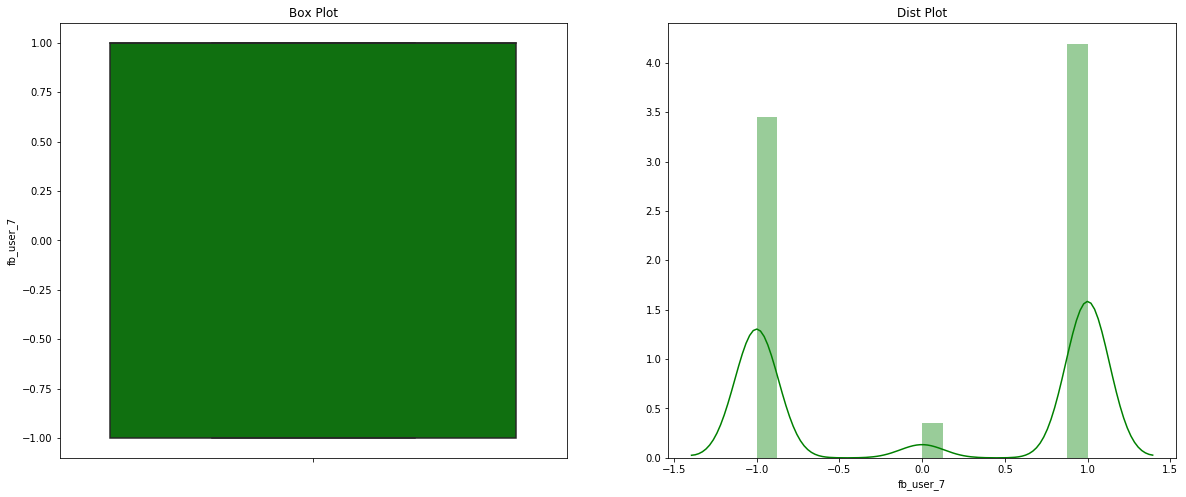

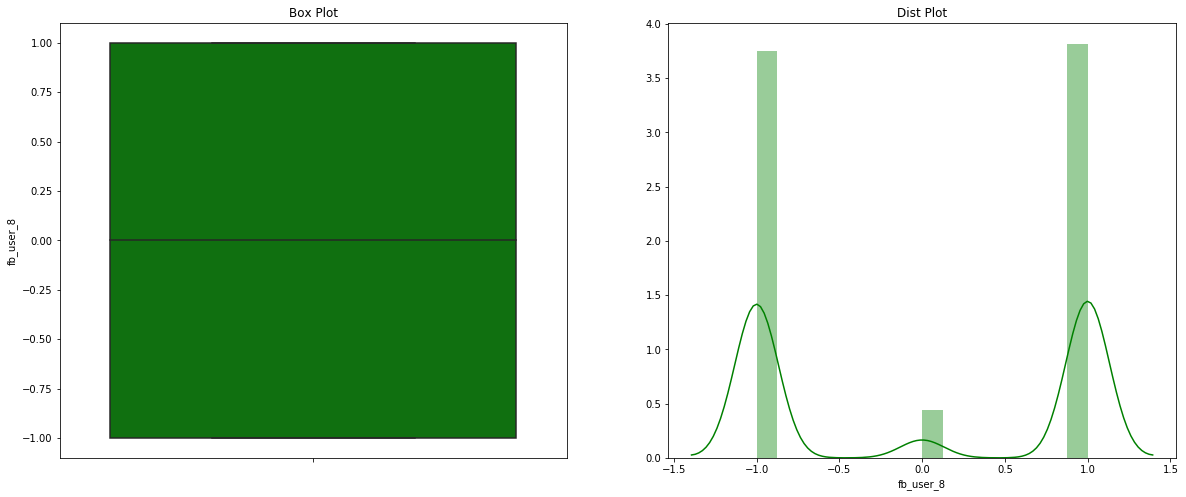

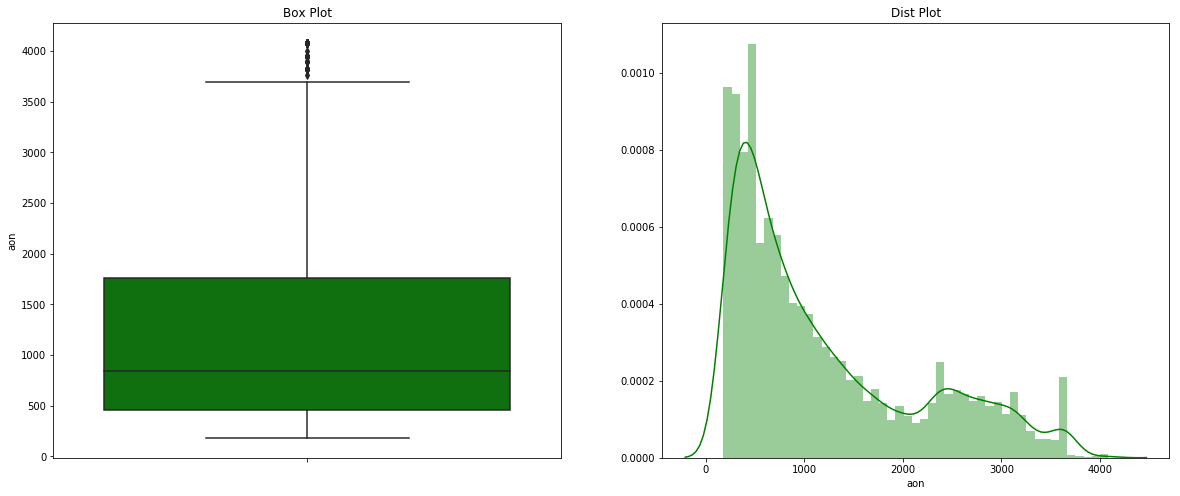

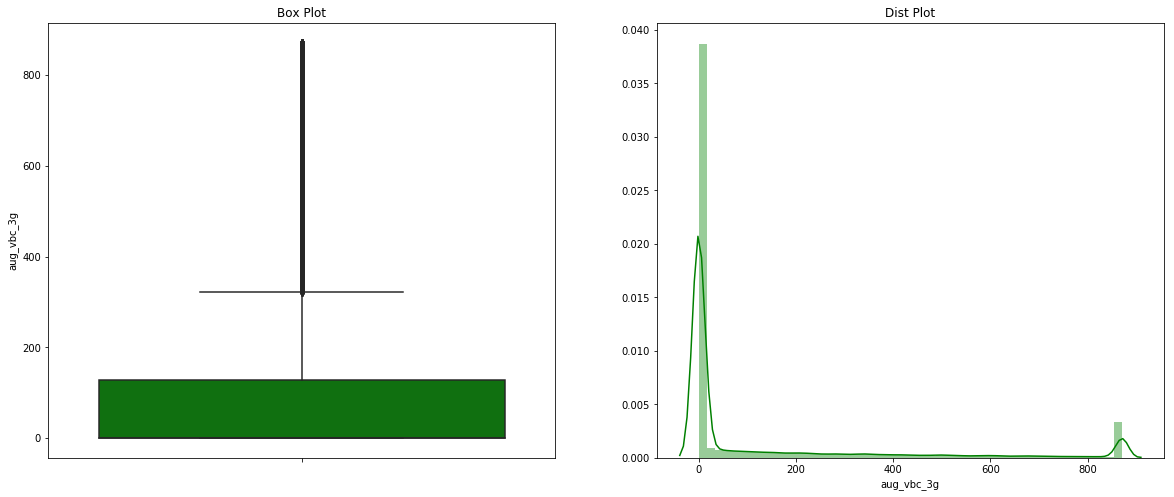

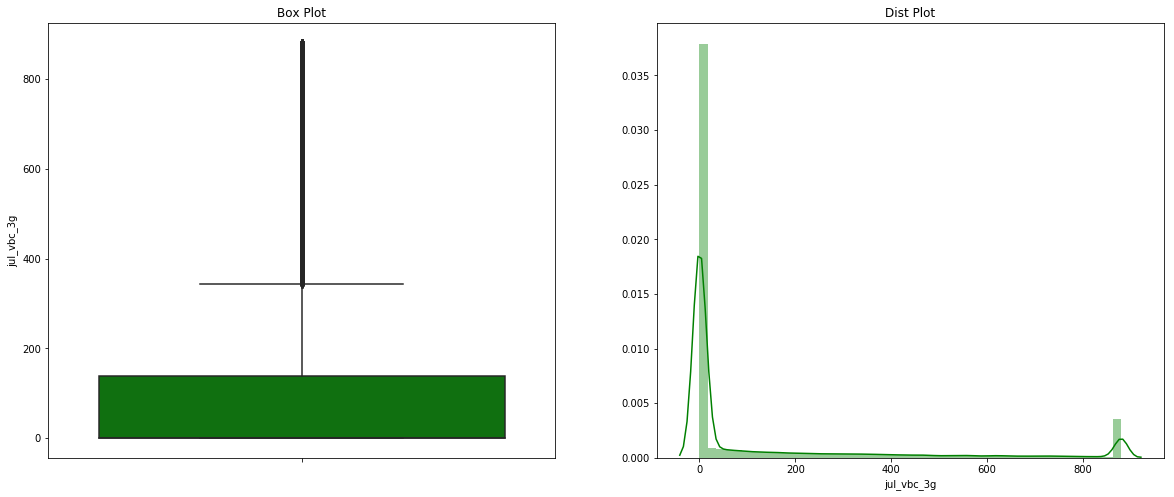

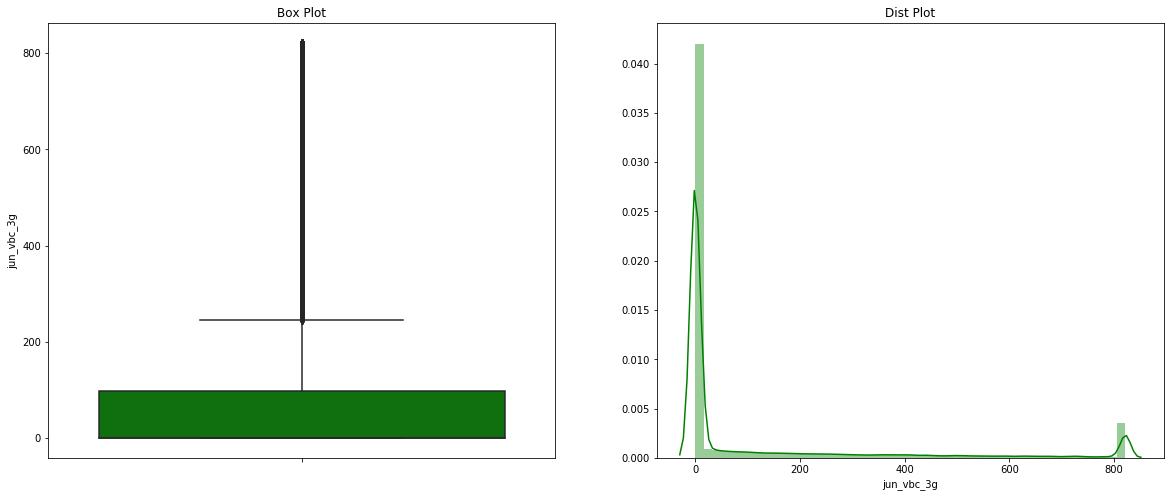

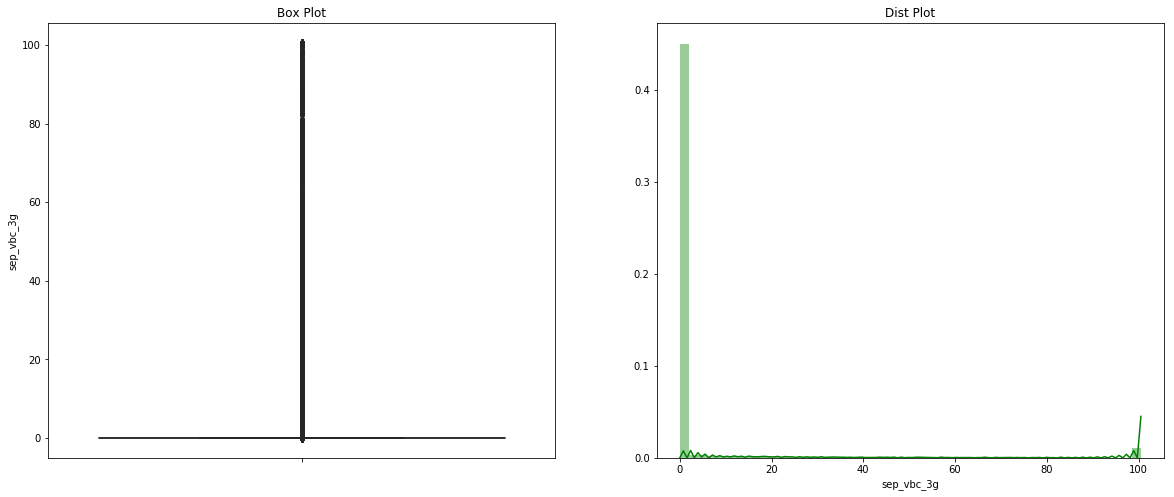

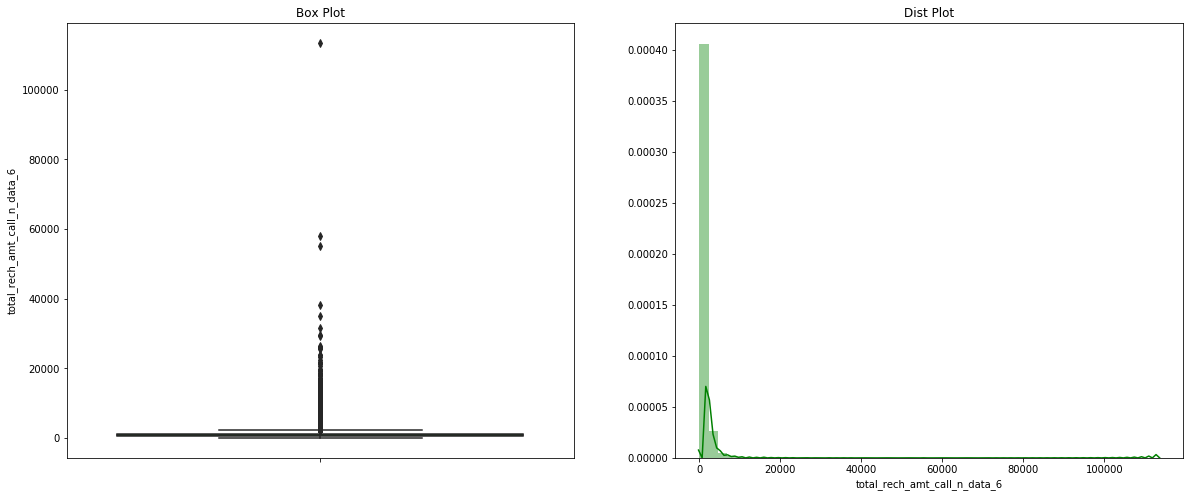

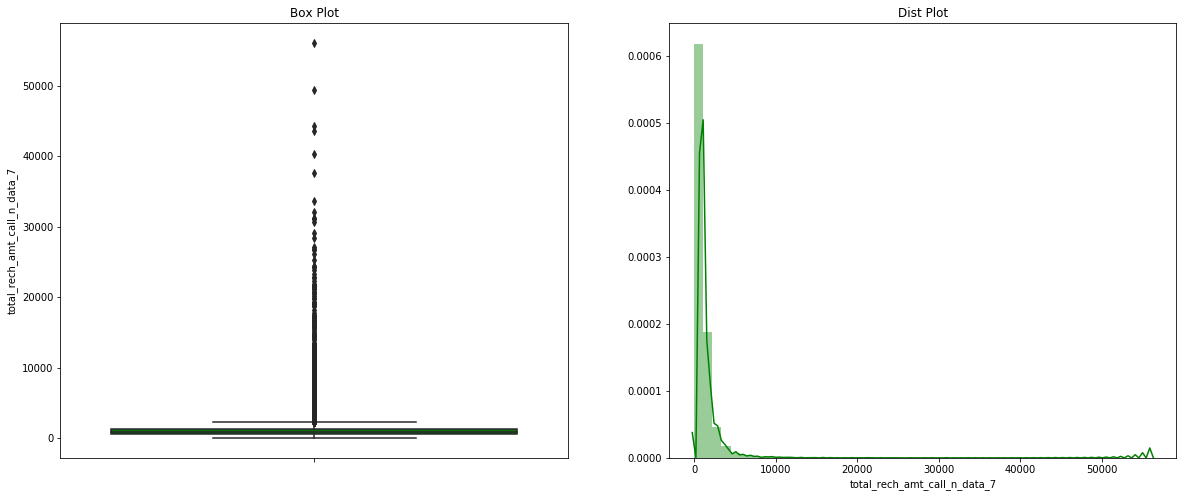

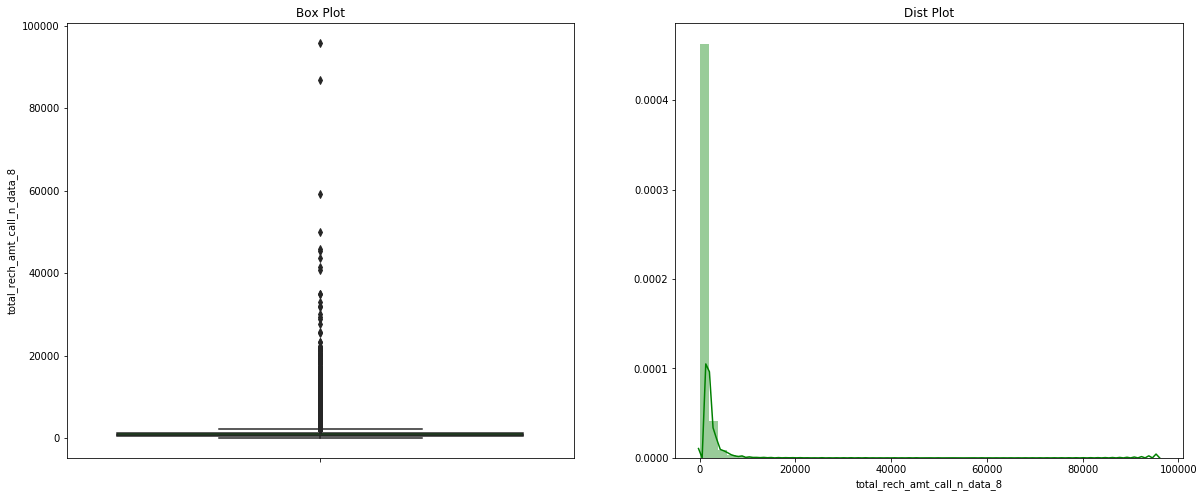

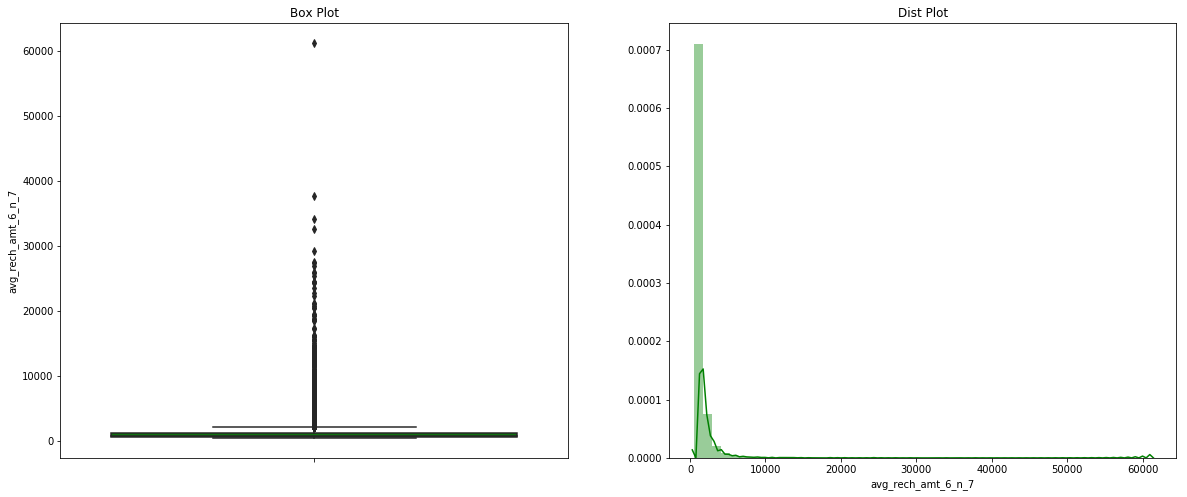

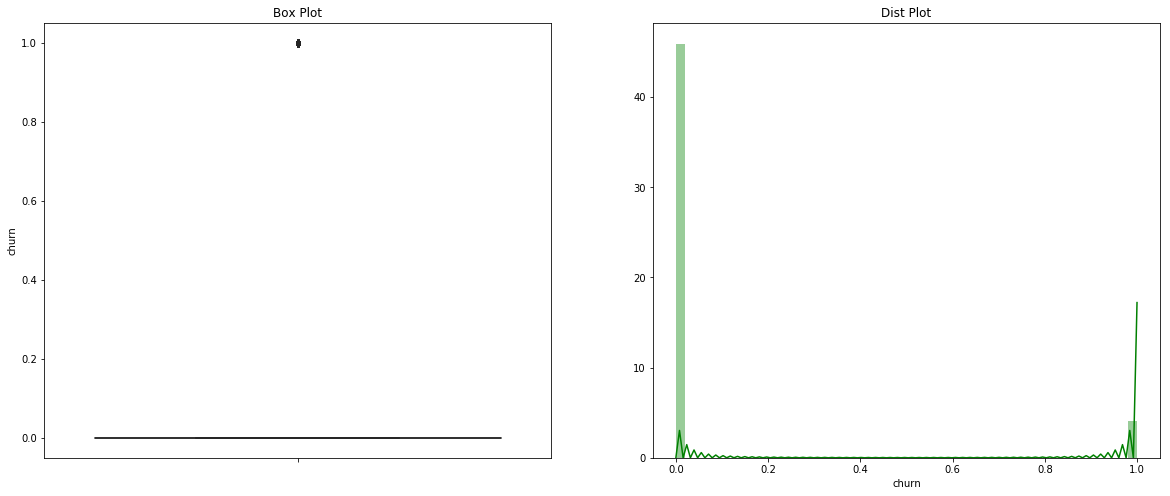

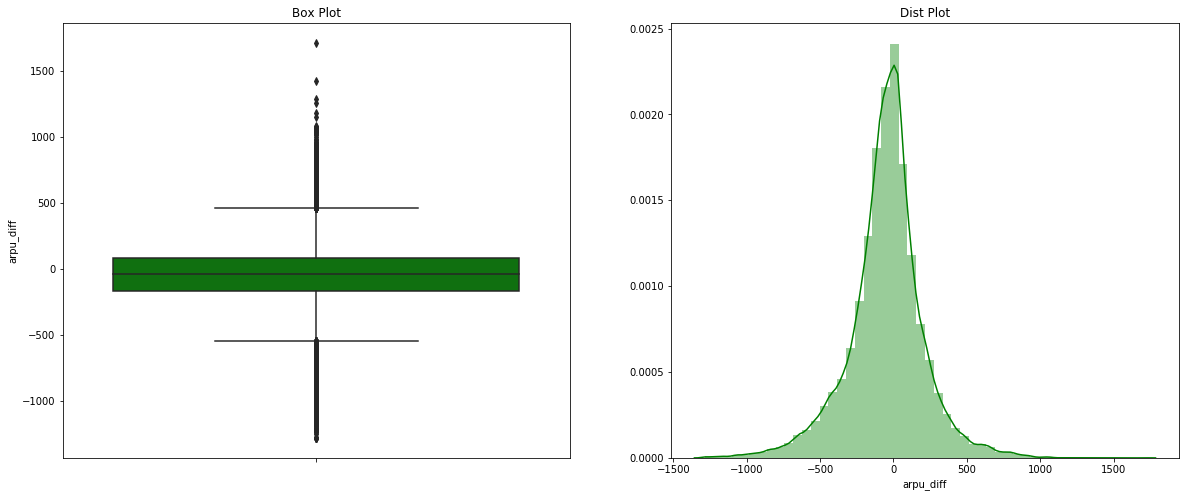

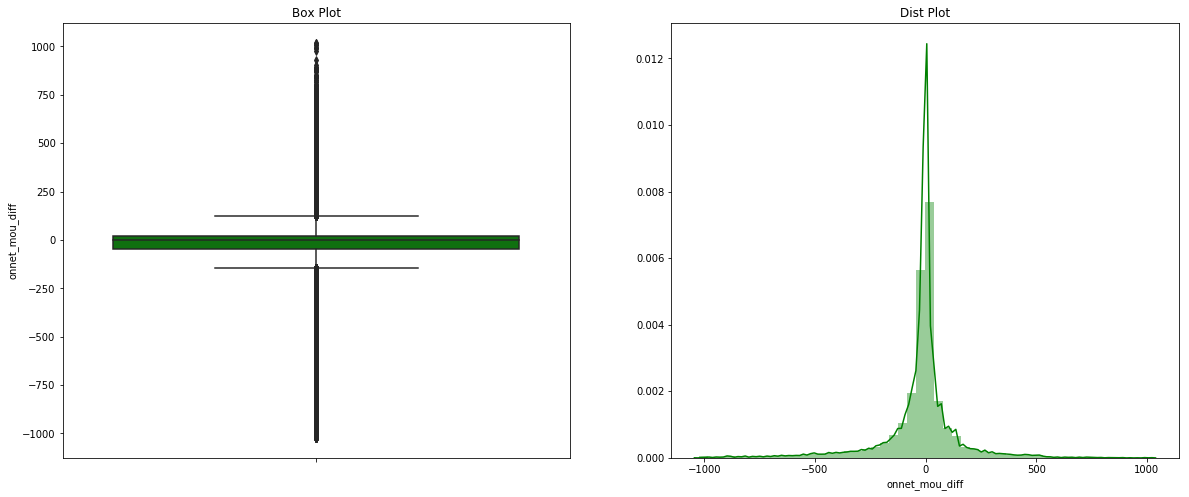

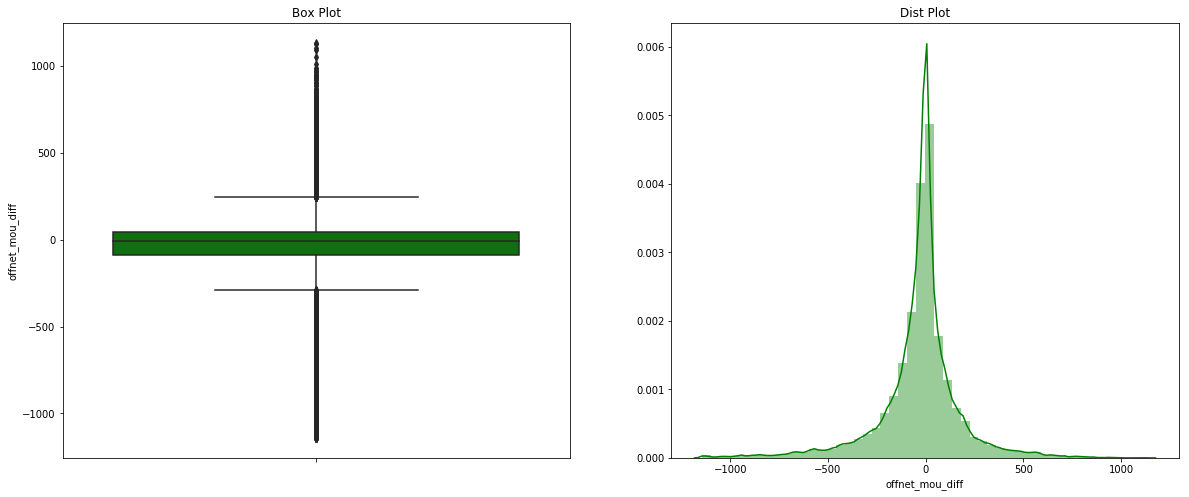

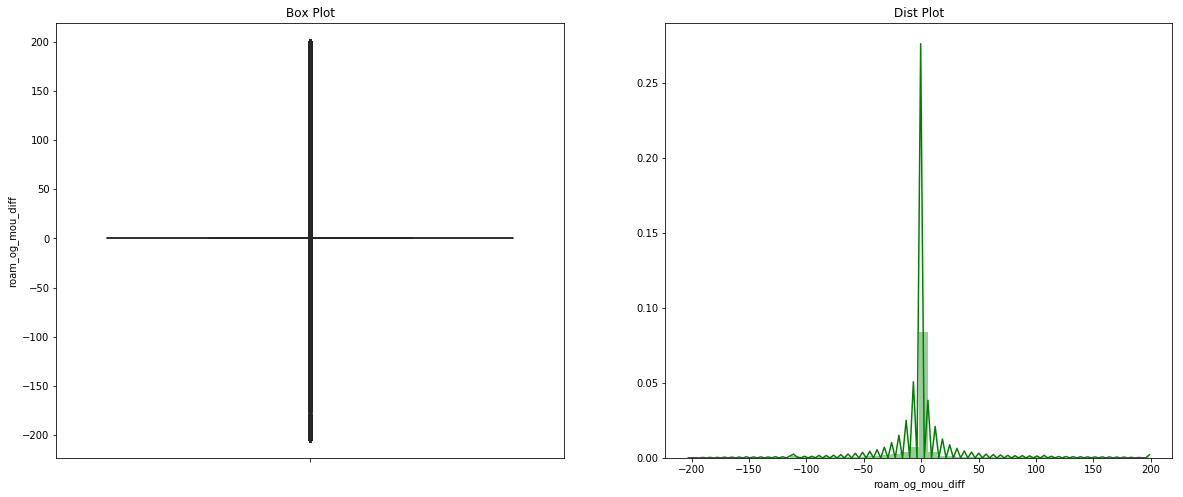

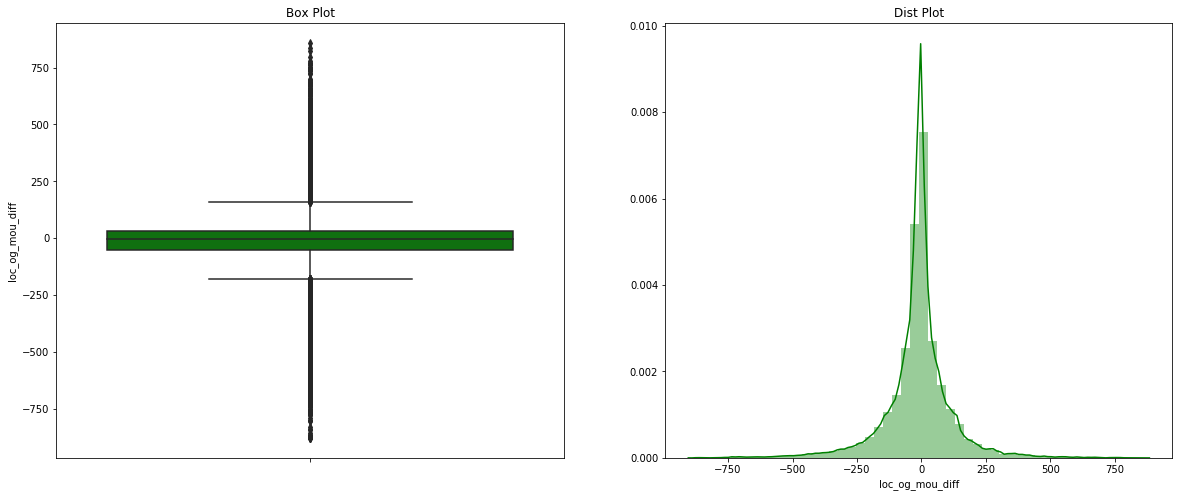

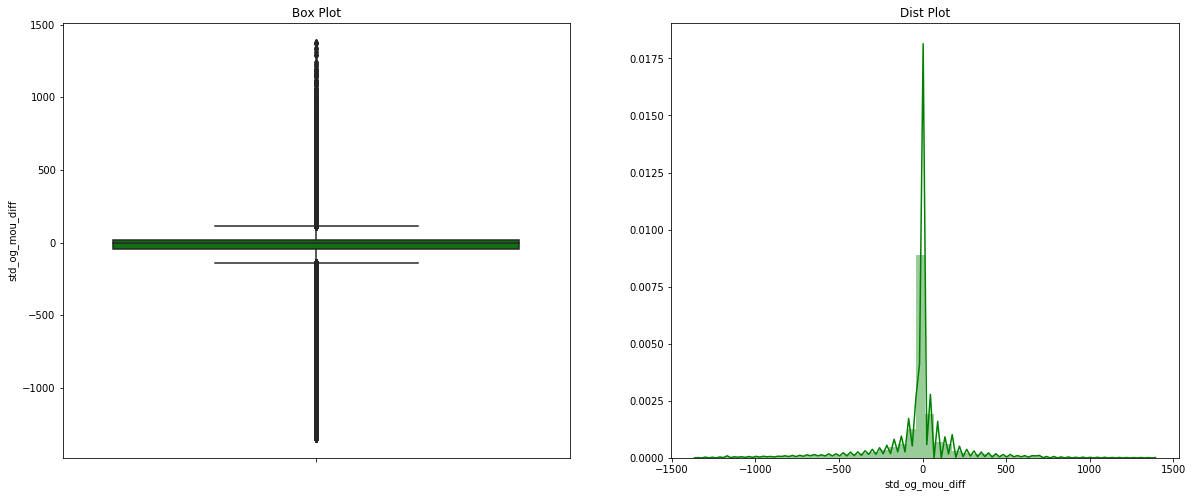

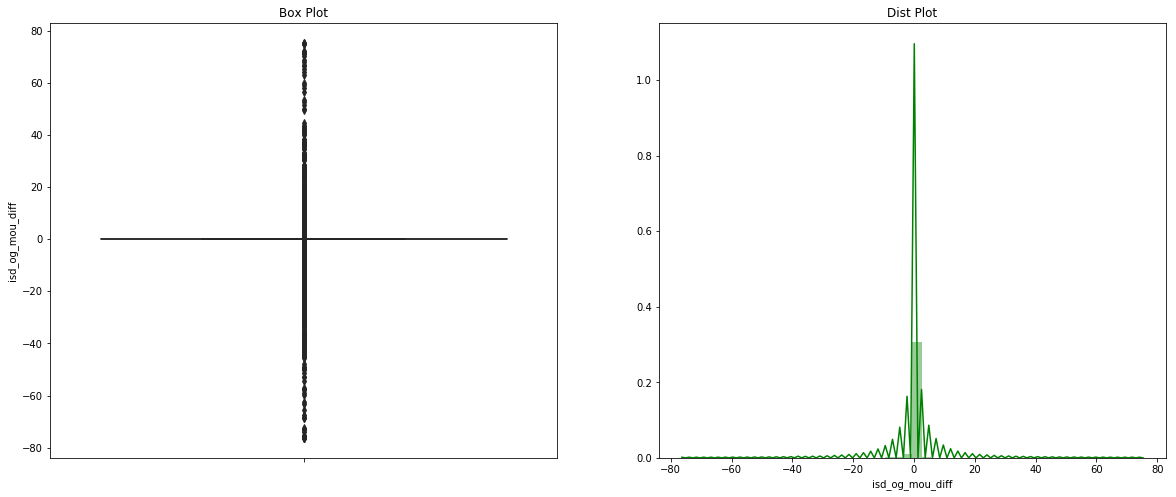

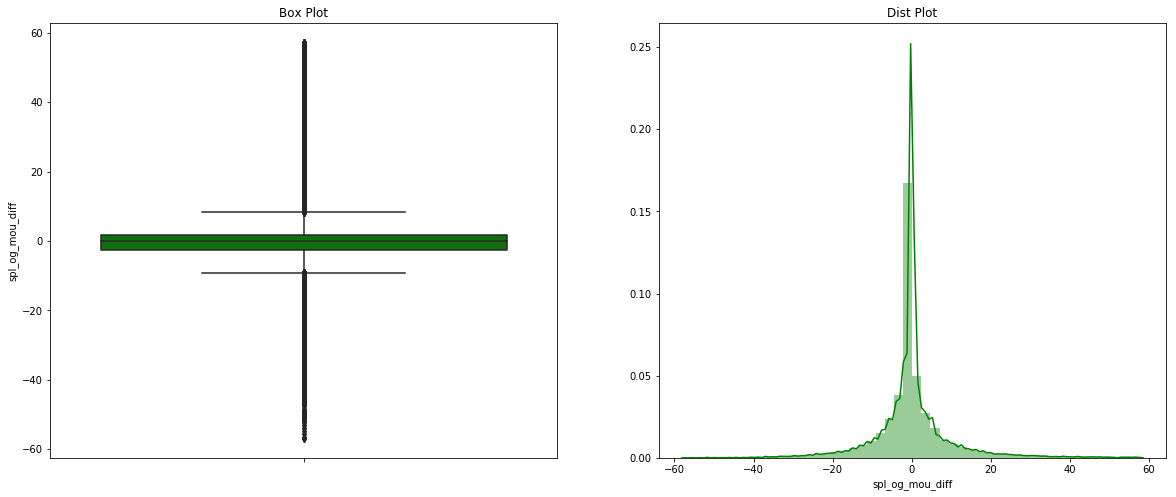

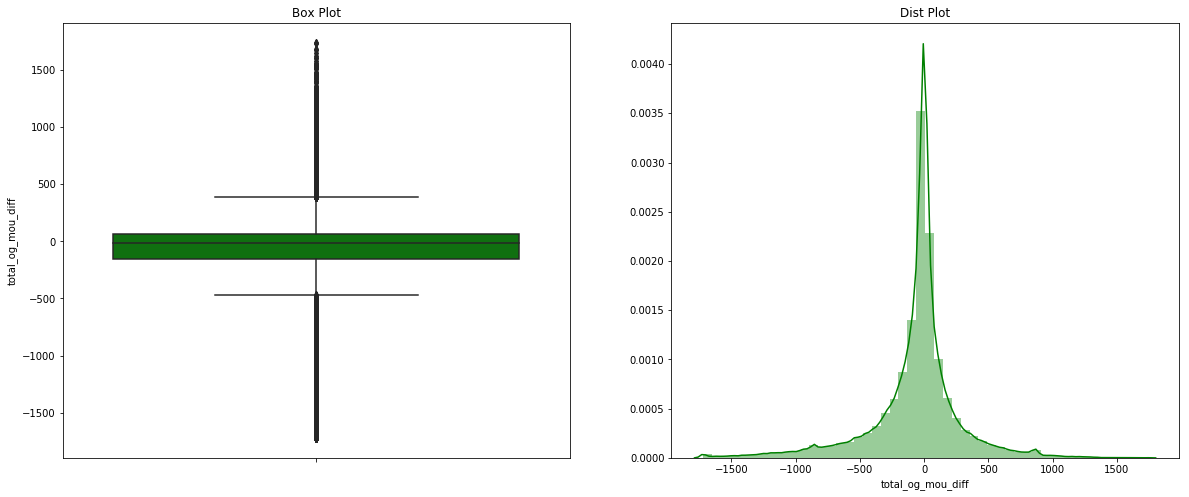

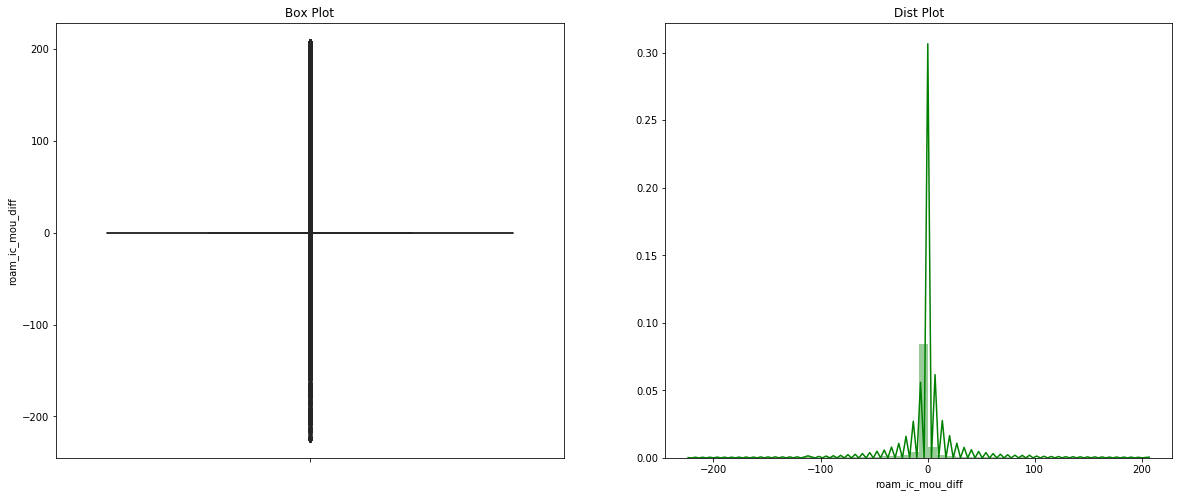

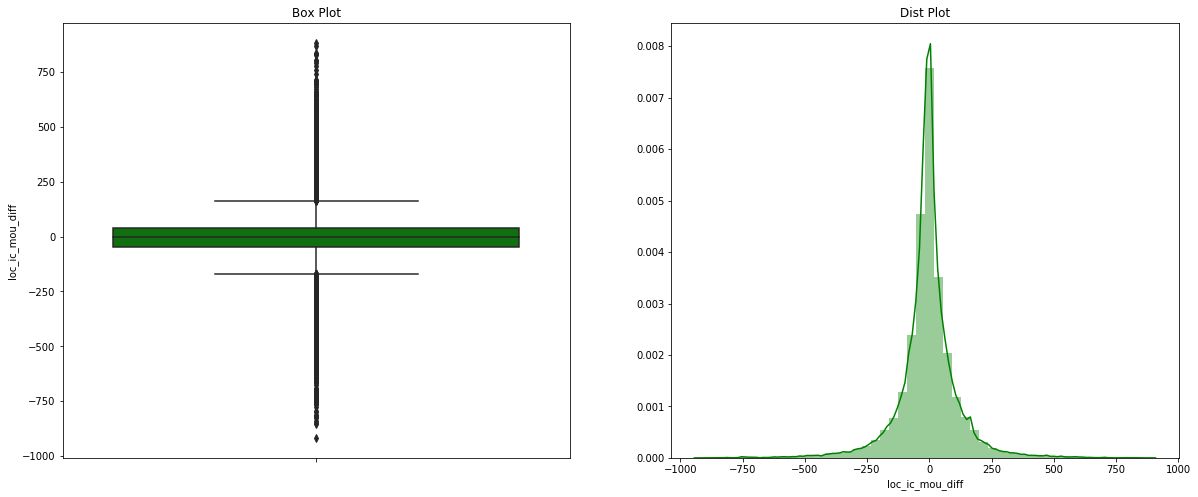

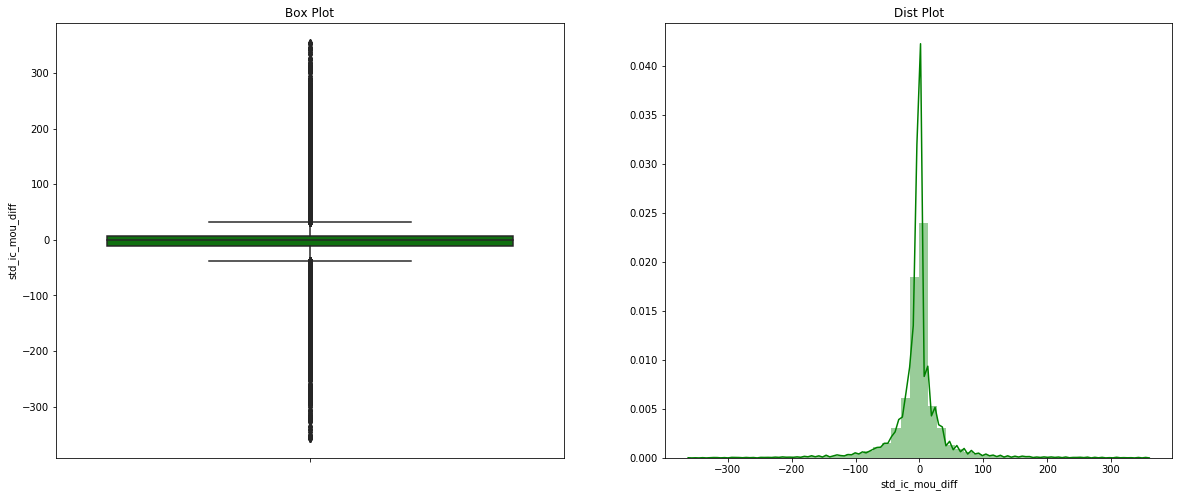

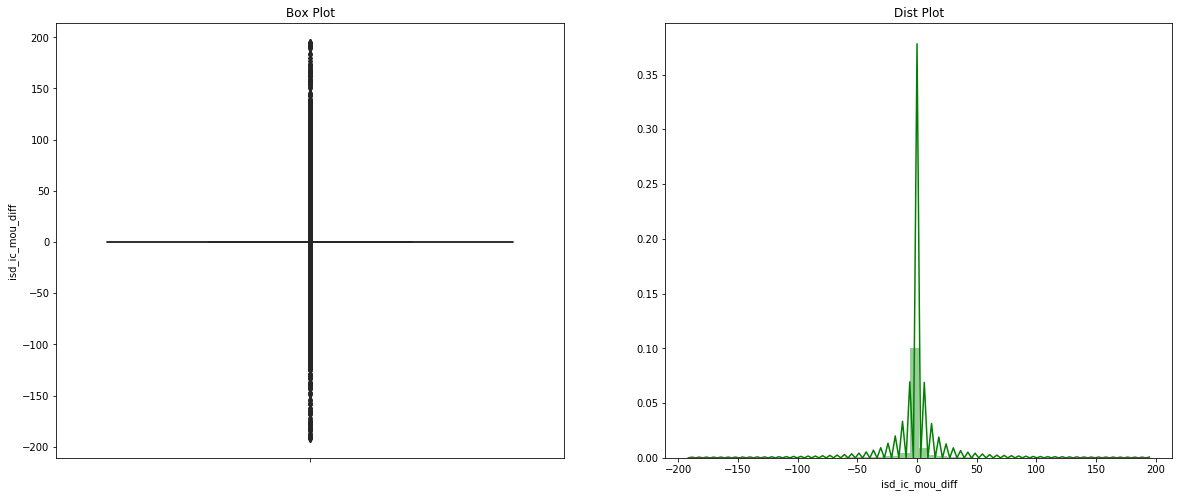

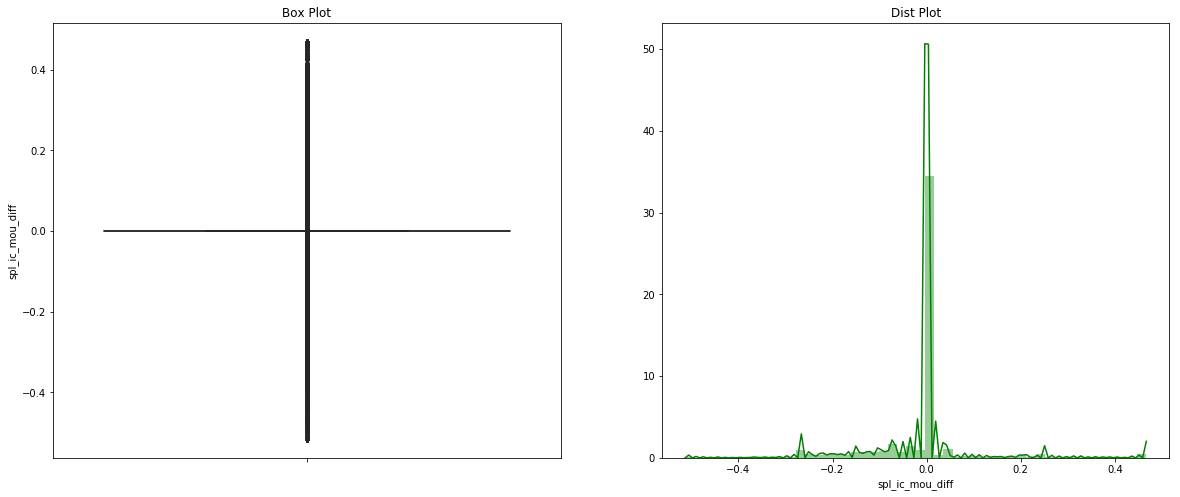

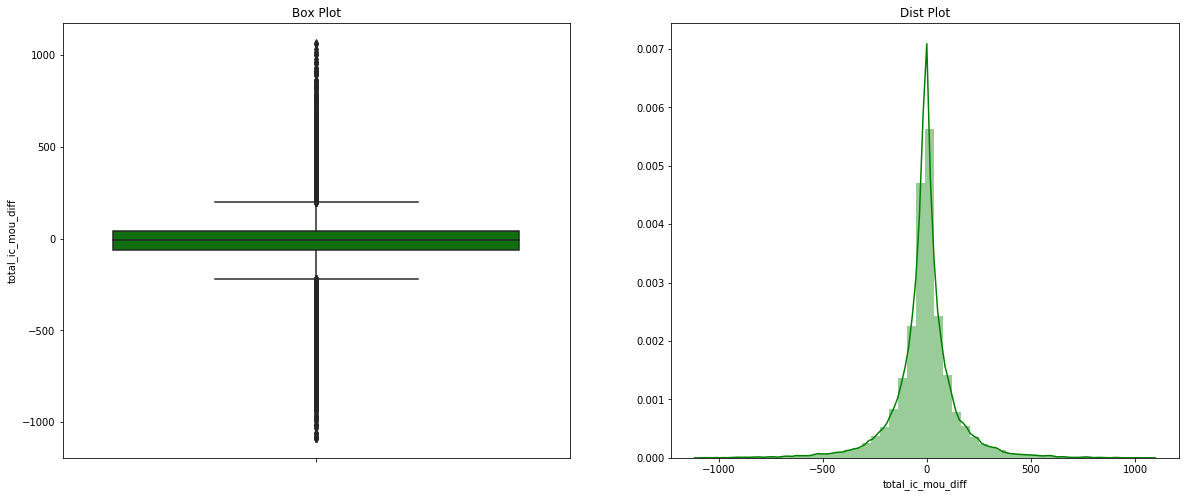

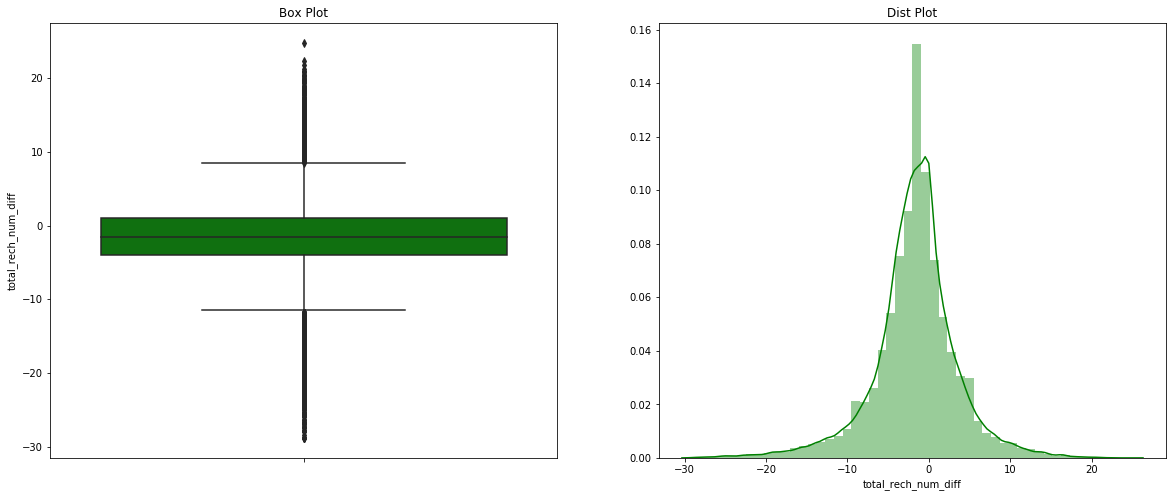

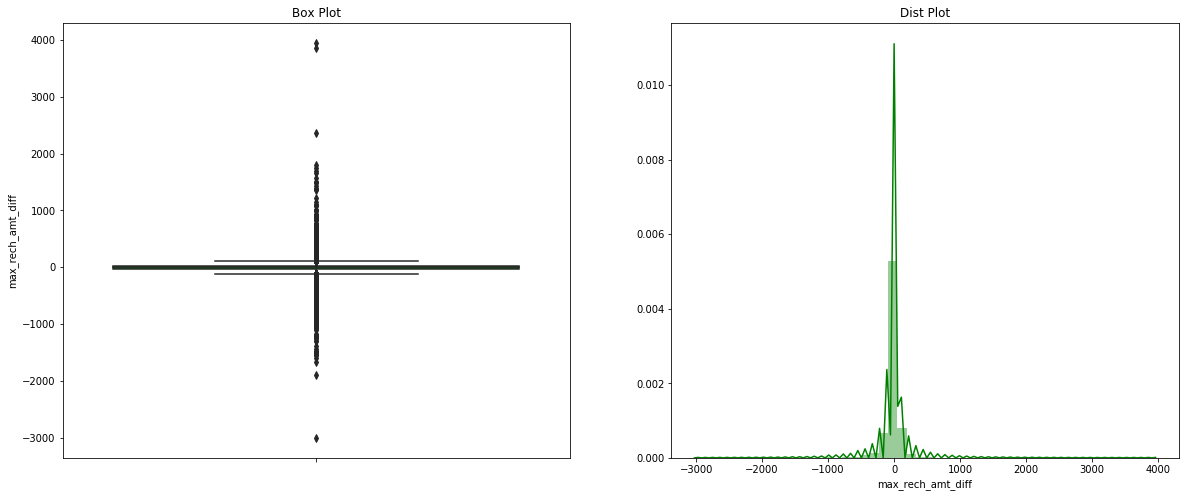

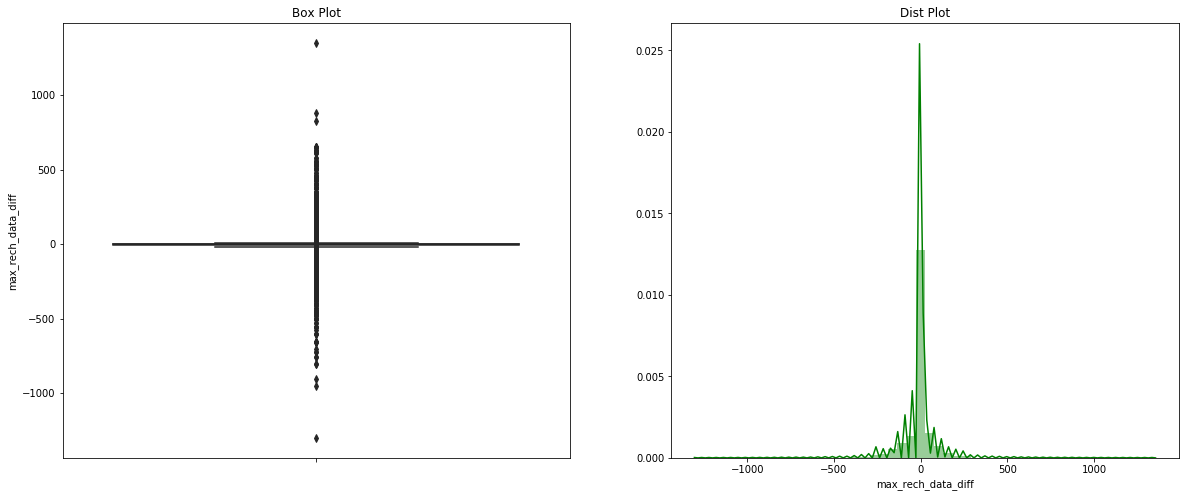

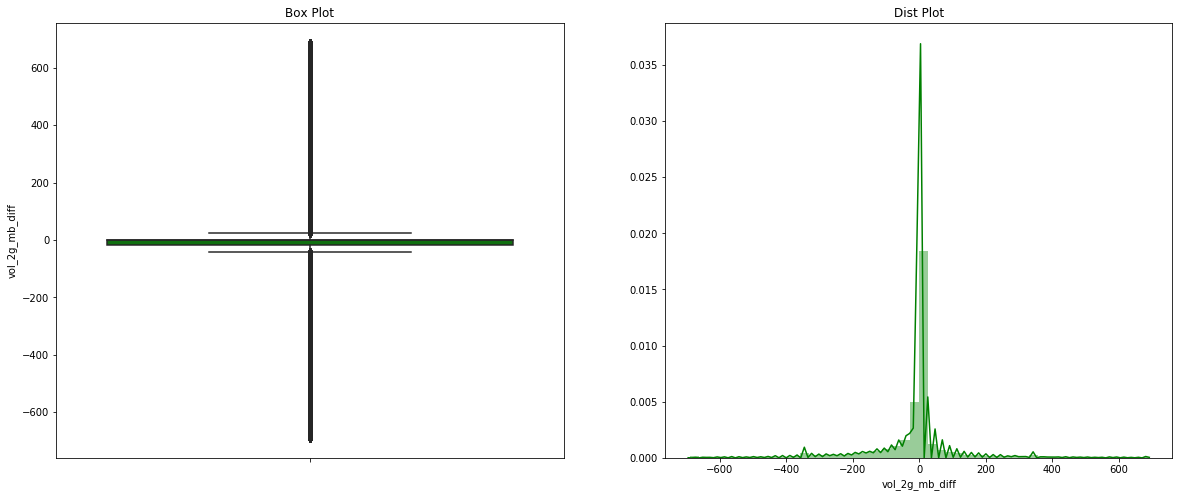

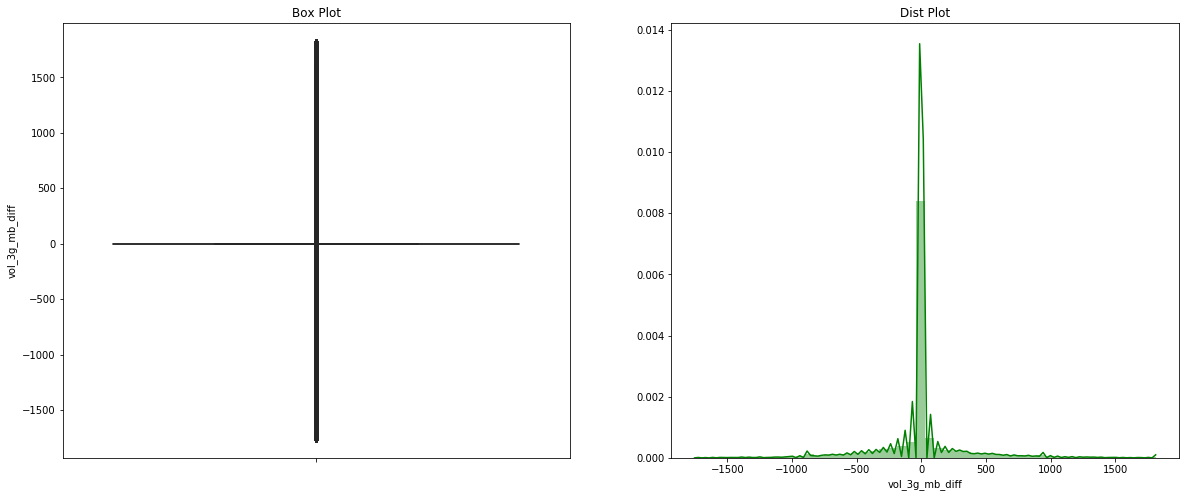

In [48]:
for numeric_variable in nums:
     univariate_analysis(telecom, numeric_variable, 'green')

We can observe that the  varaibles are skewed

In [50]:
#Let us create the average on network
telecom_modified= telecom
telecom_modified['aon_years']=telecom_modified['aon']/365
telecom_modified['aon_years'] = telecom_modified['aon_years'].astype(int)

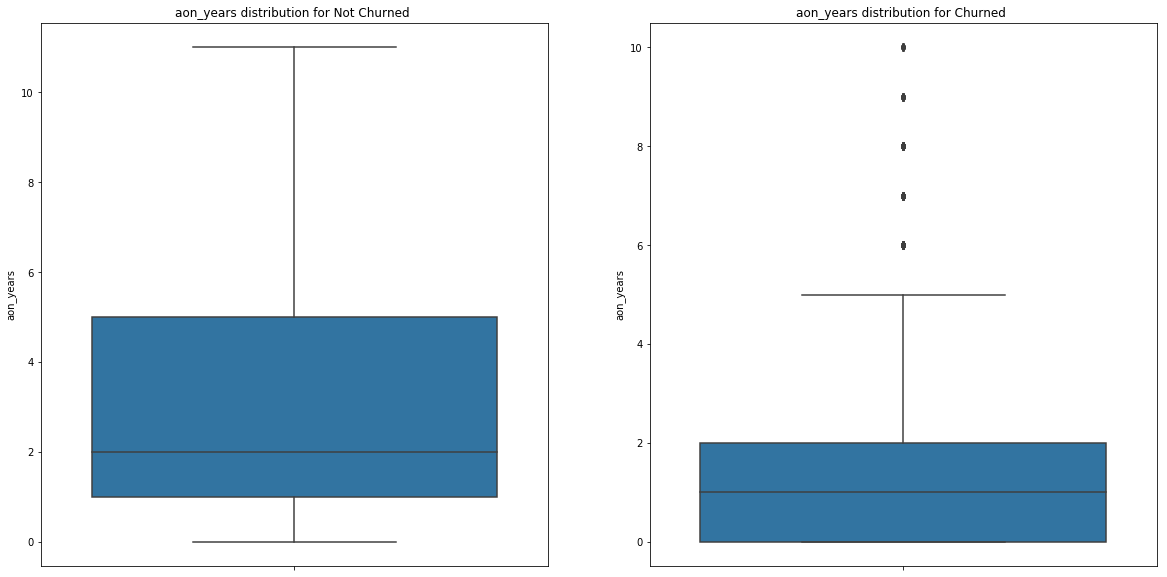

In [51]:
aon_df = telecom_modified[['churn','aon_years']]
get_boxPlot(aon_df,'aon_years')

#### B. Bivariate Analysis

In [52]:
telecom.columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'std_ic_mou_diff', 'isd_ic_mou_diff', 'spl_ic_mou_diff',
       'total_ic_mou_diff', 'total_rech_num_diff', 'max_rech_amt_diff',
       'max_rech_data_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff', 'aon_years'],
      dtype='object', length=167)

Let us analyse the derived varaibles with the churn

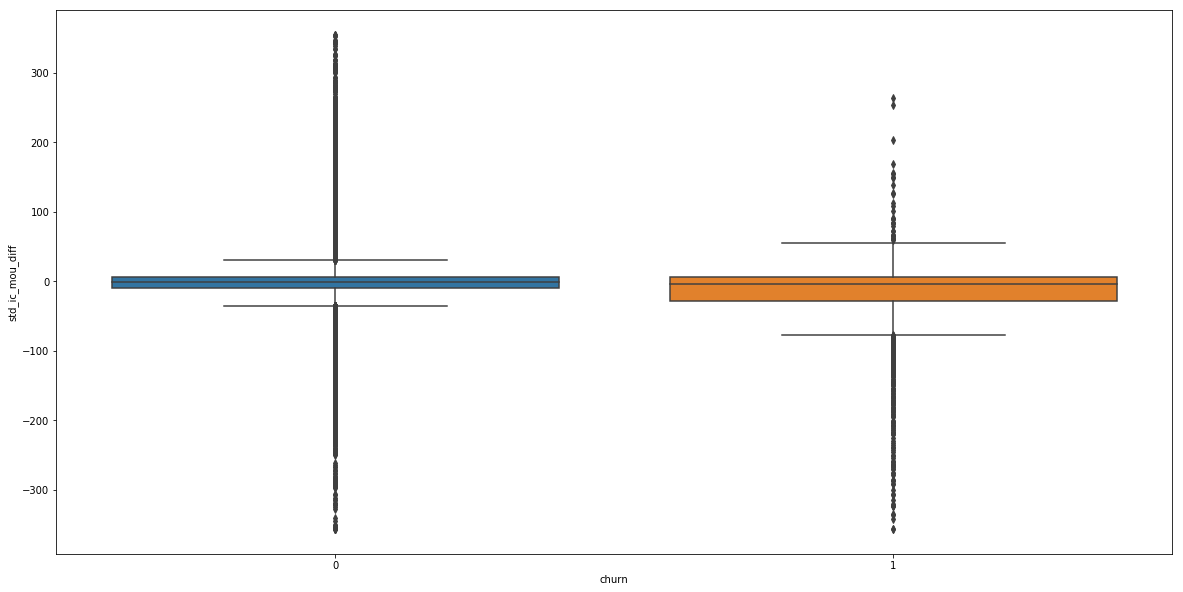

In [53]:
bivariate_analysis(telecom.churn, telecom.std_ic_mou_diff)

In [54]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 167 entries, circle_id to aon_years
dtypes: float64(161), int32(1), int64(5)
memory usage: 39.6 MB


## Step 5. Rescaling the Features using Standard Scaling

In [55]:
#Import Library for scaling
from sklearn.preprocessing import StandardScaler

In [56]:
scaler =StandardScaler()

In [57]:
X = telecom.drop("churn", axis = 1)
Y = telecom.churn

In [58]:
X_scaled= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [59]:
print(X_scaled.shape)

(30001, 166)


## Step 6:- PCA
The aim of PCA is to reduce Number of Features

In [60]:
# import libraries for PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

##### A . Perform PCA 

In [61]:
pca = PCA(random_state=50, svd_solver='randomized')
pca.fit(X_scaled)
telecom_pca = pca.fit_transform(X_scaled)

In [62]:
pd.DataFrame(telecom_pca).head()
pca.components_.shape

(166, 166)

In [63]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature': telecom.iloc[:, :-1].columns})
pcs_df.head()

PC1           PC2         Feature
0  8.141599e-17 -5.823032e-17       circle_id
1  0.000000e+00 -1.110223e-16  loc_og_t2o_mou
2  0.000000e+00 -2.220446e-16  std_og_t2o_mou
3 -1.387779e-17 -1.387779e-17  loc_ic_t2o_mou
4  1.383046e-01 -9.817276e-03          arpu_6

In [64]:
np.cumsum(pca.explained_variance_ratio_)

array([0.11151799, 0.2084583 , 0.26319039, 0.30901483, 0.34823223,
       0.38456819, 0.41223823, 0.43571318, 0.45864616, 0.48011876,
       0.50008549, 0.51894049, 0.53657773, 0.55318973, 0.56959656,
       0.58427358, 0.5981269 , 0.61169193, 0.62474864, 0.63711324,
       0.64896595, 0.66052179, 0.67195467, 0.68306791, 0.69355632,
       0.70379019, 0.71392656, 0.72365595, 0.73315238, 0.7423304 ,
       0.75104368, 0.75946241, 0.76782536, 0.77593745, 0.78370075,
       0.79130628, 0.79860254, 0.80571181, 0.81277388, 0.81947843,
       0.82585317, 0.8320292 , 0.8380602 , 0.84390364, 0.84922136,
       0.8544146 , 0.85954595, 0.86456902, 0.8694051 , 0.87383714,
       0.87816431, 0.88242616, 0.88650398, 0.89035095, 0.89417325,
       0.89791757, 0.90154216, 0.9050426 , 0.90847496, 0.91185491,
       0.91505024, 0.91823163, 0.92135393, 0.92437255, 0.92735627,
       0.93003973, 0.93269633, 0.93528322, 0.93780221, 0.94027271,
       0.94270633, 0.94508561, 0.94738582, 0.94959984, 0.95174

#### B. Draw Scree Plot and find best value for n

Text(0.5, 1.0, 'Scree plot')

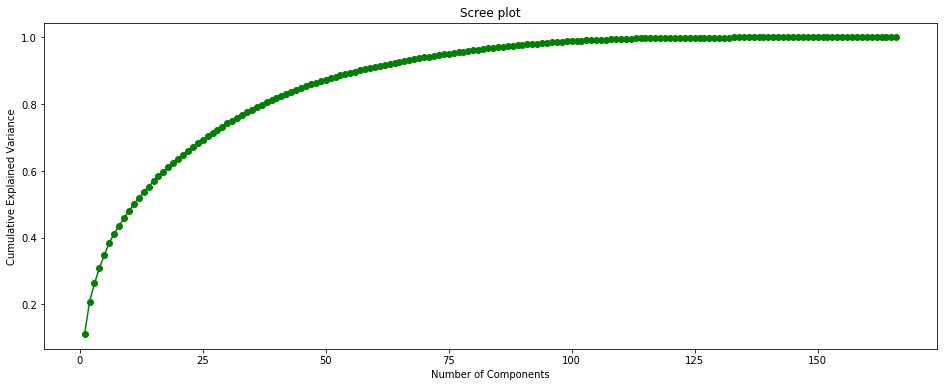

In [65]:
fig = plt.figure(figsize = (16, 6))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'go-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree plot')

###### Scree Plot Analysis:-

From Above it can be concluded that first 60 Components can explain about 91% of variance of the data

Hence we can choose n_components=60 for our data


#### C. Perform PCA with n= `60`

In [66]:
pca = PCA(n_components=60, random_state=50)
pca_final_array = pca.fit_transform(X_scaled)

In [67]:
pca_final_df = pd.DataFrame(pca_final_array, columns=['PC'+str(i) for i in range(1, pca_final_array.shape[1]+1)],index=X_scaled.index)
pca_final_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.901701  1.693150 -0.249114  2.744208 -2.002128 -2.050475 -0.497662   
1  8.328225  5.505969  1.045553  5.642413 -6.769315  3.770626  2.326351   
2 -2.939142 -1.389168 -1.882534  0.045033  1.965368 -0.815856 -1.053457   
3  2.387828 -5.479029  2.225757 -1.521222 -0.430136  1.197360  3.800819   
4 -2.783649  1.441767  1.402910 -1.970845 -1.377236 -0.184842 -0.247952   

        PC8       PC9      PC10    ...         PC51      PC52      PC53  \
0 -0.790647 -0.308564 -0.369553    ...    -0.169415 -0.446950  0.065278   
1 -0.114096  6.010878 -4.511590    ...     0.306031  0.702906  0.512267   
2  0.185283 -0.436304  0.018277    ...    -1.580309 -0.995187  0.019436   
3 -1.896010 -1.381605  0.996767    ...    -0.213860 -0.788927  0.070049   
4 -0.888260  0.544495 -0.357600    ...     1.056469 -0.167570 -2.343796   

       PC54      PC55      PC56      PC57      PC58      PC59      PC60  
0  0.173150  0.308937 -0.098498 -0.106088 -0.521433 -0.282775 -0.179761  
1 -0.009432  0.124555  0.338641  0.205002 -0.035710 -0.346315 -0.203857  
2  0.573180  0.358772 -0.488932 -0.609199  0.430826  1.039100 -1.041771  
3  0.272689  0.146185 -0.079291 -0.002885  0.004054 -0.043872  0.144683  
4 -0.208948 -0.700990 -0.591446 -1.449729  0.837641  0.138981 -0.187461  

[5 rows x 60 columns]

In [68]:
X_PCA=pca_final_df

## Step 7:- Train Test Split

Splitting the dataset into train and test frame with a constant random seed so that the results are reproducible.

In [69]:
#Import Library for test train spilit
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, Y, test_size = 0.30, random_state = 4, stratify = Y)

In [71]:
print("Shape of X Train:- ", X_train.shape)
print("Shape of Y Train:- ",y_train.shape)
print("Shape of X Test:- ",X_test.shape)
print("Shape of Y Test:- ",y_test.shape)

Shape of X Train:-  (21000, 60)
Shape of Y Train:-  (21000,)
Shape of X Test:-  (9001, 60)
Shape of Y Test:-  (9001,)


## Step 8:- Model Building

#### Import Libraries for modelling

In [72]:
#linear & Logistic Regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
#PCA & SVM
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
#Random Forest & Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz
from sklearn import tree
#Others
from random import sample
from numpy.random import uniform
from math import isnan
import os

###  Model 1 :-  `Logistic Regression`

#### A. Creating User defined Functions

In [73]:
#Defining function for VIF
def get_vif(X_df):
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [74]:
#Defining function for creating linear Regression model
def get_linear_regression_model(y_train, X_train):
    X_train = sm.add_constant(X_train)
    return X_train, sm.GLM(list(y_train), X_train, family = sm.families.Binomial()).fit()

In [75]:
def get_model_and_print_summary(X_df):
    X_train, lm = get_linear_regression_model(list(y_train), X_df)
    print(lm.summary())
    print('\n\nVIF Values\n')
    print(get_vif(X_df))
    print('\n\nP-Values\n')
    print(lm.pvalues.sort_values(ascending=False))
    return X_train, lm   

In [76]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
def metrics_dataframe(actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    specificity = TN/float(TN+FP)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    false_positive_rate = FP/float(TN+FP)
    positive_predictive_value = TP/float(TP+FP)
    negative_predictive_value = TN/float(TN+ FN)
    
    return_data = {'Metric': ['Specificity', 'Accuracy', 'Precision', 'Sensitivity/Recall', 'False Positive Rate',
                             'Positive Predictive Value', 'Negative Predictive Value'],
                   'Score': [specificity, accuracy, precision, recall, false_positive_rate, positive_predictive_value,
                            negative_predictive_value]}
    return pd.DataFrame.from_dict(return_data)

#### B. Building the model

In [78]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [79]:
col = X_train.columns[rfe.support_]
print(col)
X_train_rfe=X_train[col]

Index(['PC2', 'PC3', 'PC4', 'PC8', 'PC10', 'PC27', 'PC37', 'PC42', 'PC44',
       'PC45', 'PC47', 'PC50', 'PC54', 'PC58', 'PC60'],
      dtype='object')


In [80]:
X_train1, lm1 = get_model_and_print_summary(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4319.1
Date:                Mon, 19 Aug 2019   Deviance:                       8638.1
Time:                        11:07:10   Pearson chi2:                 2.87e+04
No. Iterations:                     7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2730      0.043    -76.473      0.000      -3.357      -3.189
PC2           -0.1873      0.009    -21.161      0.0

In [81]:
X_train2, lm2 = get_model_and_print_summary(X_train1.drop('PC47', axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4319.2
Date:                Mon, 19 Aug 2019   Deviance:                       8638.5
Time:                        11:07:11   Pearson chi2:                 2.87e+04
No. Iterations:                     7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2742      0.043    -76.554      0.000      -3.358      -3.190
PC2           -0.1879      0.009    -21.357      0.0

In [82]:
X_train_final = X_train2
lm_final = lm2

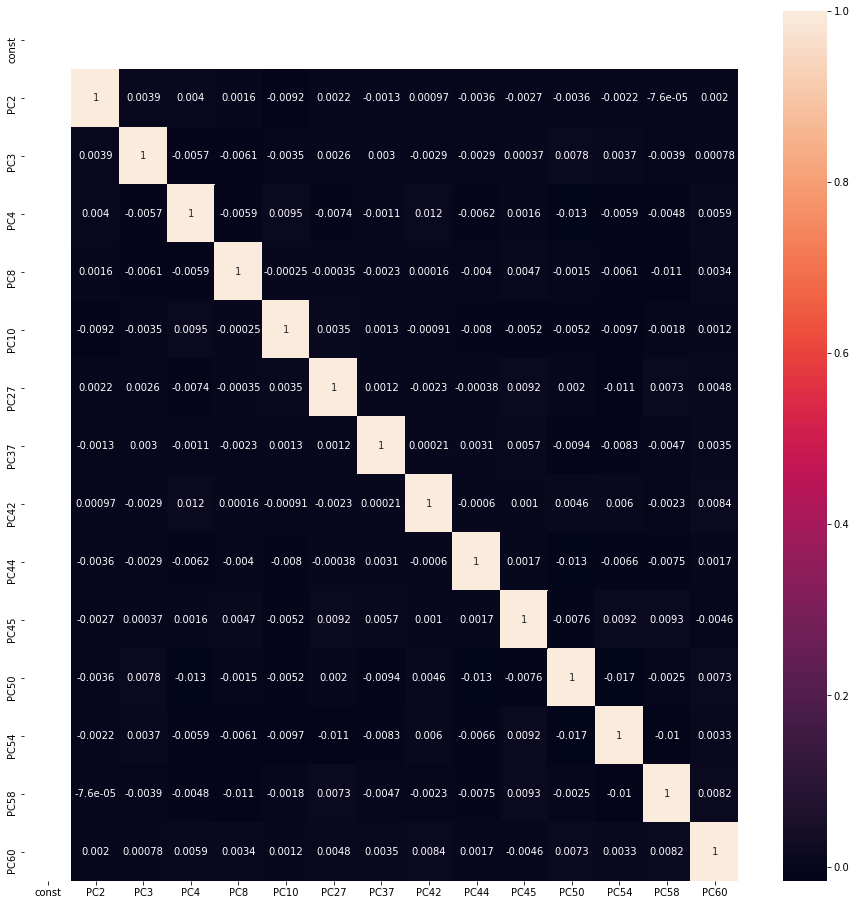

In [83]:
plt.figure(figsize=(16, 16))
sns.heatmap(X_train_final.corr(), annot=True)

In [84]:
y_train_predicted_final = pd.DataFrame({'converted':y_train.values, 'converted_probability':lm_final.predict(X_train_final)})
y_train_predicted_final.head()

converted  converted_probability
28122          0               0.020112
22066          0               0.021746
10150          0               0.033001
26262          0               0.655053
5320           0               0.108639

#### C. ROC Curve

In [85]:
fpr, tpr, thresholds = roc_curve(y_train_predicted_final.converted, y_train_predicted_final.converted_probability, drop_intermediate=False )

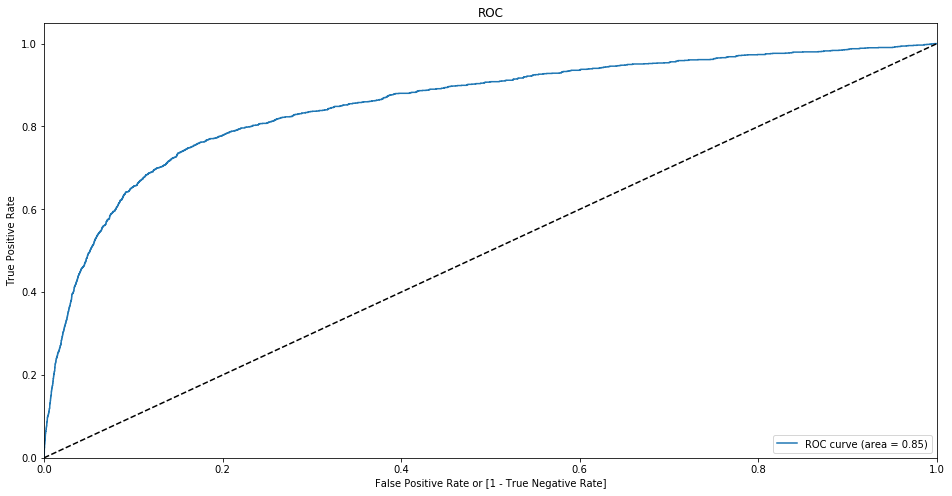

In [86]:
plt.figure(figsize=(16, 8))
draw_roc(y_train_predicted_final.converted, y_train_predicted_final.converted_probability)

In [87]:
numbers = [round(x * 0.05, 2) for x in range(0, 20)]

y_train_predicted_final = y_train_predicted_final

for i in numbers:
    y_train_predicted_final[i]= y_train_predicted_final.converted_probability.map(lambda x: 1 if x > i else 0)

y_train_predicted_final.head()

converted  converted_probability  0.0  0.05  0.1  0.15  0.2  0.25  0.3  \
28122          0               0.020112    1     0    0     0    0     0    0   
22066          0               0.021746    1     0    0     0    0     0    0   
10150          0               0.033001    1     0    0     0    0     0    0   
26262          0               0.655053    1     1    1     1    1     1    1   
5320           0               0.108639    1     1    1     0    0     0    0   

       0.35  ...   0.5  0.55  0.6  0.65  0.7  0.75  0.8  0.85  0.9  0.95  
28122     0  ...     0     0    0     0    0     0    0     0    0     0  
22066     0  ...     0     0    0     0    0     0    0     0    0     0  
10150     0  ...     0     0    0     0    0     0    0     0    0     0  
26262     1  ...     1     1    1     1    0     0    0     0    0     0  
5320      0  ...     0     0    0     0    0     0    0     0    0     0  

[5 rows x 22 columns]

In [88]:
cutoff_df = pd.DataFrame(columns=['Accuracy', 'Sensitivity','Specificity'])

for i in numbers:
    confusion = confusion_matrix(y_train_predicted_final.converted, y_train_predicted_final[i] )
    total=sum(sum(confusion))
    accuracy = (confusion[0,0]+confusion[1,1])/total
    
    specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
    cutoff_df.loc[i] =[accuracy, sensitivity, specificity]
    
cutoff_df.head()

Accuracy  Sensitivity  Specificity
0.00  0.081381     1.000000     0.000000
0.05  0.683667     0.848449     0.669068
0.10  0.832429     0.745465     0.840133
0.15  0.885524     0.641896     0.907107
0.20  0.904143     0.553540     0.935203

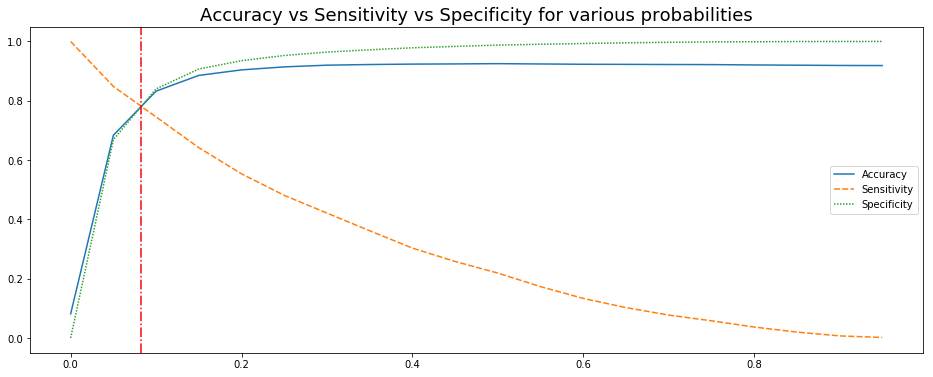

In [89]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=cutoff_df)
plt.title('Accuracy vs Sensitivity vs Specificity for various probabilities', fontsize=18)
plt.axvline(0.0825, color='r', linestyle='-.')

Optimum values is `0.0825`

#### D.Precision and Recall TradeOff

In [90]:
p, r, thresholds = precision_recall_curve(y_train_predicted_final.converted, y_train_predicted_final.converted_probability)

cutoff_df = pd.DataFrame({'Precision': pd.Series(p[:-1], index=thresholds),
              'Recall':pd.Series(r[:-1], index=thresholds)})
cutoff_df.head()

Precision    Recall
0.000611   0.081599  1.000000
0.000617   0.081555  0.999415
0.000647   0.081559  0.999415
0.000653   0.081562  0.999415
0.000662   0.081566  0.999415

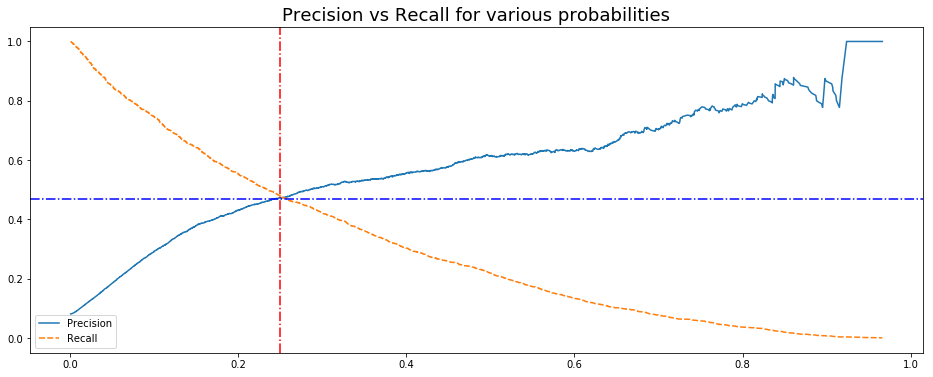

In [91]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=cutoff_df)
plt.title('Precision vs Recall for various probabilities', fontsize=18)
plt.axhline(0.47, color='b', linestyle='-.')
plt.axvline(0.25, color='r', linestyle='-.')

The optimum value from Precision and Recall is `0.25`

In [92]:
cutoff_probability1 = 0.0825
cutoff_probability2 = 0.25

In [93]:
predicted_1 = y_train_predicted_final.converted_probability.map( lambda x: 1 if x > cutoff_probability1 else 0)

predicted_2 = y_train_predicted_final.converted_probability.map( lambda x: 1 if x > cutoff_probability2 else 0)

In [94]:
metrics_dataframe(y_train_predicted_final.converted, predicted_1)

Metric     Score
0                Specificity  0.800425
1                   Accuracy  0.798619
2                  Precision  0.256757
3         Sensitivity/Recall  0.778233
4        False Positive Rate  0.199575
5  Positive Predictive Value  0.256757
6  Negative Predictive Value  0.976043

In [95]:
metrics_dataframe(y_train_predicted_final.converted, predicted_2)

Metric     Score
0                Specificity  0.952620
1                   Accuracy  0.914238
2                  Precision  0.473502
3         Sensitivity/Recall  0.480983
4        False Positive Rate  0.047380
5  Positive Predictive Value  0.473502
6  Negative Predictive Value  0.953956

#### E. Building Final Logistic Regression

In [96]:
lm = LogisticRegression(class_weight={0:0.1, 1: 0.9})
lm.fit(X_train, y_train)

y_predicted = lm.predict(X_test)

print(metrics.classification_report(y_test, y_predicted))
metrics_dataframe(y_test, y_predicted)

C:\Personel\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8269
           1       0.31      0.82      0.45       732

    accuracy                           0.84      9001
   macro avg       0.65      0.83      0.68      9001
weighted avg       0.93      0.84      0.87      9001



Metric     Score
0                Specificity  0.840005
1                   Accuracy  0.838573
2                  Precision  0.312727
3         Sensitivity/Recall  0.822404
4        False Positive Rate  0.159995
5  Positive Predictive Value  0.312727
6  Negative Predictive Value  0.981628

`Sensitivity/Recall` of `Logistic Regression` is `82%`

###  Model 2 :-  `Random Forest`

##### A. Create Random Forest

In [113]:
#Create Random Forest
rfc = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)
rfc.fit(X_train, y_train)
#make predictions
y_predicted = rfc.predict(X_test)

C:\Personel\Python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [114]:
print(classification_report(y_test, y_predicted))
metrics_dataframe(y_test, y_predicted)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8269
           1       0.61      0.17      0.26       732

    accuracy                           0.92      9001
   macro avg       0.77      0.58      0.61      9001
weighted avg       0.90      0.92      0.90      9001



Metric     Score
0                Specificity  0.990688
1                   Accuracy  0.923675
2                  Precision  0.613065
3         Sensitivity/Recall  0.166667
4        False Positive Rate  0.009312
5  Positive Predictive Value  0.613065
6  Negative Predictive Value  0.930698

#### B. Hyper Parameter Tuning

In [115]:
param_grid = {
    'max_depth': [2, 4, 8],
    'min_samples_leaf': range(10, 50, 10),
    'min_samples_split': range(10, 50, 10),
    'max_features': range(10, 50, 10),
    'n_estimators': [10, 30, 50]
}

rfc = GridSearchCV(estimator=RandomForestClassifier(class_weight={0:0.1, 1: 0.9}),
                        param_grid=param_grid,
                        scoring='recall',
                        cv=KFold(n_splits=3, shuffle=True, random_state=42),
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True) 
rfc.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 32.3min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction...
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              

In [117]:
print(rfc.best_params_)
print(rfc.best_score_)

{'max_depth': 4, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 30}
0.7090782092260904


In [118]:
rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=4, max_features=40,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

##### C. Building Final Random Forest

In [119]:
rfc_final = RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=4, max_features=40,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=40,
                       min_samples_split=40, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

rfc_final.fit(X_train, y_train)
y_predicted = rfc_final.predict(X_test)

In [120]:
print(classification_report(y_test, y_predicted))
metrics_dataframe(y_test, y_predicted)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8269
           1       0.33      0.70      0.45       732

    accuracy                           0.86      9001
   macro avg       0.65      0.79      0.68      9001
weighted avg       0.92      0.86      0.88      9001



Metric     Score
0                Specificity  0.872657
1                   Accuracy  0.858571
2                  Precision  0.327157
3         Sensitivity/Recall  0.699454
4        False Positive Rate  0.127343
5  Positive Predictive Value  0.327157
6  Negative Predictive Value  0.970414

`Sensitivity/Recall` of `Random Forest` is `70%`

###  Model 3 :-  `Decision Tree`

In [97]:
param_grid = {
    'max_depth': [2, 4, 8, 16],
    'min_samples_leaf': range(10, 50, 10),
    'min_samples_split': range(10, 50, 10),
    'max_features': range(10, 50, 10)
}

dt = GridSearchCV(estimator=DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9}),
                        param_grid=param_grid,
                        scoring='recall',
                        cv=KFold(n_splits=5, shuffle=True, random_state=42),
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True) 

dt.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16],
             

In [98]:
print(dt.best_score_)
print(dt.best_params_)

0.7632796007134197
{'max_depth': 2, 'max_features': 20, 'min_samples_leaf': 10, 'min_samples_split': 20}


In [99]:
decision_model = DecisionTreeClassifier(class_weight='balanced', max_depth=dt.best_params_['max_depth'],
                                       min_samples_leaf=dt.best_params_['min_samples_leaf'],
                                       min_samples_split=dt.best_params_['min_samples_split'],
                                       max_features=dt.best_params_['max_features'])

decision_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
features_importance_df = pd.DataFrame(list(zip(list(X_train.columns)[:-1], decision_model.feature_importances_)),
             columns=['feature', 'importance']).sort_values(by='importance', ascending=False)

features_importance_df.head()

feature  importance
1      PC2    0.478137
2      PC3    0.425244
3      PC4    0.096618
0      PC1    0.000000
44    PC45    0.000000

###  Model 4 :-  `SVM`

#### A. Selection of  SVC Model

##### Building Linear SVC Model

In [101]:
linear_svc = SVC(kernel='linear',  class_weight={0:0.1, 1: 0.9})
linear_svc.fit(X_train, y_train)

y_predicted = linear_svc.predict(X_test)

In [102]:
print(classification_report(y_test, y_predicted))
metrics_dataframe(y_test, y_predicted)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8269
           1       0.32      0.81      0.46       732

    accuracy                           0.85      9001
   macro avg       0.65      0.83      0.69      9001
weighted avg       0.93      0.85      0.87      9001



Metric     Score
0                Specificity  0.848107
1                   Accuracy  0.845351
2                  Precision  0.321814
3         Sensitivity/Recall  0.814208
4        False Positive Rate  0.151893
5  Positive Predictive Value  0.321814
6  Negative Predictive Value  0.980976

####  Building RBF SVC Model

In [103]:
rbf_svc = SVC(kernel='rbf', class_weight={0:0.1, 1: 0.9})
rbf_svc.fit(X_train, y_train)

y_predicted = rbf_svc.predict(X_test)

C:\Personel\Python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [105]:
print(classification_report(y_test, y_predicted))
metrics_dataframe(y_test, y_predicted)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8269
           1       0.40      0.71      0.51       732

    accuracy                           0.89      9001
   macro avg       0.69      0.81      0.73      9001
weighted avg       0.93      0.89      0.90      9001



Metric     Score
0                Specificity  0.907486
1                   Accuracy  0.891123
2                  Precision  0.403276
3         Sensitivity/Recall  0.706284
4        False Positive Rate  0.092514
5  Positive Predictive Value  0.403276
6  Negative Predictive Value  0.972147

MODEL SELECTION:-

The Bussiness goal is to identify churners than the non-churners accurately. Hence the best matrix for comapring two model is `Specificity`.    
As the `Specificity` of `RBF` model is lower than `Linear` Model, we can proceed further with `Linear` model

#### B. Selection of Hyper Parameter Tuning 

In [106]:
hyper_parameters = {'C': [0.1, 1, 10, 100]}      

model_cv = GridSearchCV(estimator=SVC(kernel='linear', class_weight='balanced'),
                        param_grid=hyper_parameters,
                        scoring='recall',
                        cv=KFold(n_splits=3, shuffle=True, random_state=42),
                        n_jobs=4,
                        verbose=1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 53.2min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=4, param_grid={'C': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [107]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'C': 1}
0.8079462767336495


In [108]:
model = SVC(C=model_cv.best_params_['C'], kernel='linear', class_weight={0:0.1, 1: 0.9})
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [109]:
print(classification_report(y_test, y_predicted))
metrics_dataframe(y_test, y_predicted)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8269
           1       0.32      0.81      0.46       732

    accuracy                           0.85      9001
   macro avg       0.65      0.83      0.69      9001
weighted avg       0.93      0.85      0.87      9001



Metric     Score
0                Specificity  0.848107
1                   Accuracy  0.845351
2                  Precision  0.321814
3         Sensitivity/Recall  0.814208
4        False Positive Rate  0.151893
5  Positive Predictive Value  0.321814
6  Negative Predictive Value  0.980976

#### Choosing the model

The model with highest `Sensitivity(Recall)` is Logistic Regression

## Step 9:- Building Model To Identify Important Predictors
Building a model to identifying important predictor attributes which help the business understand indicators of churn

The only classification model that can help us to predict attributes which help the business understand indicators of churn is Logistic Regression
So lets make Logistic Regression

In [134]:
param_grid = {
    'max_depth': [2, 4, 8, 16],
    'min_samples_leaf': range(10, 50, 10),
    'min_samples_split': range(10, 50, 10),
    'max_features': range(10, 50, 10)
}

dt = GridSearchCV(estimator=DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9}),
                        param_grid=param_grid,
                        scoring='recall',
                        cv=KFold(n_splits=5, shuffle=True, random_state=42),
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True) 

dt.fit(telecom.drop('churn', axis=1), telecom['churn'])

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:  3.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16],
             

In [142]:
print(dt.best_score_)
print(dt.best_params_)

0.8087273535034373
{'max_depth': 4, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 40}


In [143]:
decision_model = DecisionTreeClassifier(class_weight='balanced', max_depth=dt.best_params_['max_depth'],
                                       min_samples_leaf=dt.best_params_['min_samples_leaf'],
                                       min_samples_split=dt.best_params_['min_samples_split'],
                                       max_features=dt.best_params_['max_features'])

decision_model.fit(telecom.drop('churn', axis=1), telecom['churn'])

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
                       max_features=40, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

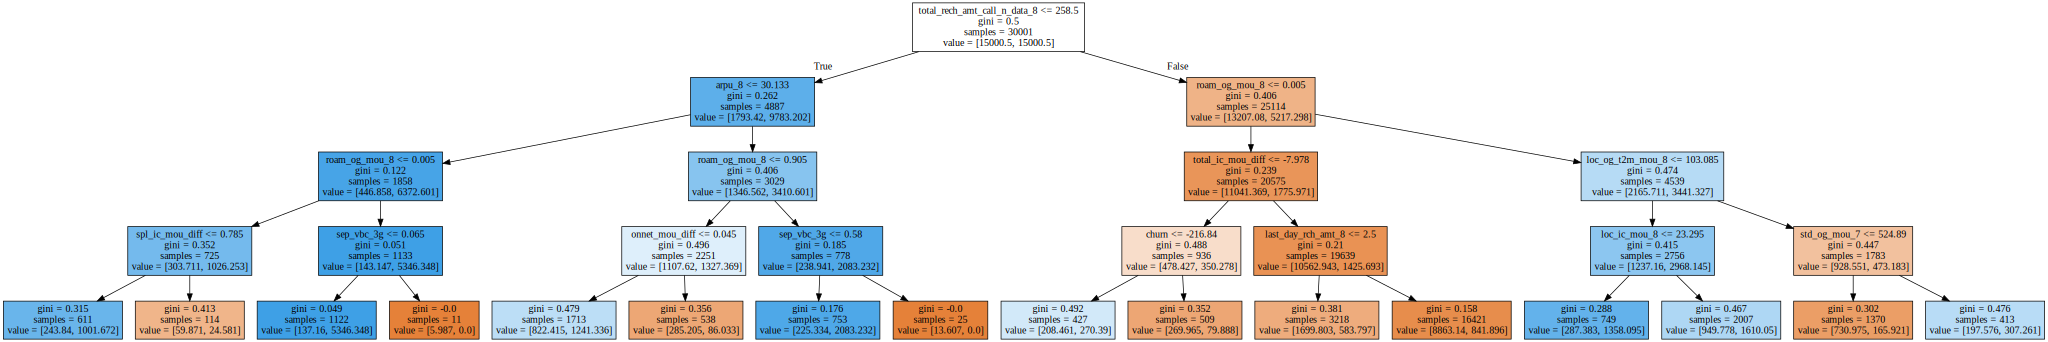

In [144]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
graph = Source(tree.export_graphviz(decision_model, out_file=None, feature_names=list(telecom.columns)[:-1], filled = True))
display(SVG(graph.pipe(format='svg')))

In [145]:
features_importance_df = pd.DataFrame(list(zip(list(telecom.columns)[:-1], decision_model.feature_importances_)),
             columns=['feature', 'importance']).sort_values(by='importance', ascending=False)



In [146]:
#The important predictors are as below
features_importance_df.head()

feature  importance
143  total_rech_amt_call_n_data_8    0.573220
18                  roam_og_mou_8    0.273710
24               loc_og_t2m_mou_8    0.036403
6                          arpu_8    0.033862
160             total_ic_mou_diff    0.018264

## Step 10:-  Recomendations
Recommendations of strategies to manage customer churn 

From the decision tree we can observe that the total_rech_amt_call_n_data and roam_og_mou are the top most features that are resulting in churn.

Below recommendations can be taken to reduce the churn rate.

1. As the roaming charges and the total call charges increases, there is a high probability of customers churning out. So for this, the companies can introduce some exciting offers/packages.
2. Companies also need to keep track of average revenue per user and if the revenue decreases, then they need to proactivily take feedback from the customers and work on according to customer requirements.
3. For the users who frequently use roaming, provide them with the packages with good discounts.
4. So to address all the issues in timely manner, things such as collecting the feedbacks from the customers and acting on their concerns need to be done.
 